In [17]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../..')  # Add root directory to path to find src

In [18]:
from scripts.EDA_src.constructs import identify_column_types, create_construct_groups, create_aggregate_features, analyze_construct
from scripts.EDA_src.univariate import univariate_numeric, univariate_categorical, univariate_binary
from scripts.EDA_src.bivariate import bivariate_numeric_numeric, bivariate_categorical_numeric, bivariate_categorical_categorical
from scripts.EDA_src.platform_analysis import analyze_purchase_behavior, analyze_platform_usage, correlation_analysis, multivariate_analysis
from scripts.EDA_src.multivariate import pca_analysis, cluster_analysis

### **Load Data**

In [19]:
def load_data(file_path):
    """
    Load the dataset from a file path
    """
    df = pd.read_csv(file_path)
    print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns")
    return df

# Load data
df = load_data('../../data/cleaned/cleaned_survey_data.csv')

Data loaded with 825 rows and 137 columns


In [20]:
focus_columns=[
    'opi_satisfaction', 
    'opi_behavior_change', 
    'opi_purchased?', 
    'peou_navigation_1', 
    'pu_product_1'
]

### **Identify column types and create construct groups**

In [21]:
col_types = identify_column_types(df)
constructs = create_construct_groups(df)

### **Basic dataset exploration**

In [22]:
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values summary:")
missing = df.isna().sum()
print(missing[missing > 0])

Dataset shape: (825, 137)

Missing values summary:
Series([], dtype: int64)


The dataset contains 825 survey respondents with 135 variables, providing a comprehensive view of factors potentially affecting online purchase intention. Importantly, there are no missing values in the dataset, which ensures high data quality and eliminates the need for imputation techniques. This complete dataset allows for reliable analysis of relationships between user characteristics and their online purchasing behavior.

### **Analyze by constructs**

Analyzing PEOU construct with 10 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
peou_navigation_1    825.0  3.528485  0.851598  1.0  3.0  3.0  4.0  5.0   
peou_navigation_2    825.0  3.429091  0.786801  1.0  3.0  3.0  4.0  5.0   
peou_learning_1      825.0  3.446061  0.818365  1.0  3.0  3.0  4.0  5.0   
peou_learning_2      825.0  3.440000  0.814969  1.0  3.0  3.0  4.0  5.0   
peou_instructions_1  825.0  3.275152  0.690206  1.0  3.0  3.0  4.0  5.0   
peou_instructions_2  825.0  3.374545  0.744939  1.0  3.0  3.0  4.0  5.0   
peou_response_1      825.0  3.215758  0.781767  1.0  3.0  3.0  4.0  5.0   
peou_response_2      825.0  2.898182  0.711766  1.0  3.0  3.0  3.0  5.0   
peou_error_1         825.0  3.026667  0.787812  1.0  3.0  3.0  3.0  5.0   
peou_error_2         825.0  2.953939  0.823096  1.0  2.0  3.0  3.0  5.0   

                     missing  missing_pct  
peou_navigation_1          0          0.0  
peou_navigation_2     

<Figure size 1500x800 with 0 Axes>

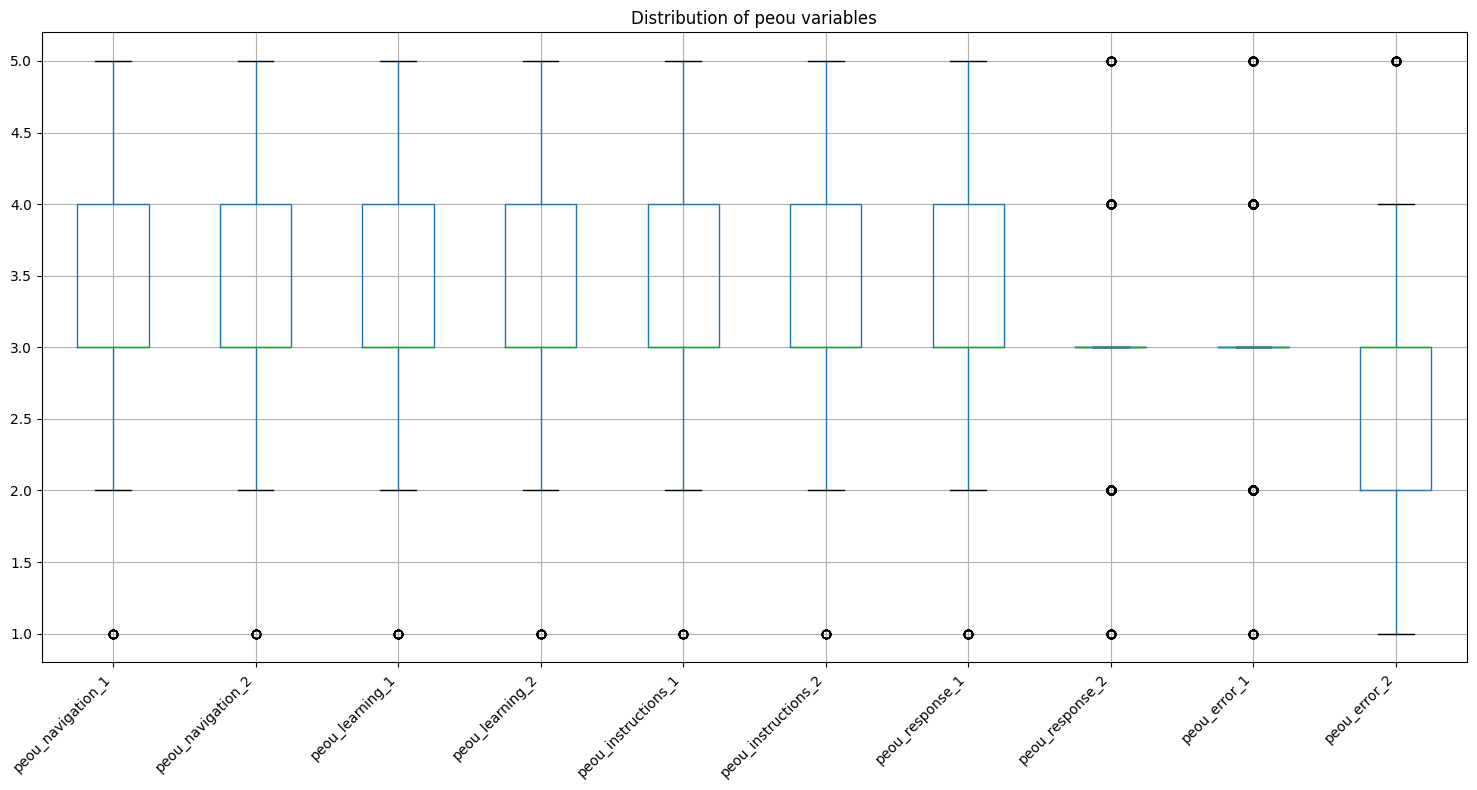

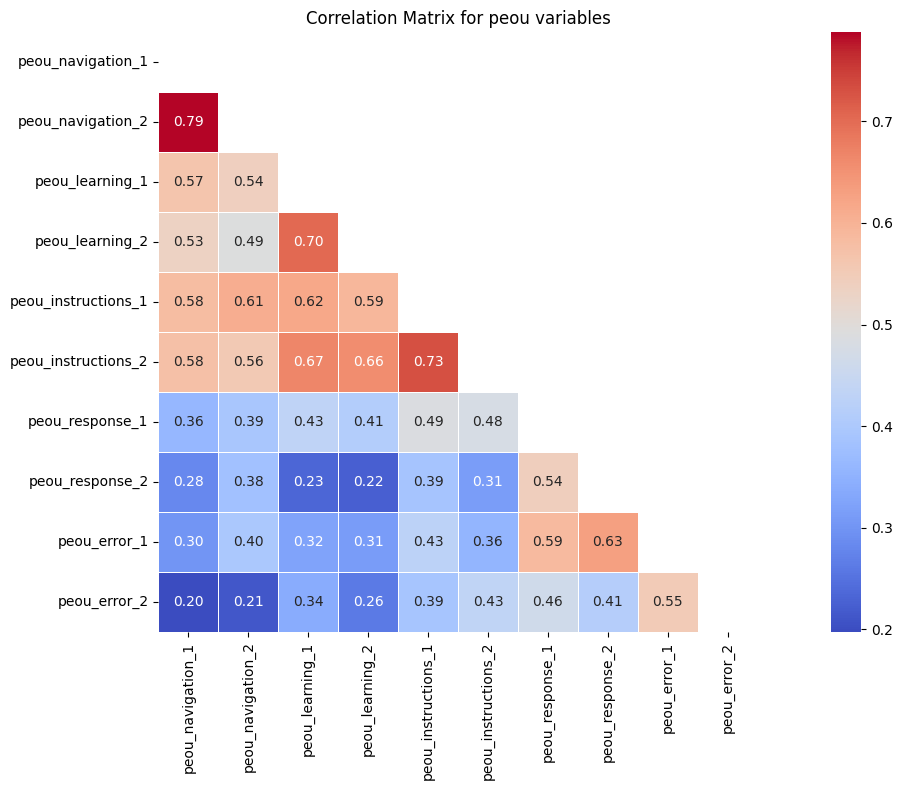

Analyzing PU construct with 10 variables

Summary Statistics:
                      count      mean       std  min  25%  50%  75%  max  \
pu_product_1          825.0  3.356364  0.811947  1.0  3.0  3.0  4.0  5.0   
pu_product_2          825.0  3.313939  0.748534  1.0  3.0  3.0  4.0  5.0   
pu_convenience_1      825.0  3.665455  0.918833  1.0  3.0  4.0  4.0  5.0   
pu_convenience_2      825.0  3.607273  0.885945  1.0  3.0  3.0  4.0  5.0   
pu_cost_1             825.0  3.115152  0.774331  1.0  3.0  3.0  3.0  5.0   
pu_cost_2             825.0  3.161212  0.818149  1.0  3.0  3.0  4.0  5.0   
pu_info_1             825.0  3.126061  0.683447  1.0  3.0  3.0  3.0  5.0   
pu_info_2             825.0  3.166061  0.814202  1.0  3.0  3.0  4.0  5.0   
pu_personalization_1  825.0  3.219394  0.701325  1.0  3.0  3.0  4.0  5.0   
pu_personalization_2  825.0  3.186667  0.709893  1.0  3.0  3.0  4.0  5.0   

                      missing  missing_pct  
pu_product_1                0          0.0  
pu_product_

<Figure size 1500x800 with 0 Axes>

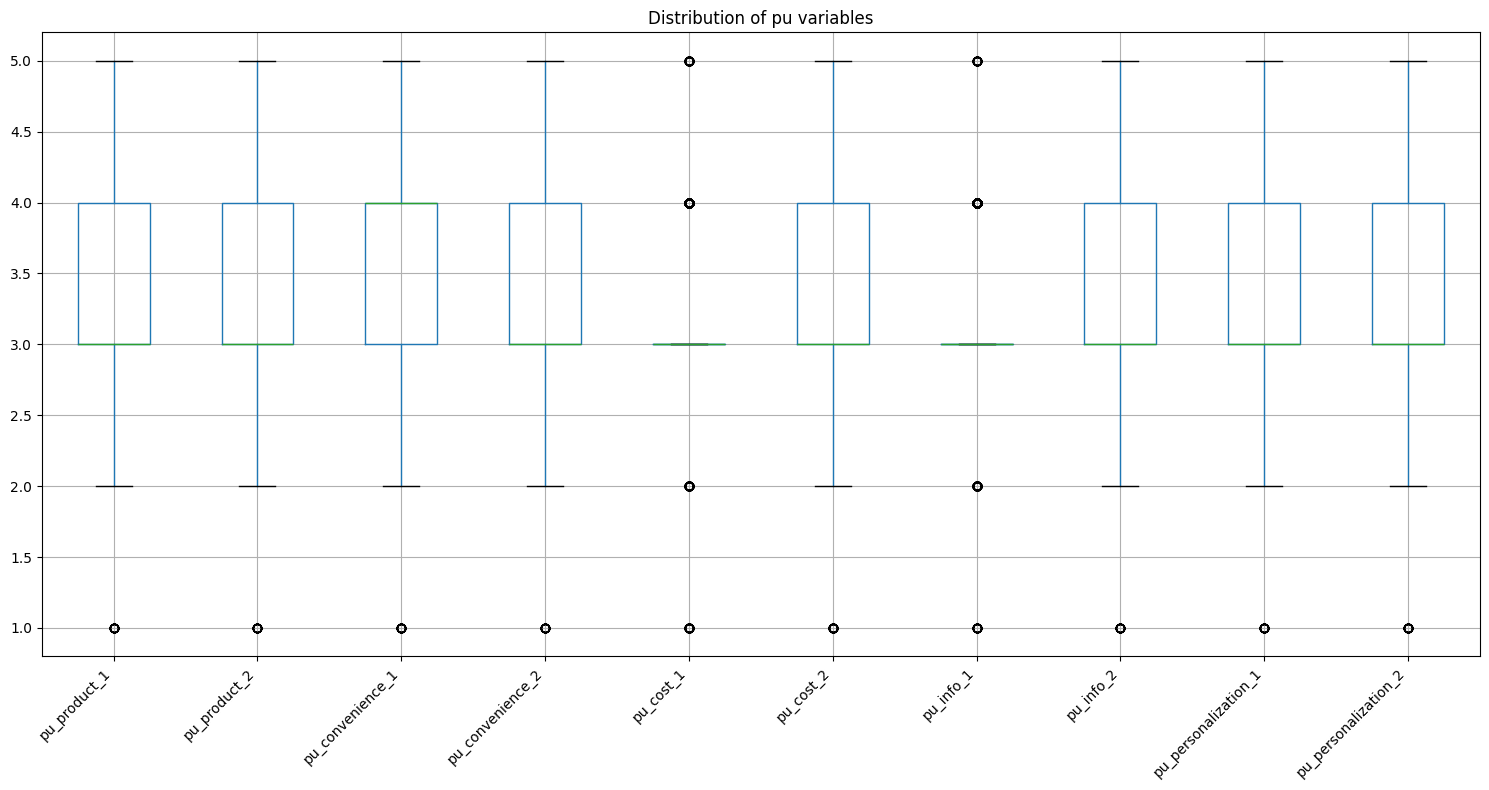

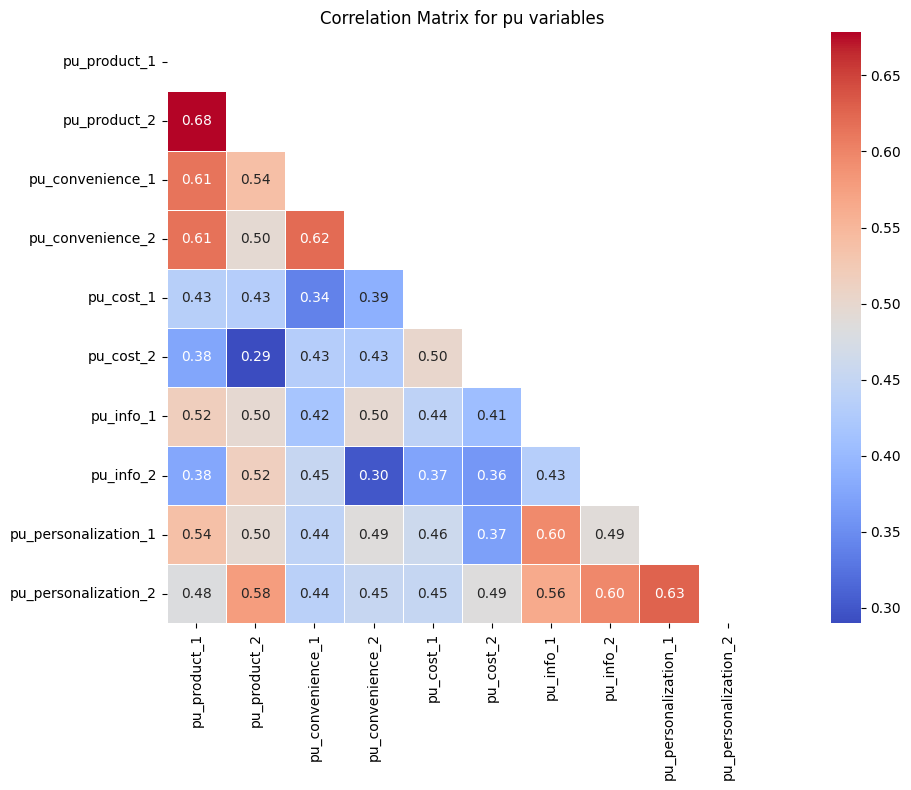

Analyzing SA construct with 6 variables

Summary Statistics:
              count      mean       std  min  25%  50%  75%  max  missing  \
sa_privacy_1  825.0  3.174545  0.674488  1.0  3.0  3.0  3.0  5.0        0   
sa_privacy_2  825.0  3.115152  0.684485  1.0  3.0  3.0  3.0  5.0        0   
sa_payment_1  825.0  3.309091  0.662979  1.0  3.0  3.0  4.0  5.0        0   
sa_payment_2  825.0  3.311515  0.724854  1.0  3.0  3.0  4.0  5.0        0   
sa_policy_1   825.0  3.152727  0.690396  1.0  3.0  3.0  3.0  5.0        0   
sa_policy_2   825.0  3.088485  0.659638  1.0  3.0  3.0  3.0  5.0        0   

              missing_pct  
sa_privacy_1          0.0  
sa_privacy_2          0.0  
sa_payment_1          0.0  
sa_payment_2          0.0  
sa_policy_1           0.0  
sa_policy_2           0.0  


<Figure size 1500x800 with 0 Axes>

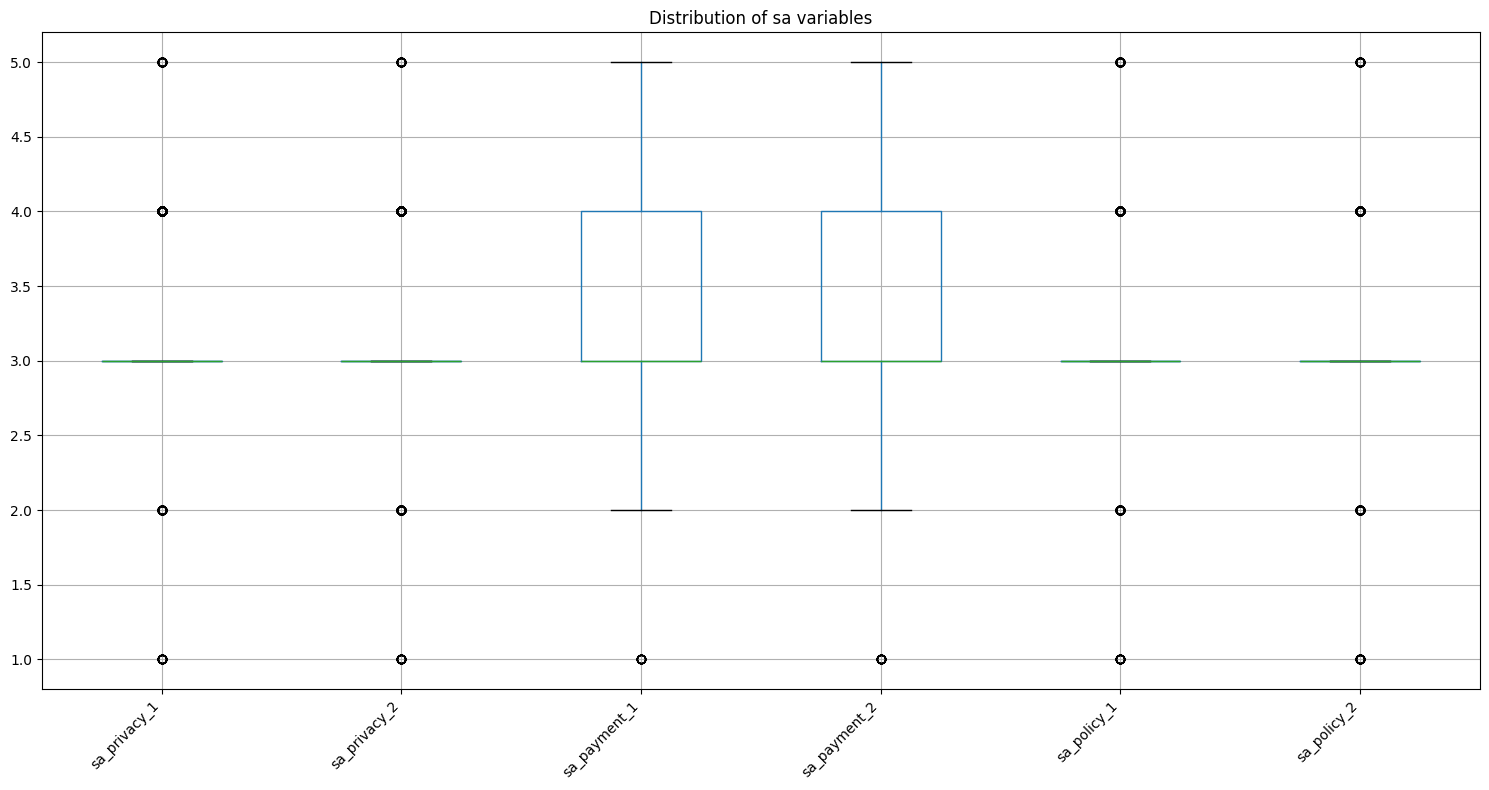

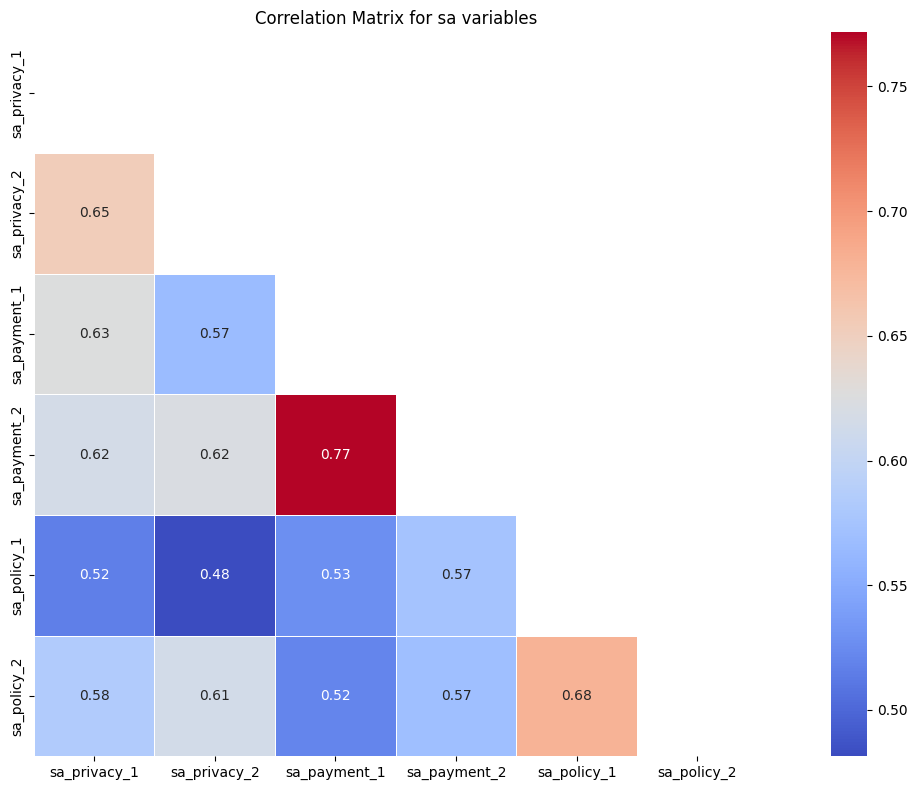

Analyzing SI construct with 12 variables

Summary Statistics:
                   count      mean       std  min  25%  50%  75%  max  \
si_wom_1           825.0  3.506667  0.895114  1.0  3.0  3.0  4.0  5.0   
si_wom_2           825.0  3.524848  0.786522  1.0  3.0  3.0  4.0  5.0   
si_social_media_1  825.0  3.486061  0.940002  1.0  3.0  3.0  4.0  5.0   
si_social_media_2  825.0  3.421818  0.842735  1.0  3.0  3.0  4.0  5.0   
si_reviews_1       825.0  3.584242  0.855022  1.0  3.0  3.0  4.0  5.0   
si_reviews_2       825.0  3.757576  0.917412  1.0  3.0  4.0  5.0  5.0   
si_social_proof_1  825.0  3.343030  0.761579  1.0  3.0  3.0  4.0  5.0   
si_social_proof_2  825.0  3.249697  0.805444  1.0  3.0  3.0  4.0  5.0   
si_normative_1     825.0  3.157576  0.685774  1.0  3.0  3.0  4.0  5.0   
si_normative_2     825.0  2.842424  0.835728  1.0  2.0  3.0  3.0  5.0   
si_sharing_1       825.0  3.293333  0.747985  1.0  3.0  3.0  4.0  5.0   
si_sharing_2       825.0  3.341818  0.725412  1.0  3.0  3.0  4

<Figure size 1500x800 with 0 Axes>

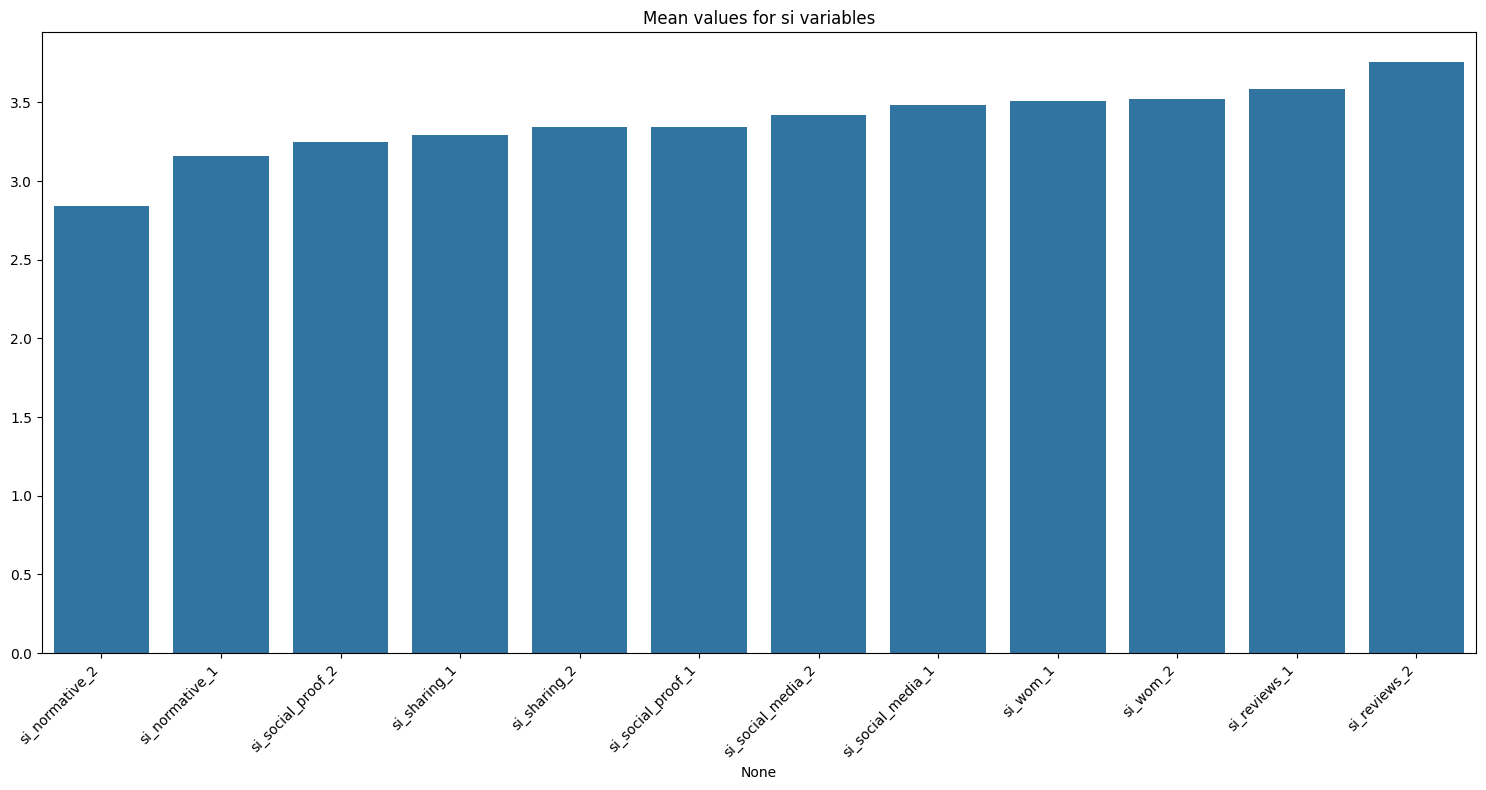

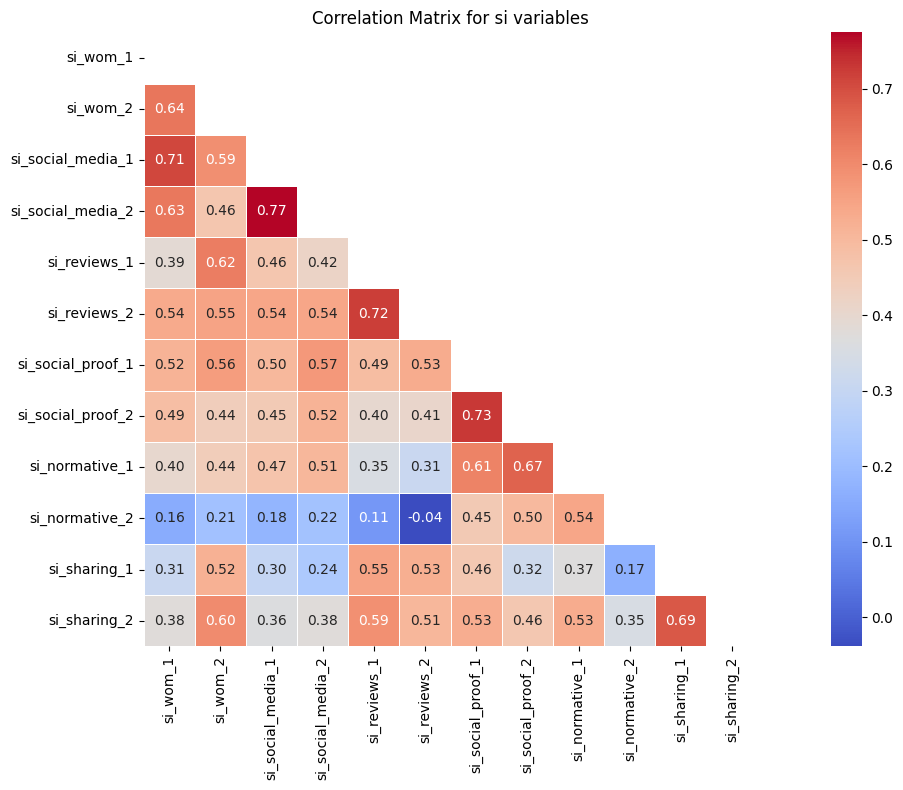

Analyzing ATT construct with 2 variables

Summary Statistics:
                count      mean       std  min  25%  50%  75%  max  missing  \
att_positive_1  825.0  3.829091  0.826519  1.0  3.0  4.0  4.0  5.0        0   
att_positive_2  825.0  3.877576  0.726271  1.0  4.0  4.0  4.0  5.0        0   

                missing_pct  
att_positive_1          0.0  
att_positive_2          0.0  


<Figure size 1500x800 with 0 Axes>

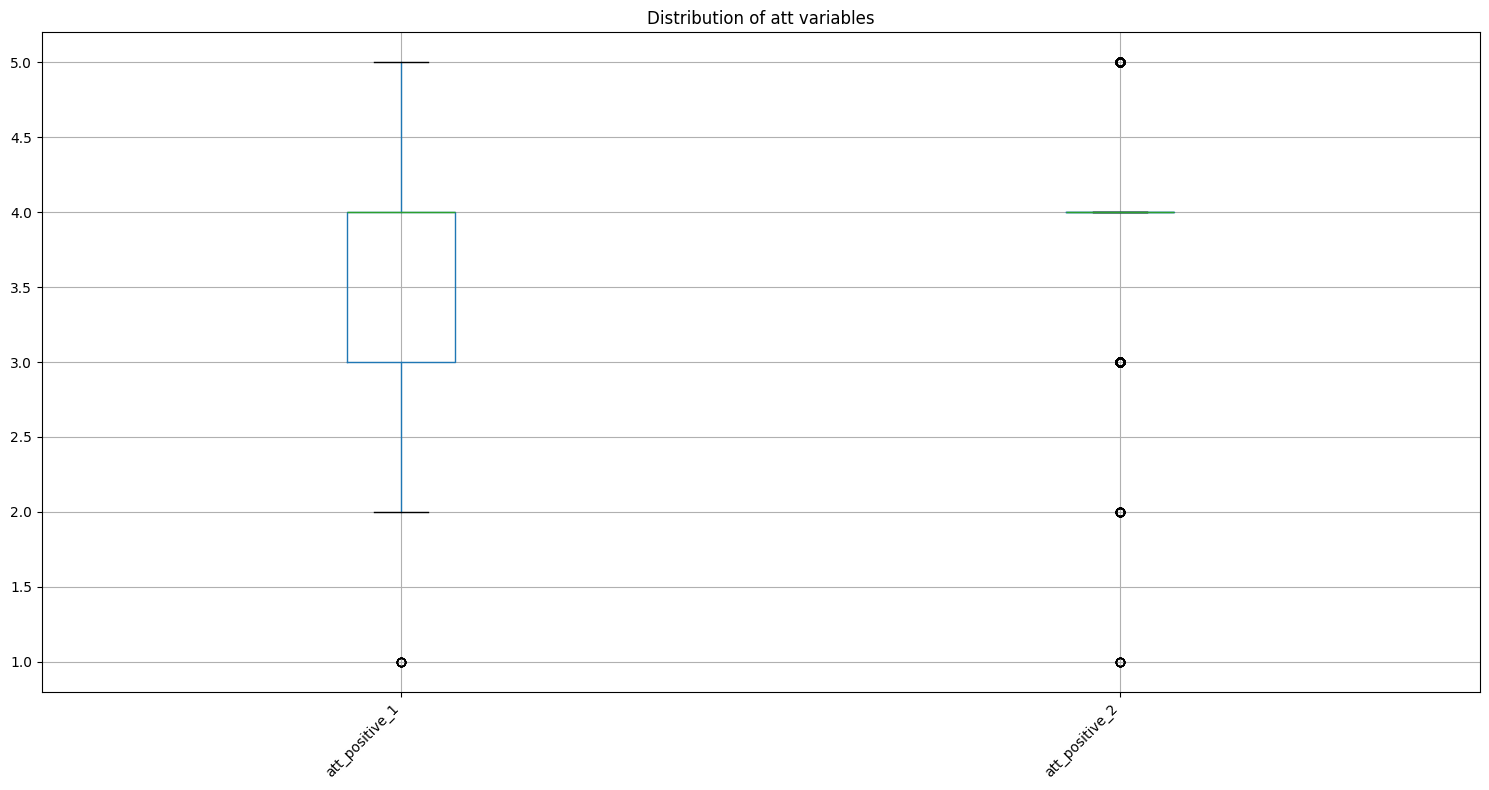

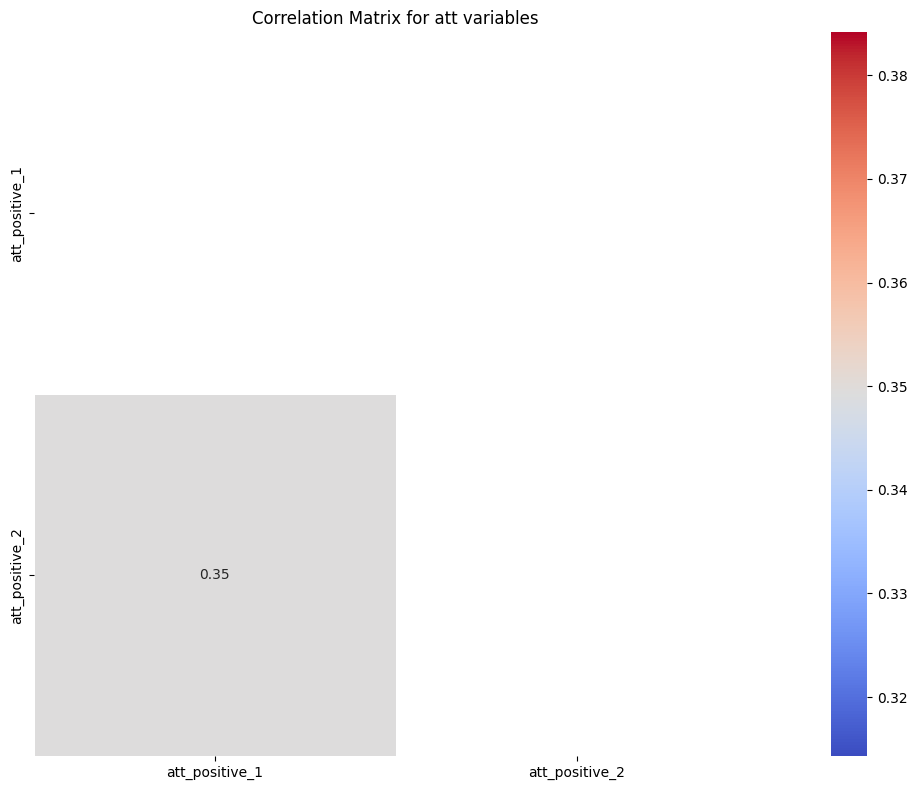

Analyzing RISK construct with 2 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
risk_security_1      825.0  3.967273  0.854824  1.0  4.0  4.0  5.0  5.0   
risk_authenticity_1  825.0  3.783030  0.811150  1.0  3.0  4.0  4.0  5.0   

                     missing  missing_pct  
risk_security_1            0          0.0  
risk_authenticity_1        0          0.0  


<Figure size 1500x800 with 0 Axes>

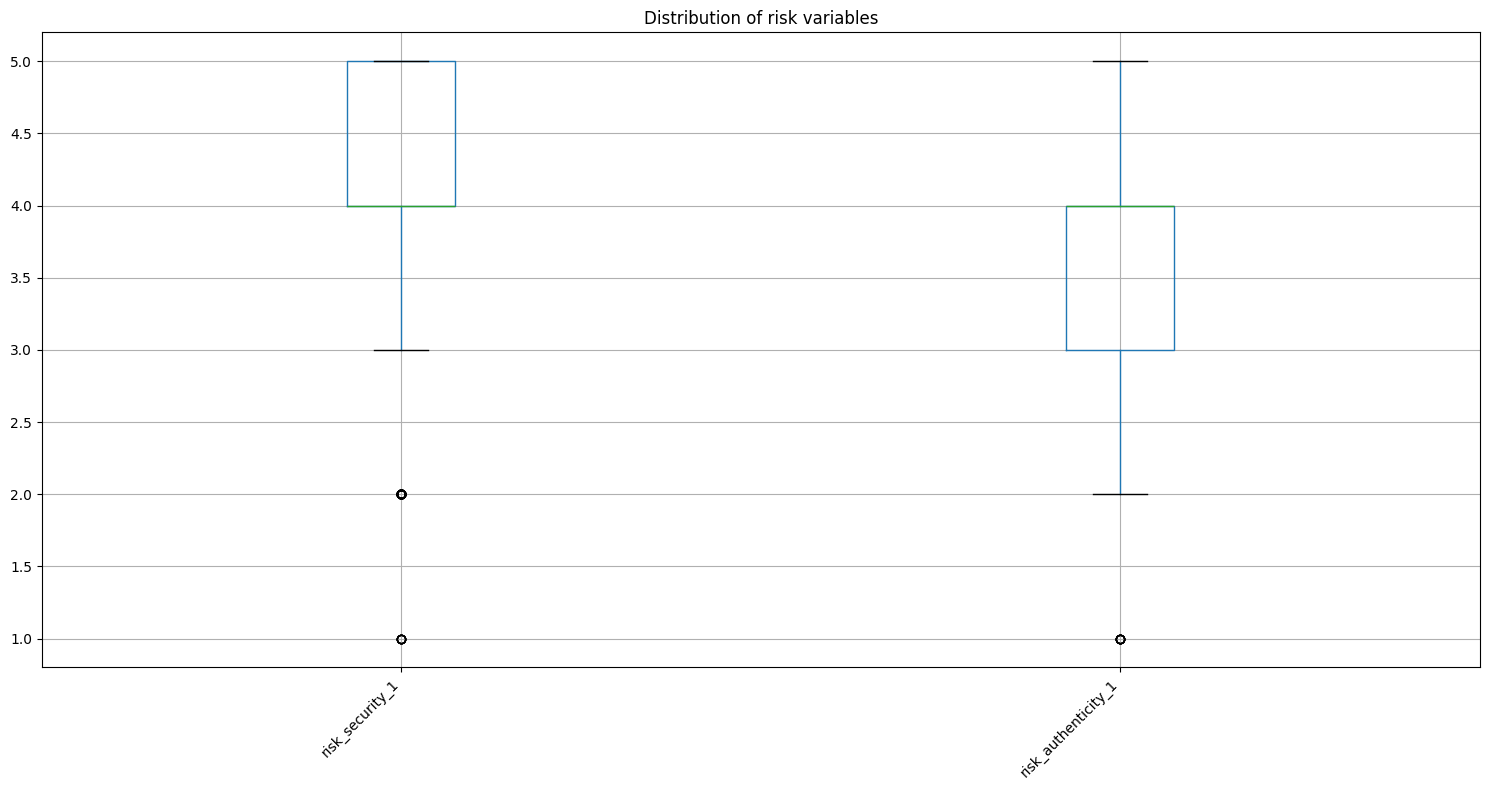

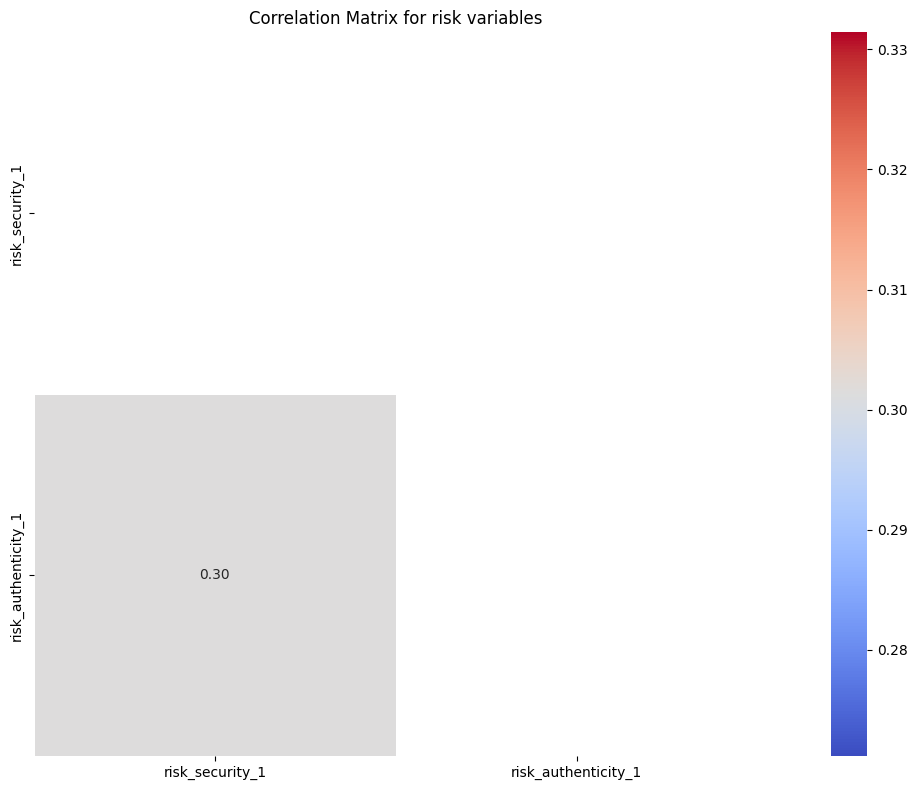

Analyzing OPI construct with 5 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
opi_satisfaction     825.0  3.743030  0.818122  1.0  3.0  4.0  4.0  5.0   
opi_behavior_change  825.0  3.904242  0.713459  1.0  4.0  4.0  4.0  5.0   
opi_convenience      825.0  3.840000  0.731470  1.0  3.0  4.0  4.0  5.0   
opi_value            825.0  3.780606  0.759479  1.0  3.0  4.0  4.0  5.0   
opi_purchased?       825.0  0.967273  0.178030  0.0  1.0  1.0  1.0  1.0   

                     missing  missing_pct  
opi_satisfaction           0          0.0  
opi_behavior_change        0          0.0  
opi_convenience            0          0.0  
opi_value                  0          0.0  
opi_purchased?             0          0.0  


<Figure size 1500x800 with 0 Axes>

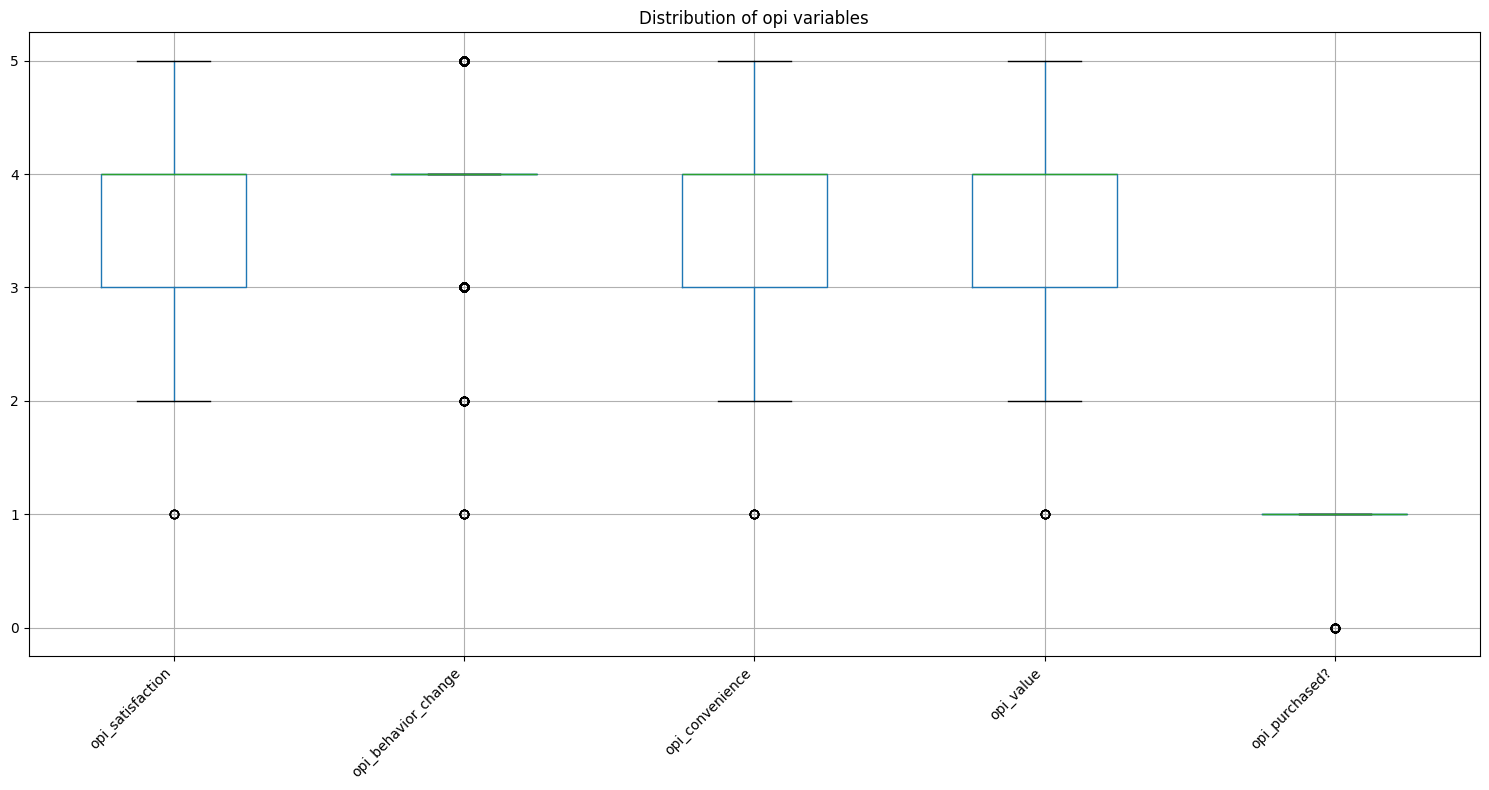

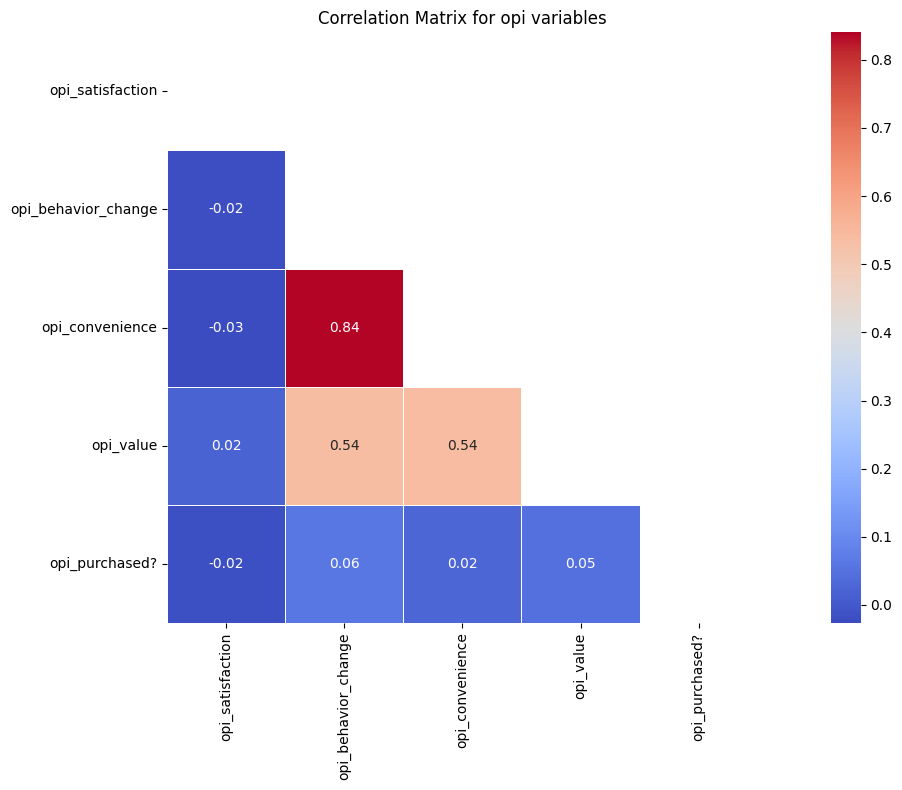

Analyzing PLATFORMS construct with 20 variables

Summary Statistics:
                             count      mean       std  min  25%  50%  75%  \
gecp_                        825.0  0.031515  0.174811  0.0  0.0  0.0  0.0   
gecp_ali_express             825.0  0.012121  0.109493  0.0  0.0  0.0  0.0   
gecp_amazon                  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_ebay                    825.0  0.008485  0.091777  0.0  0.0  0.0  0.0   
gecp_instagram_stores        825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_keels                   825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
gecp_lassanacom              825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_online_clothing_stores  825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
gecp_pickme                  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_shein                   825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_stronglk                825.0  0.002424  0.049207  0.0  0.0  0.0  0.

<Figure size 1500x800 with 0 Axes>

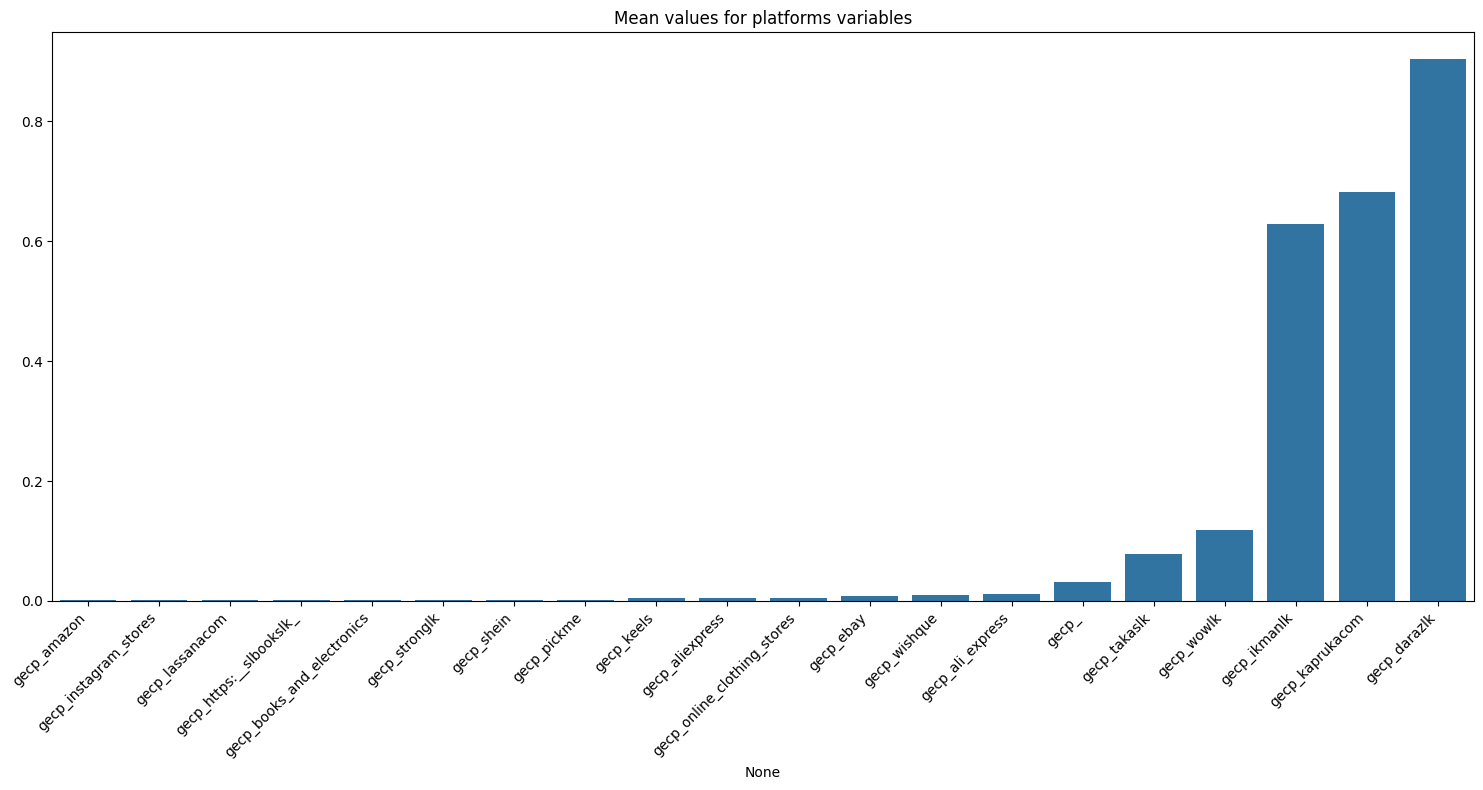

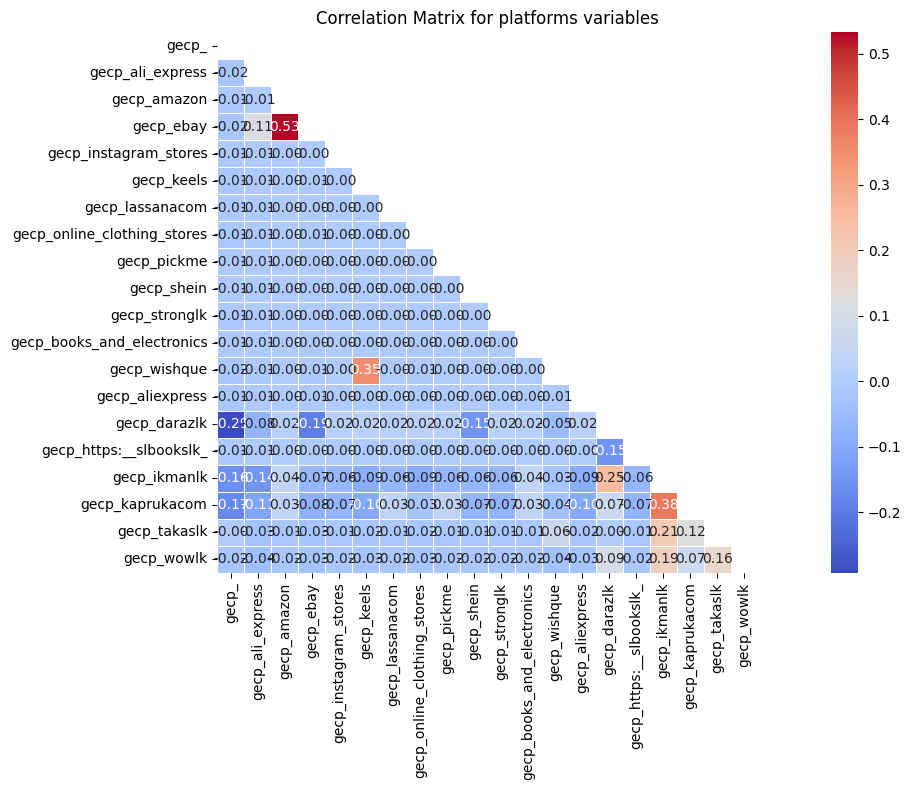

Analyzing ONLINE_PHARMACY construct with 10 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
op_                  825.0  0.333333  0.471690  0.0  0.0  0.0  1.0  1.0   
op_nearby            825.0  0.167273  0.373446  0.0  0.0  0.0  0.0  1.0   
op_pharmacy          825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
op_union_chemist     825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
op_ceymedlk          825.0  0.090909  0.287654  0.0  0.0  0.0  0.0  1.0   
op_epharmalk         825.0  0.073939  0.261831  0.0  0.0  0.0  0.0  1.0   
op_healthgurdlk      825.0  0.215758  0.411596  0.0  0.0  0.0  0.0  1.0   
op_healthnetlk       825.0  0.115152  0.319398  0.0  0.0  0.0  0.0  1.0   
op_onlinepharmacylk  825.0  0.288485  0.453333  0.0  0.0  0.0  1.0  1.0   
op_None              825.0  0.012121  0.109493  0.0  0.0  0.0  0.0  1.0   

                     missing  missing_pct  
op_                        0          0.0  
op_nearby  

<Figure size 1500x800 with 0 Axes>

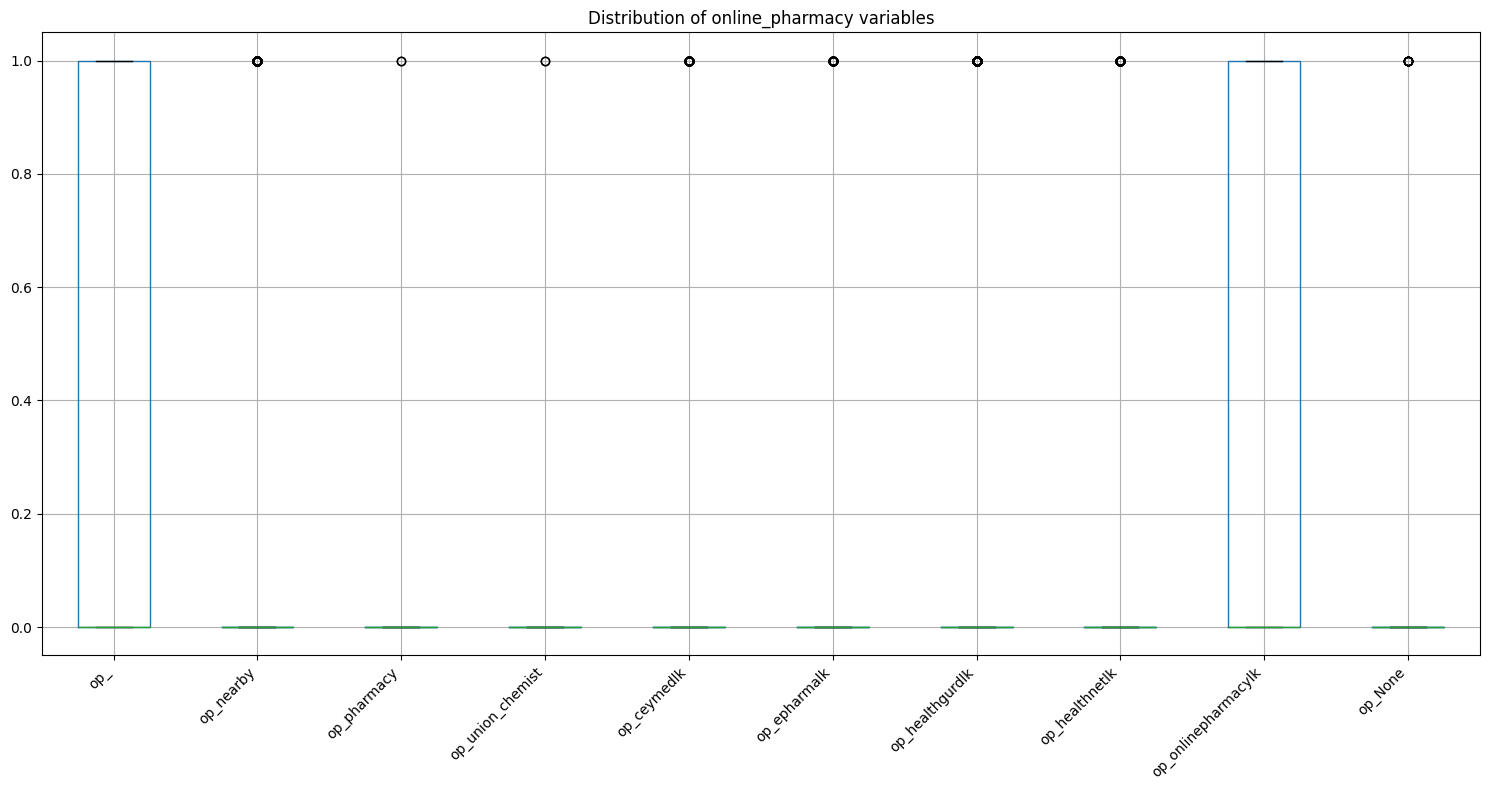

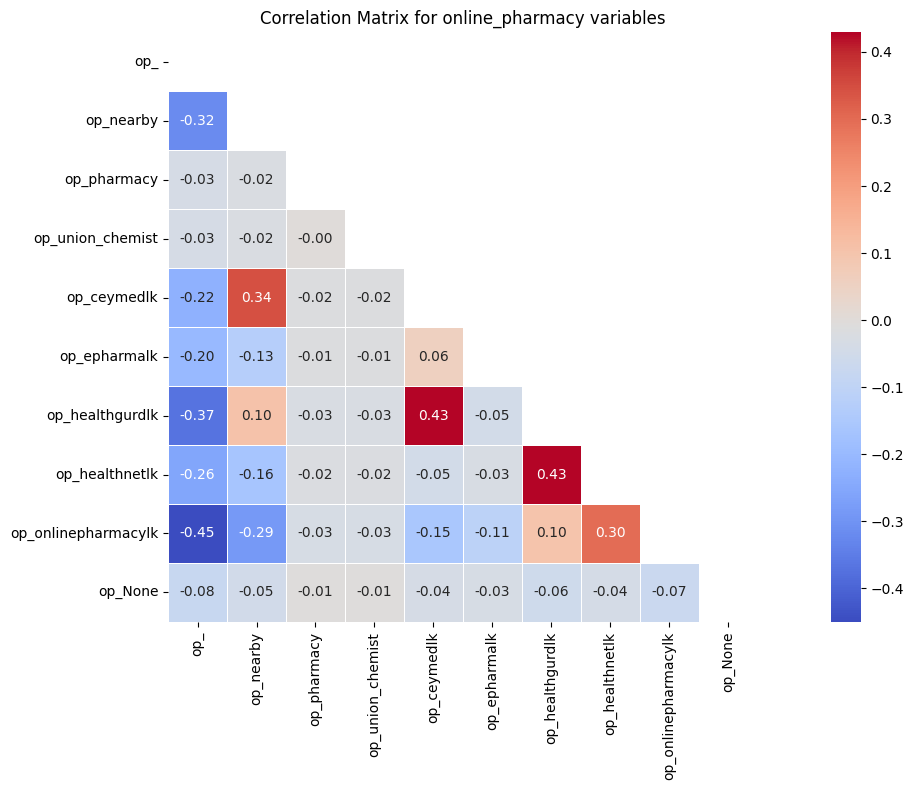

Analyzing FASHION_BRANDS construct with 26 variables

Summary Statistics:
                                count      mean       std  min  25%  50%  75%  \
fabr_                           825.0  0.256970  0.437228  0.0  0.0  0.0  1.0   
fabr_amanthe                    825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_carlo_clothing             825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_chenara_dodge              825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
fabr_didn’t_used                825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_gflock                     825.0  0.099394  0.299372  0.0  0.0  0.0  0.0   
fabr_kynd_fashion               825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_kelly_felder               825.0  0.141818  0.349075  0.0  0.0  0.0  0.0   
fabr_moods                      825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_moose                      825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_nills                      825

<Figure size 1500x800 with 0 Axes>

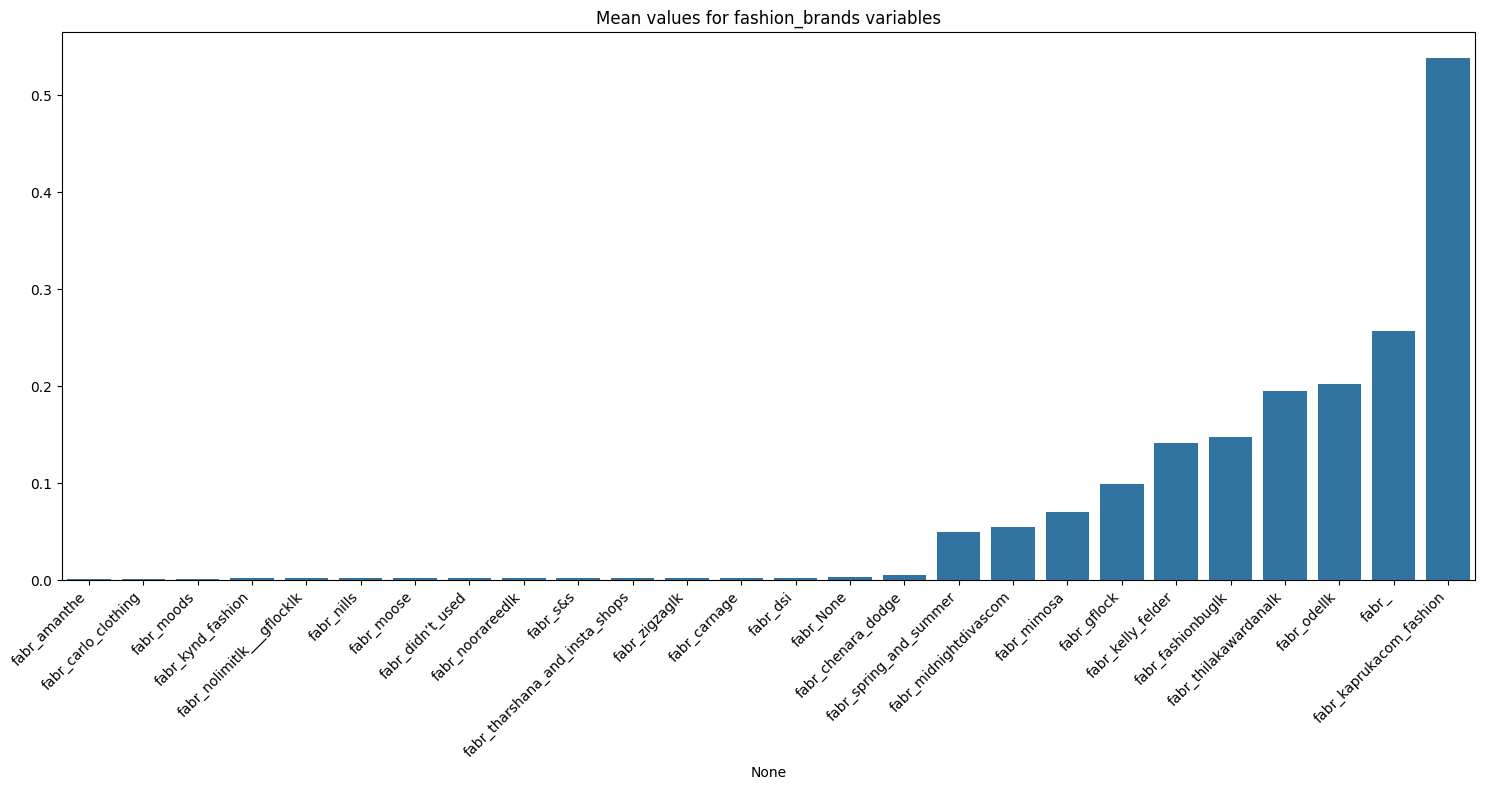

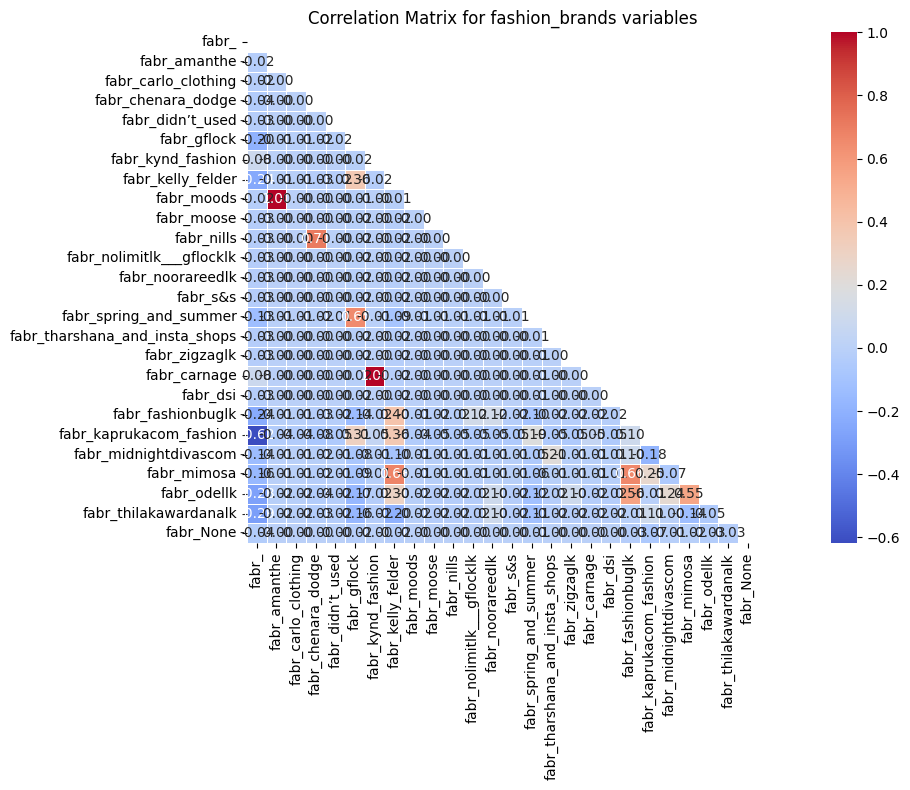

Analyzing GROCERY_DELIVERY construct with 12 variables

Summary Statistics:
                         count      mean       std  min  25%  50%  75%  max  \
gds_                     825.0  0.065455  0.247476  0.0  0.0  0.0  0.0  1.0   
gds_cargillis_food_city  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_cargillsonlinecom    825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_glomark              825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_keels                825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_arpicolk             825.0  0.181818  0.385929  0.0  0.0  0.0  0.0  1.0   
gds_cinnamonhotelcom     825.0  0.018182  0.133690  0.0  0.0  0.0  0.0  1.0   
gds_glomarklk            825.0  0.004848  0.069504  0.0  0.0  0.0  0.0  1.0   
gds_keellssuperlk        825.0  0.673939  0.469054  0.0  0.0  1.0  1.0  1.0   
gds_pickmefoodscom       825.0  0.710303  0.453897  0.0  0.0  1.0  1.0  1.0   
gds_ubereatscom          825.0  0.809697  0.392778  0.0

<Figure size 1500x800 with 0 Axes>

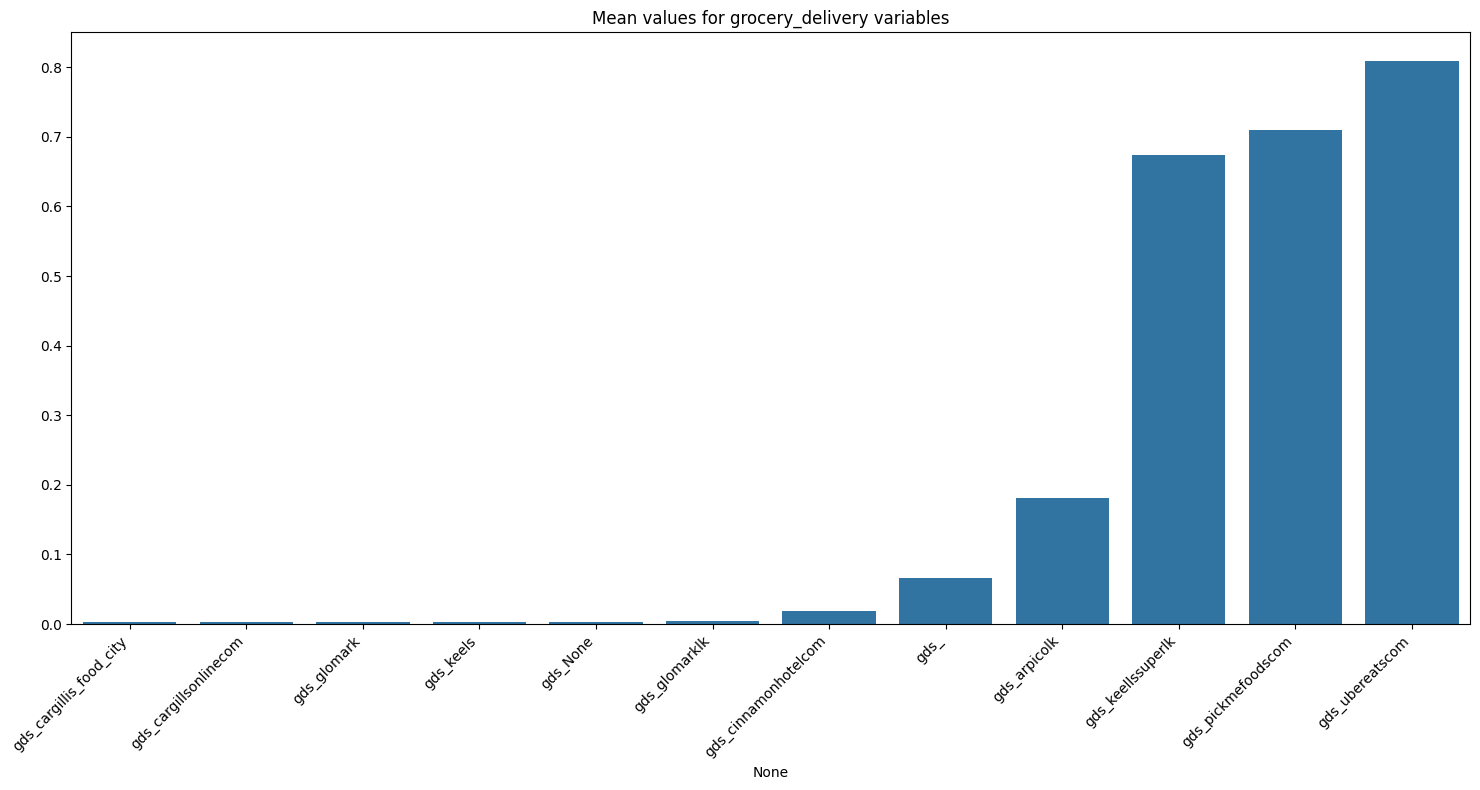

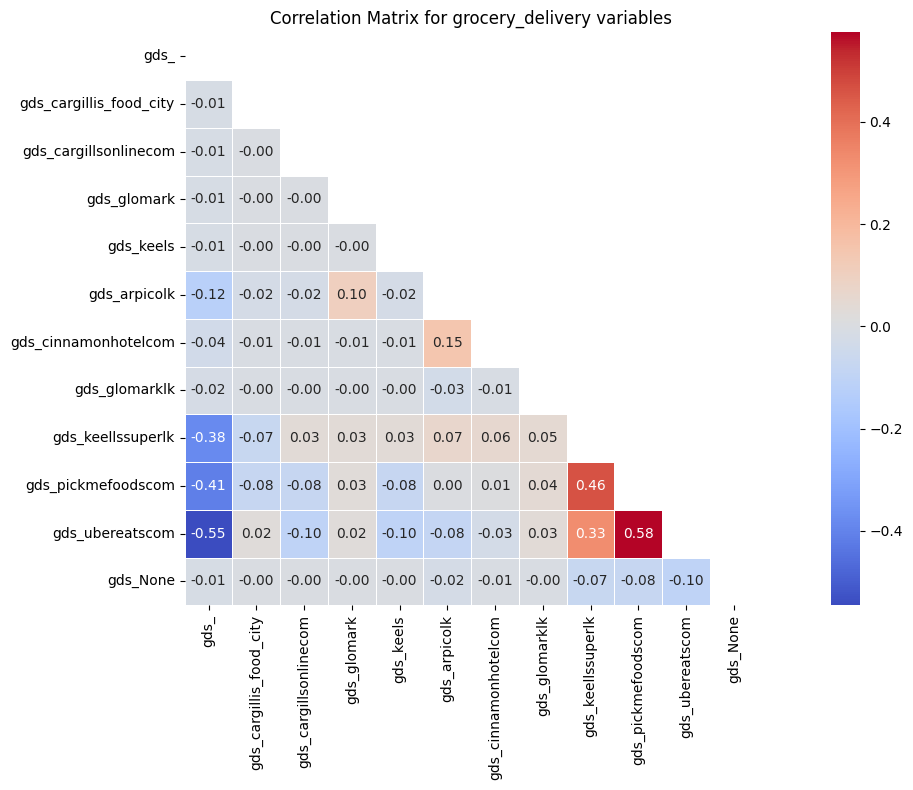

Analyzing AUTOMOBILE construct with 10 variables

Summary Statistics:
                                 count      mean       std  min  25%  50%  \
sos_automobile_                  825.0  0.271515  0.445011  0.0  0.0  0.0   
sos_automobile_ikmanlk           825.0  0.058182  0.234229  0.0  0.0  0.0   
sos_automobile_toyota            825.0  0.002424  0.049207  0.0  0.0  0.0   
sos_automobile_amazon            825.0  0.014545  0.119797  0.0  0.0  0.0   
sos_automobile_autolankacom      825.0  0.287273  0.452764  0.0  0.0  0.0   
sos_automobile_lankavechiclecom  825.0  0.040000  0.196078  0.0  0.0  0.0   
sos_automobile_patpatlk          825.0  0.231515  0.422057  0.0  0.0  0.0   
sos_automobile_pricelankalk      825.0  0.132121  0.338828  0.0  0.0  0.0   
sos_automobile_riyasewanalk      825.0  0.414545  0.492942  0.0  0.0  0.0   
sos_automobile_None              825.0  0.008485  0.091777  0.0  0.0  0.0   

                                 75%  max  missing  missing_pct  
sos_automobile_ 

<Figure size 1500x800 with 0 Axes>

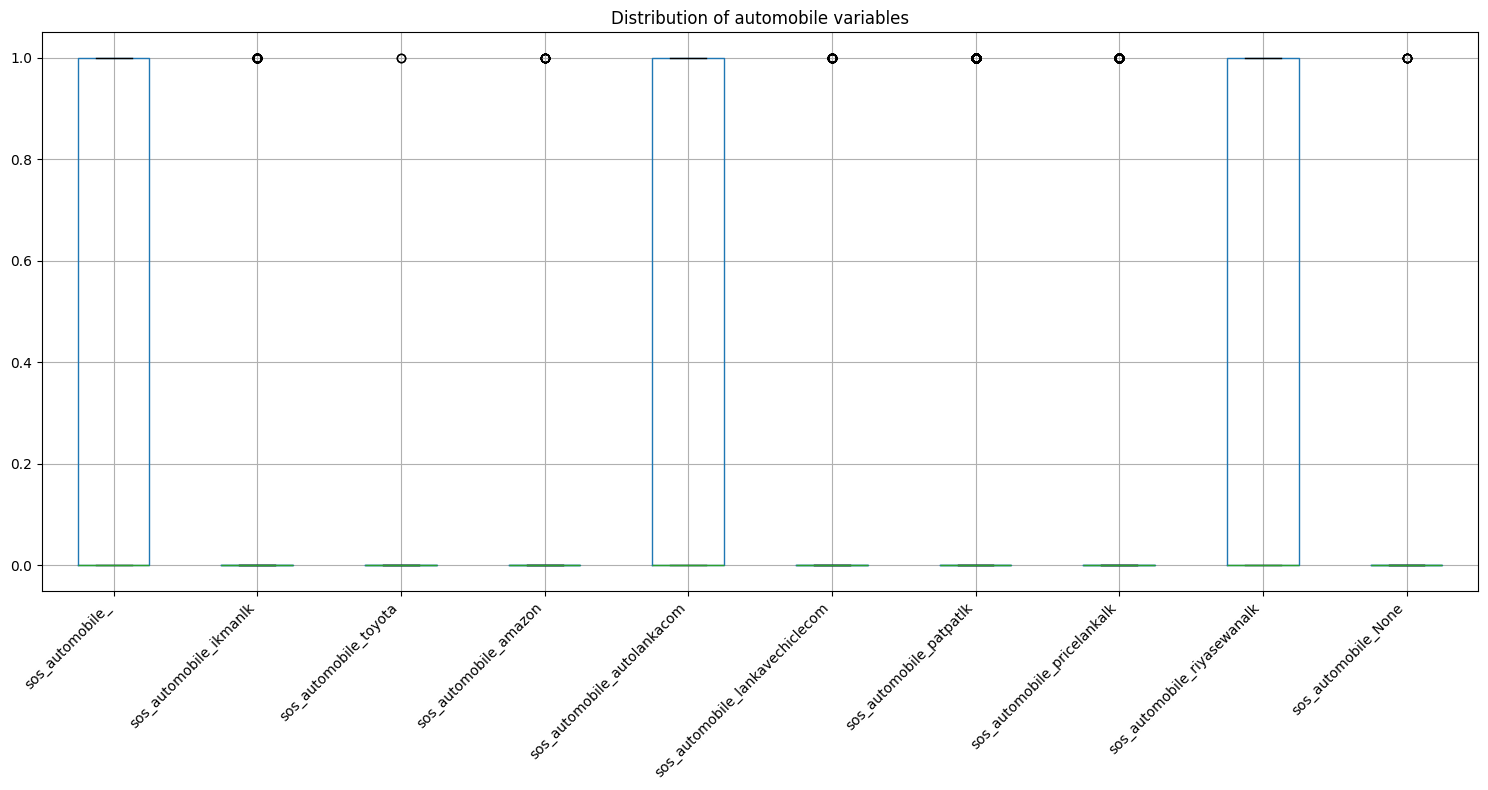

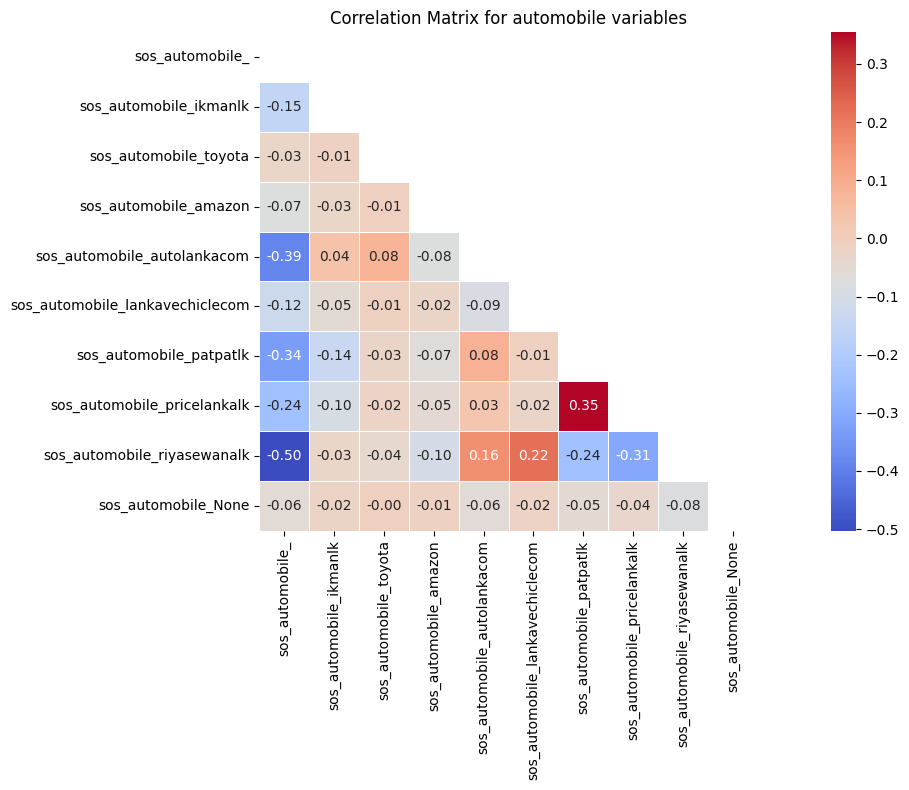

Analyzing DEMOGRAPHIC construct with 11 variables

Summary Statistics:
                                   count      mean       std  min  25%  50%  \
gender_encoded                     825.0  0.339394  0.483928  0.0  0.0  0.0   
age_encoded                        825.0  0.890909  0.475341  0.0  1.0  1.0   
marital_status_encoded             825.0  0.488485  0.500171  0.0  0.0  0.0   
education_encoded                  825.0  3.961212  0.974654  0.0  4.0  4.0   
used_online_shopping_encoded       825.0  0.996364  0.060229  0.0  1.0  1.0   
prof_employed_(full_time)          825.0  0.776970  0.416531  0.0  1.0  1.0   
prof_employed_(part_time)          825.0  0.012121  0.109493  0.0  0.0  0.0   
prof_jobless                       825.0  0.002424  0.049207  0.0  0.0  0.0   
prof_self_employed___entrepreneur  825.0  0.044848  0.207097  0.0  0.0  0.0   
prof_student                       825.0  0.162424  0.369063  0.0  0.0  0.0   
prof_unemployed                    825.0  0.001212  0.034816

<Figure size 1500x800 with 0 Axes>

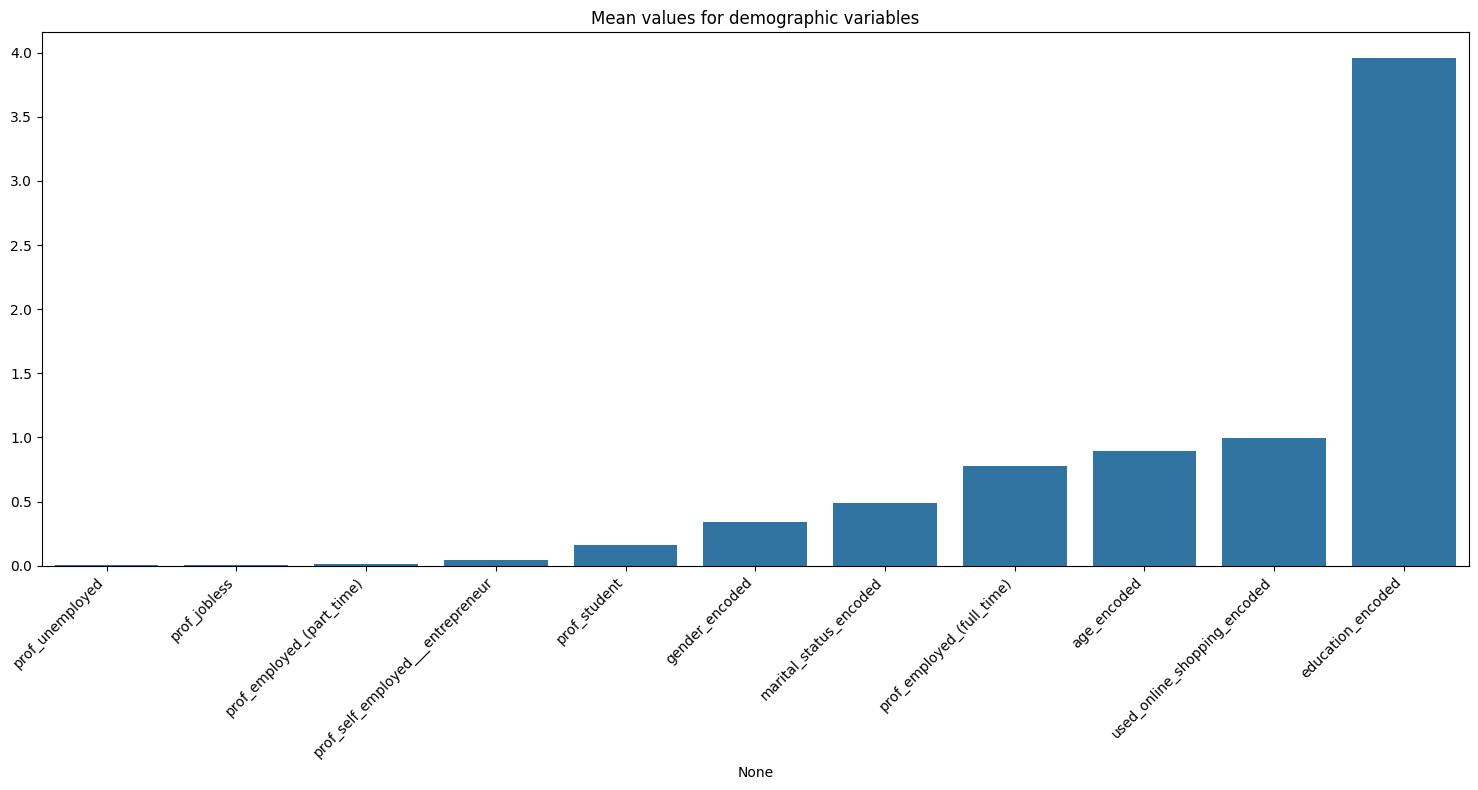

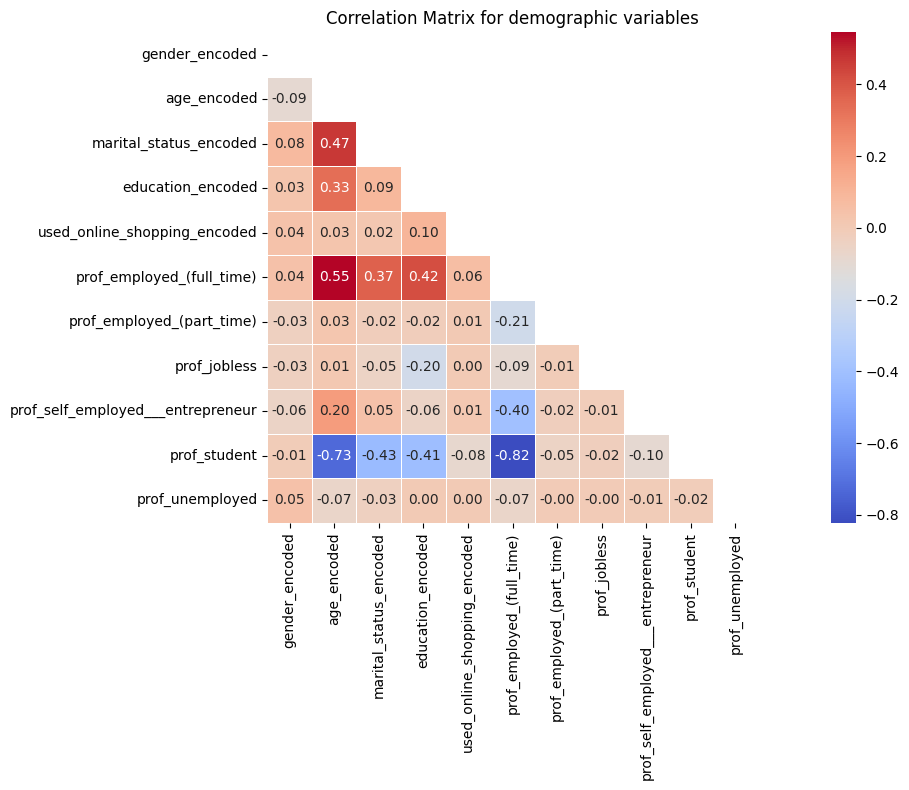

In [23]:
for construct_name, columns in constructs.items():
    if len(columns) > 0:  # Only analyze non-empty constructs
        analyze_construct(df, construct_name, columns)

#### PEOU (Perceived Ease of Use) Analysis Insights

The analysis of PEOU variables reveals that respondents generally find online shopping platforms moderately easy to use, with navigation features receiving the most positive ratings. However, there are clear opportunities for improvement in error handling and system response time, which received lower ratings.

Key findings:
- Navigation features are perceived most positively (means ≈ 3.5)
- Response time and error handling received the lowest ratings (means < 3.0)
- Consistent but moderate variability across ratings suggests general consensus among users
- The overall moderate ratings (most means between 3.0-3.5) indicate that while platforms are considered usable, there's substantial room for improvement

These findings suggest that e-commerce platforms should prioritize improving error recovery mechanisms and system responsiveness to enhance user experience and potentially increase purchase intention.

#### Perceived Usefulness (PU) Analysis Insights

The analysis of PU variables reveals that respondents find online shopping platforms most useful for their convenience benefits, while cost savings and information quality are perceived as less valuable features.

Key findings:
- Convenience aspects received the highest ratings (means > 3.6), highlighting the primary value proposition of online shopping
- Product-related features were rated moderately positive (means ≈ 3.3-3.4)
- Cost benefits and information quality received the lowest ratings (means ≈ 3.1-3.2), suggesting potential areas for improvement
- Higher variability in convenience ratings indicates diverse opinions about this aspect
- The overall positive ratings across all PU dimensions (all means > 3.0) suggest that users generally recognize the usefulness of online shopping platforms

These findings suggest that e-commerce platforms should emphasize convenience in their marketing while working to improve perceived cost benefits and information quality to enhance overall perceived usefulness.

#### Structural Assurance (SA) Analysis Insights

The analysis of SA variables reveals that respondents have moderate confidence in the security and trust measures of online shopping platforms, with payment security receiving the highest trust ratings and policy implementation receiving the lowest.

Key findings:
- Payment security aspects are rated most positively (means ≈ 3.31), indicating relative confidence in transaction processes
- Privacy protection measures received moderate ratings (means ≈ 3.12-3.17)
- Policy implementation received the lowest ratings (means ≈ 3.09-3.15), suggesting skepticism about adherence to stated policies
- Consistent standard deviations across all SA variables indicate uniform levels of agreement among respondents
- The moderately positive but cautious ratings (most means just above 3.0) suggest that trust and security remain concerns for many users

These findings suggest that while e-commerce platforms have established basic trust in their payment systems, there are opportunities to improve user confidence in privacy protection and policy implementation, which could potentially increase purchase intention.

#### Social Influence (SI) Analysis Insights

The analysis of SI variables reveals that social factors have varying degrees of influence on online purchase decisions, with product reviews and word-of-mouth recommendations being the most influential, while normative social pressure has the least impact.

Key findings:
- Product reviews are the most influential social factor (means of 3.58-3.76), followed by word-of-mouth recommendations (means of 3.51-3.52)
- Social media also plays a significant role in shaping purchase decisions (means of 3.42-3.49)
- Direct normative social pressure is the least influential factor (means of 2.84-3.16), suggesting consumers value informational influence over conformity pressure
- Higher variability in ratings for reviews and social media indicates diverse opinions about these influences
- Strong correlations between paired items for each type of social influence suggest these are reliable measurements of distinct social influence mechanisms

These findings suggest that e-commerce platforms should prioritize robust review systems and social sharing features while also leveraging word-of-mouth through referral programs to maximize social influence on purchase decisions.

#### Attitude (ATT) Analysis Insights

The analysis of ATT variables reveals that respondents generally have very positive attitudes toward online shopping, which is likely a strong predictor of purchase intention.

Key findings:
- Attitude ratings are among the highest of all constructs (means of 3.83 and 3.88)
- Most respondents rated their attitude as positive or very positive (median of 4.0 for both variables)
- Relatively low variability in attitudes suggests a consensus about the positive perception of online shopping
- The moderate correlation between attitude variables (0.35) indicates they capture different but related aspects of overall attitude

These findings align with expectation theory, suggesting that positive attitudes toward online shopping are well-established among consumers and likely serve as a critical mediating factor between other constructs (such as PEOU, PU, SA) and purchase intention.

#### Perceived Risk (RISK) Analysis Insights

The analysis of RISK variables reveals that respondents have significant concerns about security and product authenticity when shopping online, which could be major inhibitors of purchase intention despite positive attitudes.

Key findings:
- Security risk received the highest mean rating (3.97) of any variable in the dataset, highlighting it as the primary concern for online shoppers
- Product authenticity concerns are also substantial (mean of 3.78), though slightly less pronounced than security concerns
- The distribution of risk ratings is skewed toward higher values (4-5), indicating that these are widespread concerns
- The moderate correlation (0.30) between security and authenticity risks indicates these are distinct aspects of risk that need to be addressed separately
- Both risk variables have among the highest means across all constructs, suggesting risk perception could be a critical barrier to online purchasing

These findings suggest that e-commerce platforms need to prioritize security measures and authentication guarantees to overcome risk perceptions that might otherwise prevent consumers from completing purchases despite positive attitudes toward online shopping.

#### Online Purchase Intention (OPI) Analysis Insights

The analysis of OPI variables reveals that respondents have strong positive intentions toward online shopping, with particularly high ratings for behavior change intention.

Key findings:
- High mean scores across all OPI variables (3.7-3.9 out of 5) indicate strong positive intentions toward online shopping
- Behavior change intention received the highest rating (mean = 3.90), suggesting respondents are actively considering shifting to online shopping
- Nearly 97% of respondents have already made an online purchase, indicating high adoption of online shopping
- Strong correlation (0.84) between behavior change and convenience perceptions suggests these factors are closely linked
- Satisfaction appears to measure a distinct aspect of online shopping, with minimal correlation to other OPI variables

These findings suggest that online retailers should focus on enhancing the convenience aspects of their platforms, as this strongly relates to behavioral intentions. The high adoption rate also indicates that marketing strategies should focus on increasing purchase frequency and basket size rather than initial adoption.

#### E-Commerce Platform Usage Analysis Insights

The analysis of platform usage reveals a highly concentrated market dominated by three major platforms, with most specialized platforms struggling to gain significant traction.

Key findings:
- Three platforms dominate the market: Daraz.lk (90.3% usage), Kapruka.com (68.1% usage), and Ikman.lk (62.9% usage)
- Secondary platforms like Wow.lk (11.8%) and Takas.lk (7.9%) have moderate adoption
- The vast majority of other platforms have usage rates below 1%, indicating significant market concentration
- Only 3.2% of respondents don't use any listed platforms, confirming high e-commerce adoption
- Limited correlations between platform usage suggest users tend to gravitate toward a few preferred platforms rather than using many different ones

These findings suggest that network effects and first-mover advantages may be creating significant barriers to entry in the e-commerce market. New entrants may need to focus on highly specialized niches or distinctive value propositions to compete with established platforms.

#### Online Pharmacy Platform Usage Analysis Insights

The analysis of online pharmacy platform usage reveals a less mature but growing market with more balanced competition compared to general e-commerce.

Key findings:
- 34.5% of respondents don't use any online pharmacy platform, indicating significant growth potential
- OnlinePharmacy.lk leads the market with 28.8% usage, followed by Healthgurd.lk (21.6%)
- The market is less concentrated than general e-commerce, with more balanced distribution among competitors
- Negative correlation (-0.29) between nearby pharmacy usage and online platform usage suggests these serve different consumer segments
- Positive correlations between certain health-focused platforms indicate that early adopters may experiment with multiple services

These findings suggest that the online pharmacy market is still developing, with room for multiple players to grow. The significant percentage of non-users represents an opportunity for platforms that can address barriers to adoption, which may include concerns about medication authenticity, delivery reliability, and prescription handling.

#### Fashion Brand Usage Analysis Insights

The analysis of online fashion brand usage reveals a concentrated market with one dominant player and several significant secondary competitors.

Key findings:
- Kapruka.com dominates with 53.8% usage, creating a clear market leader in online fashion
- Four secondary players have significant market share: Odel.lk (20.2%), Thilakwardana.lk (19.5%), FashionBug.lk (14.8%), and Kelly Felder (14.2%)
- High market adoption with 73.9% of respondents using at least one online fashion brand
- Extreme fragmentation among smaller brands, with most having usage rates below 0.5%
- Evidence of multi-platform shopping behavior with consumers using multiple fashion sites

These findings suggest a "winner-takes-most" market dynamic in online fashion retail. For new entrants, competing directly with established players may be challenging; strategic partnerships or distinctive positioning in underserved niches might offer better opportunities for growth.

#### Grocery and Food Delivery Usage Analysis Insights

The analysis of grocery and food delivery platform usage reveals an extremely high adoption rate with three major platforms dominating the market.

Key findings:
- UberEats leads with 81.0% usage, followed closely by PickMeFood (71.0%) and Keells Super (67.4%)
- Very high overall market penetration with 93.2% of respondents using at least one delivery service
- Restaurant delivery platforms show higher adoption than pure grocery delivery services
- Clear oligopolistic market structure with three dominant players, unlike the single-leader fashion market
- Evidence of widespread multi-platform usage behavior, with most consumers using several delivery services

These findings suggest that food and grocery delivery has reached mainstream adoption. The high usage of multiple platforms indicates consumers are price-sensitive and opportunistic, likely using different services based on promotions, restaurant availability, or delivery times. For businesses, integration with multiple delivery platforms appears critical to reach the maximum customer base.

#### Automobile Online Services Usage Analysis Insights

The analysis of automobile-related online services reveals a moderately developed market with more balanced competition than other e-commerce categories.

Key findings:
- Riyasewana.lk leads the market with 41.5% usage, followed by Autolanka.com (28.7%) and PatPat.lk (23.2%)
- Moderate market penetration with 72% of respondents using at least one online automobile service
- More balanced distribution of market share among competitors compared to fashion or food delivery
- Lower overall adoption rates compared to other e-commerce categories, suggesting the automobile sector is less digitally mature
- Evidence of multi-platform usage behavior, indicating comparison shopping is common in this category

These findings suggest that the online automobile services market is still developing, with significant room for growth. The more even distribution of market share indicates lower barriers to entry compared to other e-commerce categories, potentially offering opportunities for innovative services to capture market share.

### Demographic Analysis Insights

The demographic analysis reveals that our sample predominantly consists of educated, working-age adults with substantial online shopping experience, providing a strong foundation for understanding factors influencing online purchase intention among digitally engaged consumers.

Key findings:
- High concentration of full-time employed respondents (77.7%) suggests findings represent economically active consumers
- Near-universal online shopping experience (99.6%) indicates insights come from knowledgeable users rather than novices
- High education levels (mean of 3.96 on a 0-6 scale) suggest findings represent technologically literate consumers
- Age distribution concentrated in the young to middle-aged adult category (likely 25-35 range)
- Even split between married and unmarried respondents (48.8% married) allows for balanced insights across these segments
- Gender distribution shows some imbalance (mean of 0.34 on encoded scale), which should be considered when interpreting results

These demographic characteristics create a context for interpreting other findings, particularly suggesting that our results best represent the behaviors and preferences of educated, digitally-savvy working adults - a core demographic for e-commerce businesses targeting growth in online sales.

### **Focus on specific columns**


Detailed analysis of focus columns:

Analyzing numeric column: opi_satisfaction


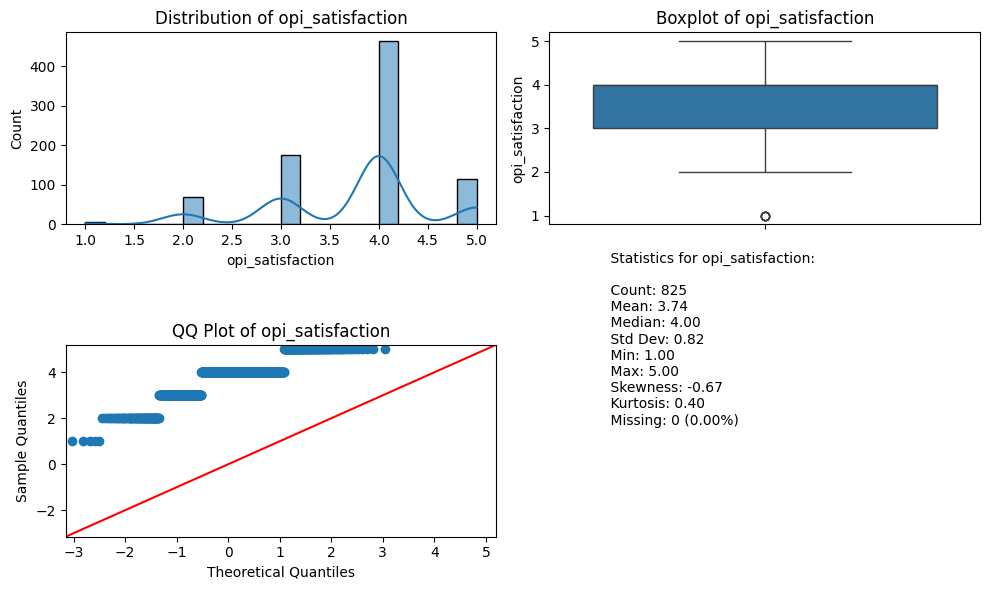

Potential outliers detected for opi_satisfaction: 5 values

Analyzing numeric column: opi_behavior_change


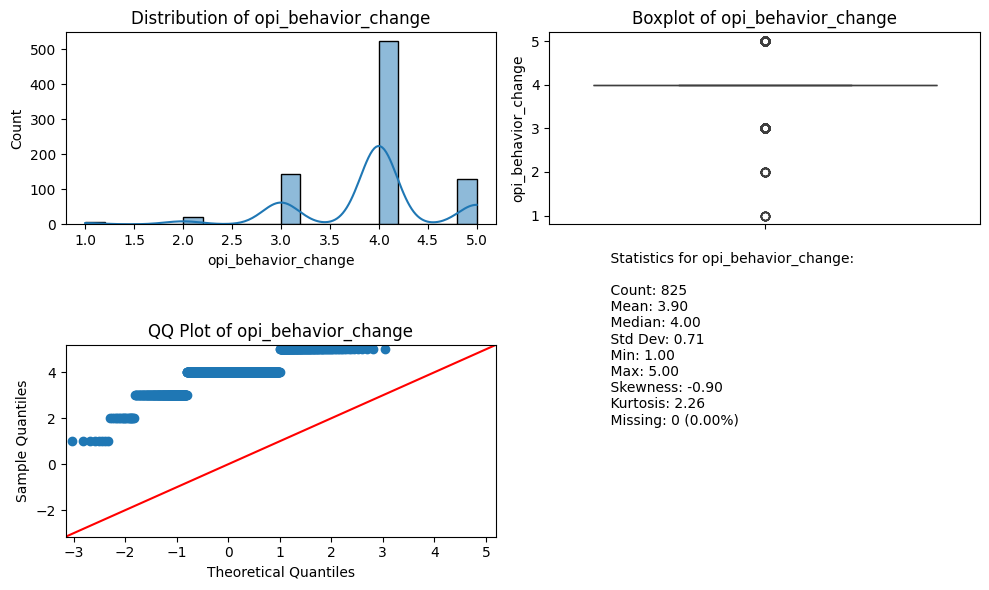

Potential outliers detected for opi_behavior_change: 303 values

Analyzing binary column: opi_purchased?


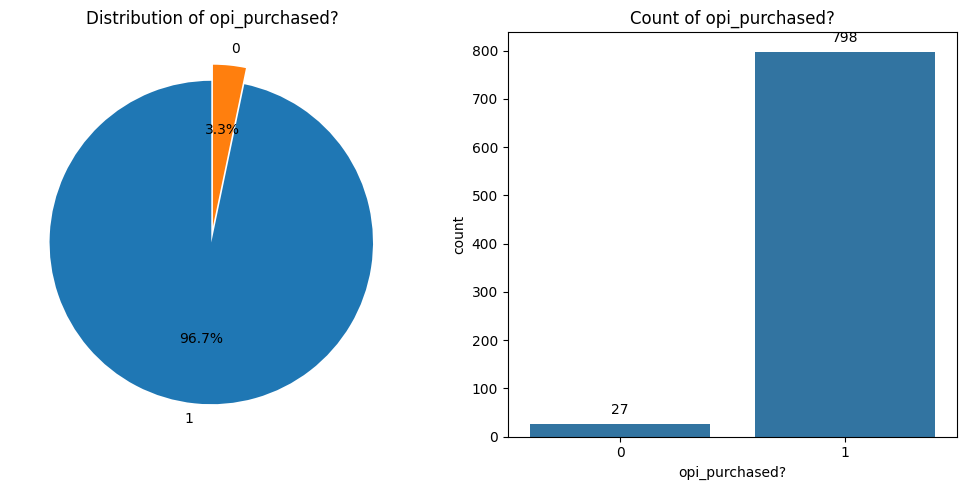


Statistics for opi_purchased?:
Total count: 825
Missing values: 0 (0.00%)

Frequency Table:
   Value  Count  Percentage
0      1    798       96.73
1      0     27        3.27

Analyzing numeric column: peou_navigation_1


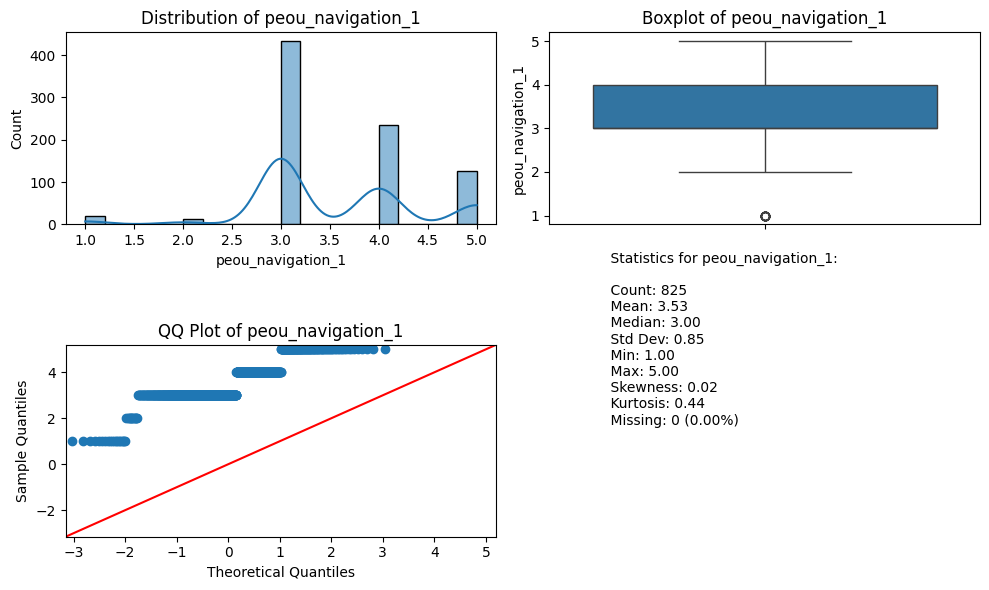

Potential outliers detected for peou_navigation_1: 19 values

Analyzing numeric column: pu_product_1


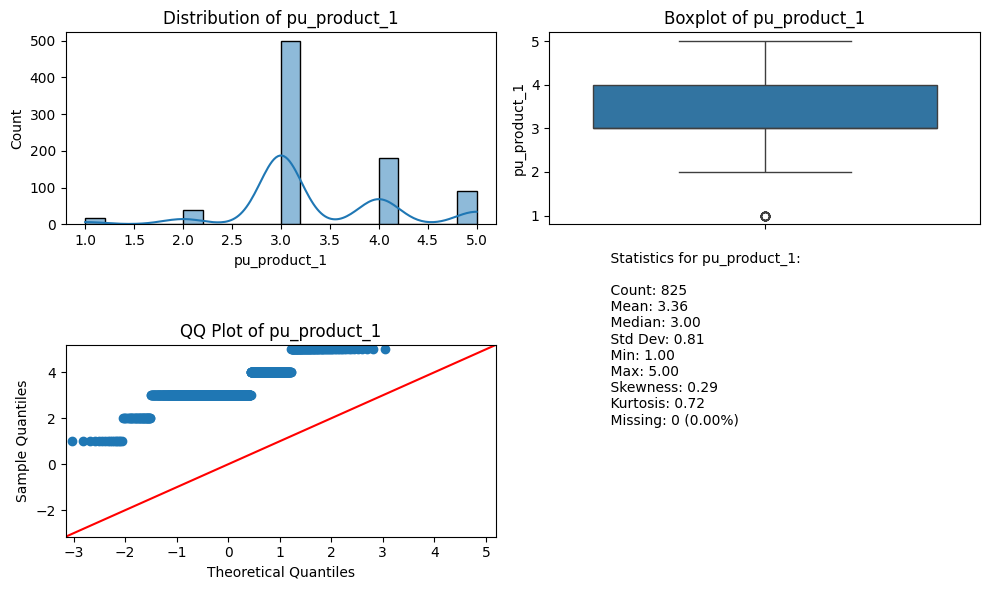

Potential outliers detected for pu_product_1: 16 values


In [24]:
if focus_columns:
    print("\nDetailed analysis of focus columns:")
    for col in focus_columns:
        if col in col_types['numeric']:
            print(f"\nAnalyzing numeric column: {col}")
            univariate_numeric(df, col)
        elif col in col_types['binary']:
            print(f"\nAnalyzing binary column: {col}")
            univariate_binary(df, col)
        elif col in col_types['categorical']:
            print(f"\nAnalyzing categorical column: {col}")
            univariate_categorical(df, col)



### Analysis of Online Purchase Intention (OPI) Variables

#### 1. Satisfaction with Online Shopping (opi_satisfaction)

This variable measures users' overall satisfaction with their online shopping experiences.

**Key Insights:**
- **High Average Satisfaction**: With a mean of 3.74 out of 5, respondents report good satisfaction with online shopping experiences.
- **Strong Consensus**: The median value of 4.0 indicates that most respondents are satisfied.
- **Low Variability**: Standard deviation of 0.82 suggests relatively consistent satisfaction ratings.
- **Negative Skew**: The skewness of -0.67 indicates that ratings are concentrated toward the higher end of the scale.
- **Few Outliers**: Only 5 outliers were detected, suggesting that extremely low satisfaction ratings are rare.
- **Distribution Pattern**: The histogram shows a clear peak at 4.0, with secondary peaks at 3.0 and 5.0, reflecting a generally positive but nuanced satisfaction pattern.

#### 2. Behavior Change Intention (opi_behavior_change)

This variable measures respondents' intention to change their shopping behavior to include more online purchasing.

**Key Insights:**
- **Strong Behavioral Intent**: The high mean of 3.90 indicates strong intentions to increase online shopping.
- **Widespread Agreement**: The median of 4.0 shows that most respondents are likely to increase their online shopping.
- **Uniform Direction**: The negative skew (-0.90) confirms that responses are heavily weighted toward positive intentions.
- **Significant Outlier Pattern**: The 303 outliers represent respondents whose behavior change intentions deviate significantly from the norm - this large number suggests a distinct segment of users with different perspectives.
- **Powerful Indication**: The high kurtosis (2.26) shows a strong concentration of responses around the mean, indicating strong consensus.

#### 3. Online Purchase Experience (opi_purchased?)

This binary variable indicates whether respondents have previously made an online purchase.

**Key Insights:**
- **Nearly Universal Adoption**: An overwhelming 96.73% of respondents have made at least one online purchase.
- **Minimal Non-Adopters**: Only 3.27% (27 respondents) have never made an online purchase.
- **Market Maturity**: The extremely high adoption rate indicates that online shopping has crossed the chasm to mainstream adoption in the study population.
- **Research Implication**: This suggests the research findings primarily represent the perspectives of experienced online shoppers rather than first-time or potential users.

### Analysis of Key Predictor Variables

#### 4. Navigation Ease (peou_navigation_1)

This variable measures how easily users can navigate online shopping platforms.

**Key Insights:**
- **Positive Perception**: The mean of 3.53 indicates that most users find online shopping platforms reasonably easy to navigate.
- **Room for Improvement**: While positive, this score suggests opportunities for further enhancing navigation.
- **Typical Variance**: Standard deviation of 0.85 shows moderate agreement among users.
- **Trimodal Distribution**: The distribution shows peaks at 3, 4, and 5, suggesting three distinct user experience segments.
- **Outlier Analysis**: The 19 outliers represent users with significantly different navigation experiences than the majority.

#### 5. Product Information Quality (pu_product_1)

This variable measures perceived quality of product information available on online shopping platforms.

**Key Insights:**
- **Moderate Satisfaction**: The mean of 3.36 suggests users find product information adequate but not exceptional.
- **Conventional Ratings**: The central tendency (median 3.0) indicates neutral-to-positive perceptions.
- **Positive Skew**: The slight positive skew (0.29) suggests more users rate product information below the mean than above it.
- **Improvement Opportunity**: This represents a clear area where online platforms could enhance user experience.
- **Outlier Consideration**: The 16 outliers may represent users with either exceptionally good or poor experiences with product information.

### Integrated Analysis and Implications

The combined analysis of these focus columns reveals several important insights:

1. **High Adoption with Strong Future Intent**: The near-universal adoption (96.73%) combined with strong behavior change intentions (3.90/5) indicates a mature market with continuing growth potential.

2. **Experience-Satisfaction Gap**: While nearly everyone has shopped online, satisfaction (3.74/5) suggests there's room for improvement in the experience.

3. **Navigation as a Strength**: Navigation (3.53/5) appears to be one of the more positively perceived aspects of the online shopping experience.

4. **Product Information as Development Area**: The relatively lower rating for product information quality (3.36/5) indicates a potential area for improvement.

5. **Segmentation Potential**: The distribution patterns and outliers suggest distinct user segments with different experiences and needs, particularly in behavior change intention (303 outliers).

These findings collectively suggest that while online shopping has achieved mainstream adoption, platforms should focus on enhancing satisfaction through improved product information and continued refinement of navigation features to support users' strong intentions to increase online purchasing behavior.

### **Relationship between outcome variables and key predictors**


Analyzing relationships between outcome variables and key predictors:


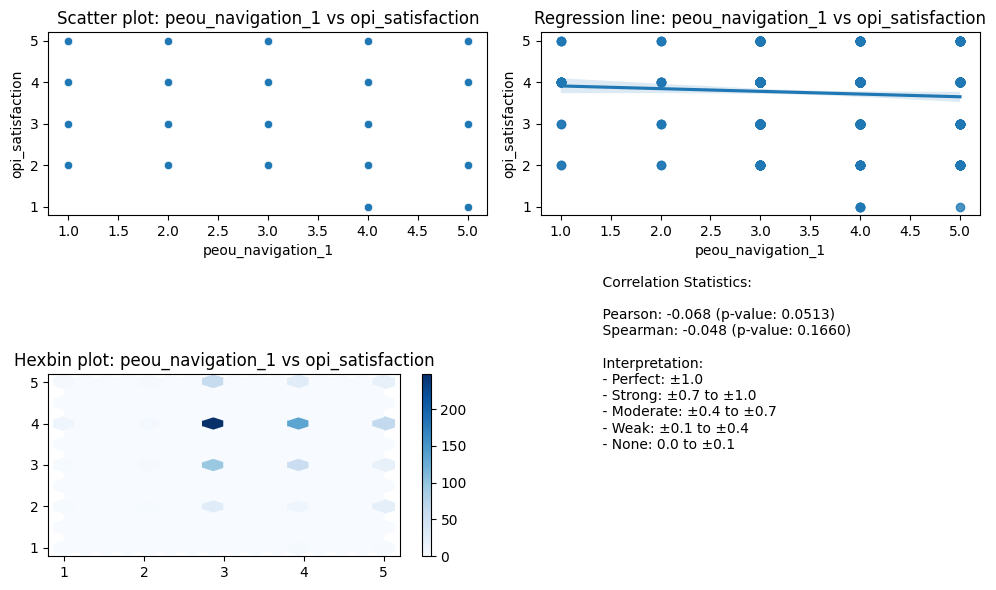


Relationship between peou_navigation_1 and opi_satisfaction:
There is a very weak or no negative correlation (-0.068) that is not statistically significant (p=0.0513).


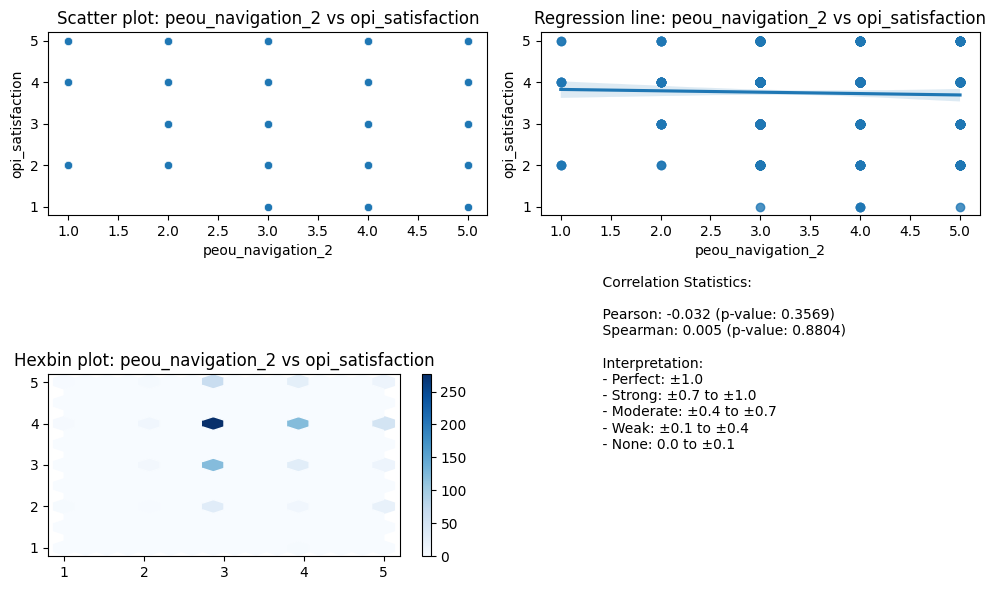


Relationship between peou_navigation_2 and opi_satisfaction:
There is a very weak or no negative correlation (-0.032) that is not statistically significant (p=0.3569).


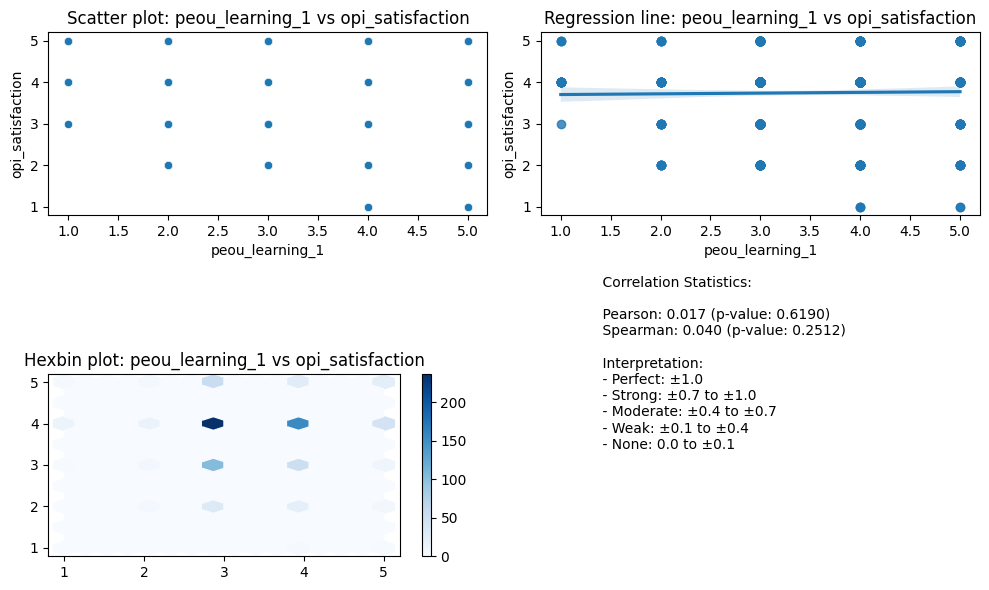


Relationship between peou_learning_1 and opi_satisfaction:
There is a very weak or no positive correlation (0.017) that is not statistically significant (p=0.6190).


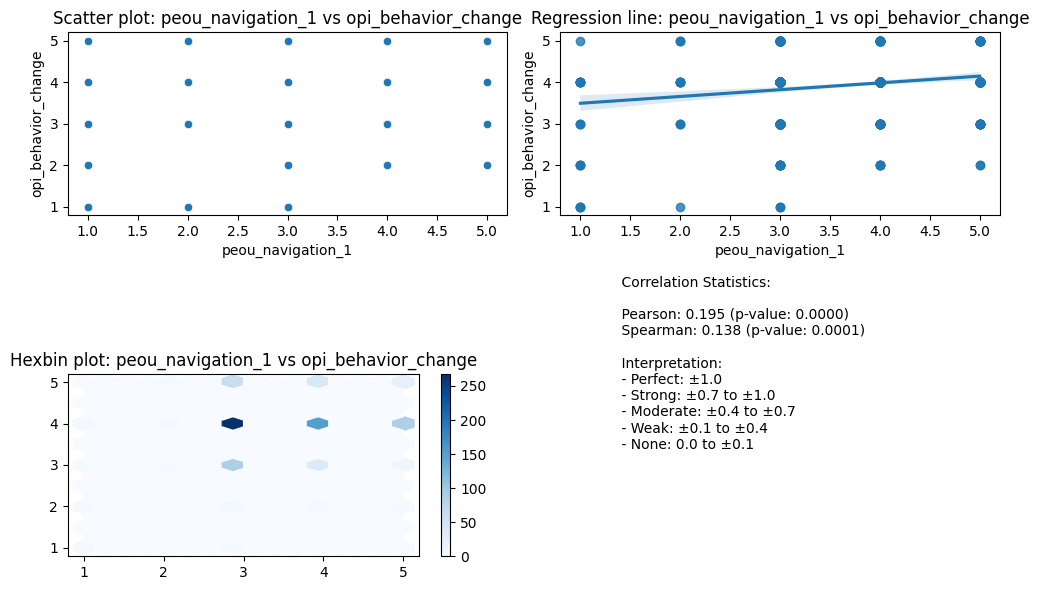


Relationship between peou_navigation_1 and opi_behavior_change:
There is a weak positive correlation (0.195) that is statistically significant (p=0.0000).


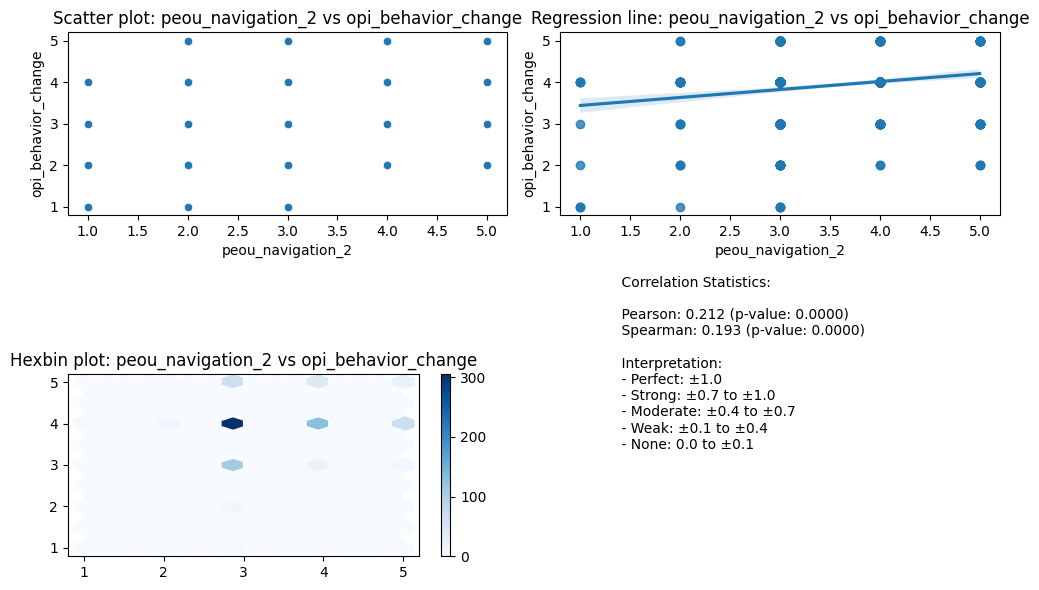


Relationship between peou_navigation_2 and opi_behavior_change:
There is a weak positive correlation (0.212) that is statistically significant (p=0.0000).


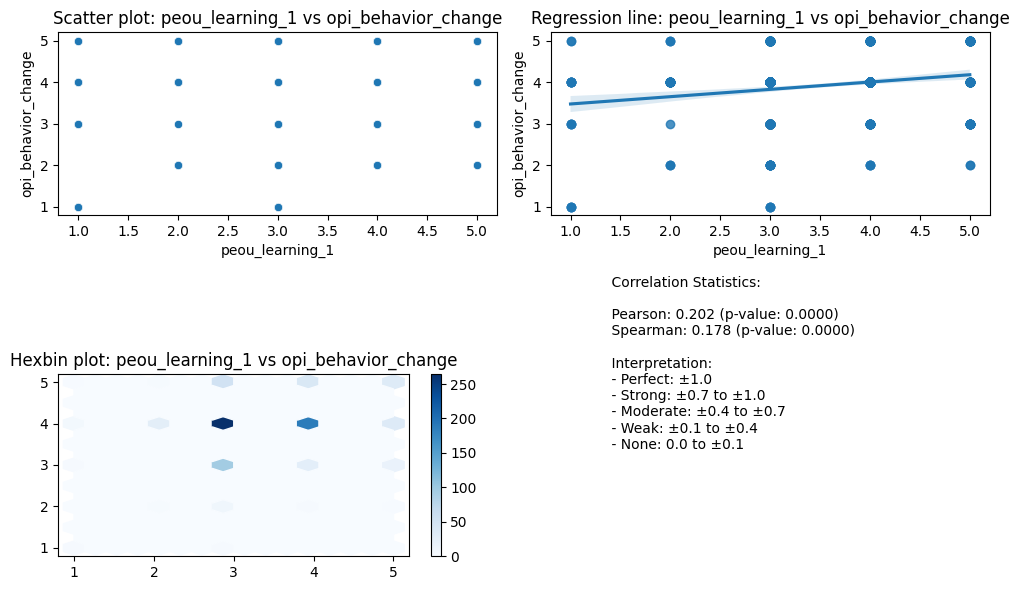


Relationship between peou_learning_1 and opi_behavior_change:
There is a weak positive correlation (0.202) that is statistically significant (p=0.0000).


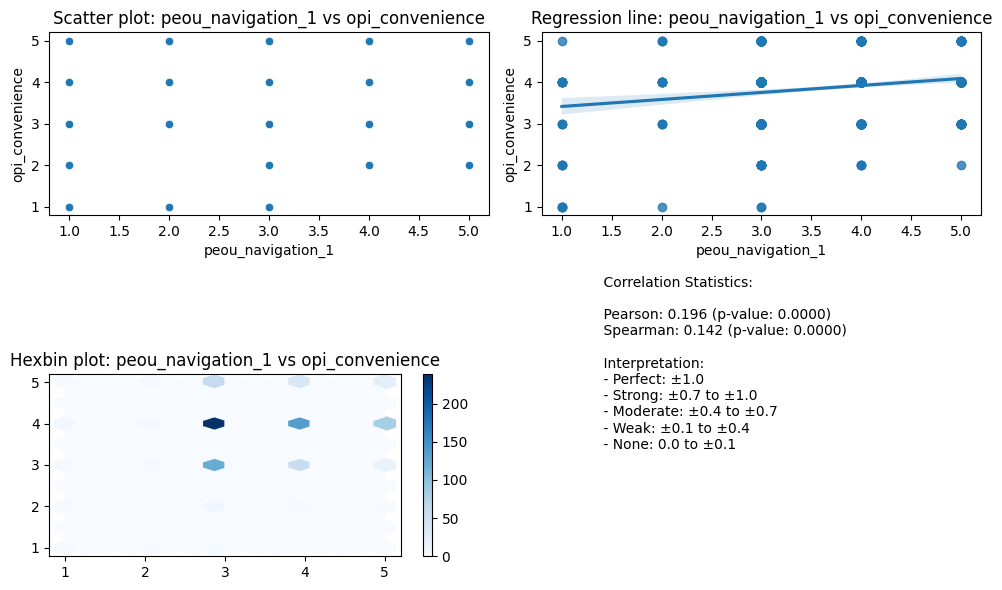


Relationship between peou_navigation_1 and opi_convenience:
There is a weak positive correlation (0.196) that is statistically significant (p=0.0000).


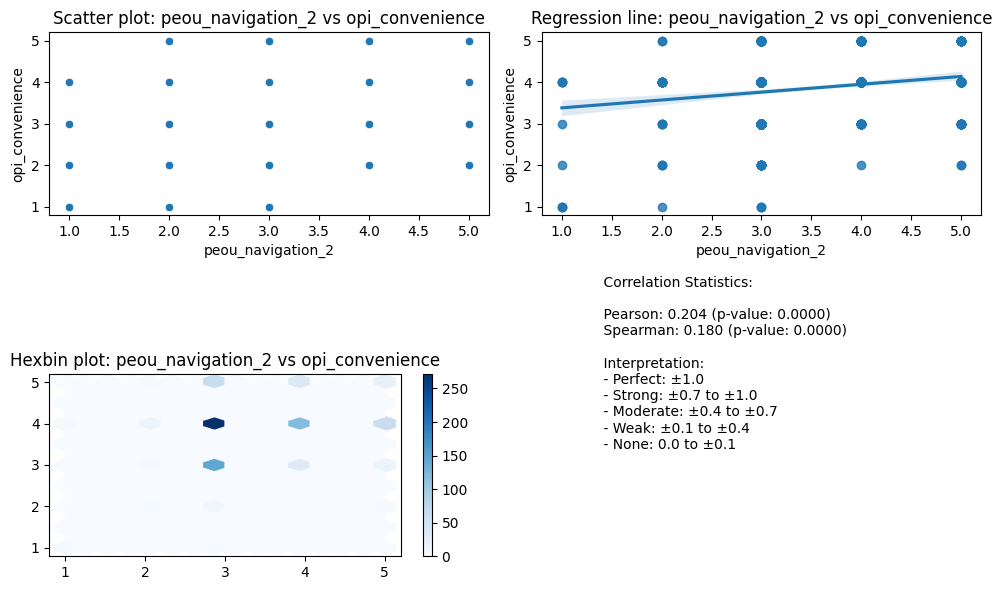


Relationship between peou_navigation_2 and opi_convenience:
There is a weak positive correlation (0.204) that is statistically significant (p=0.0000).


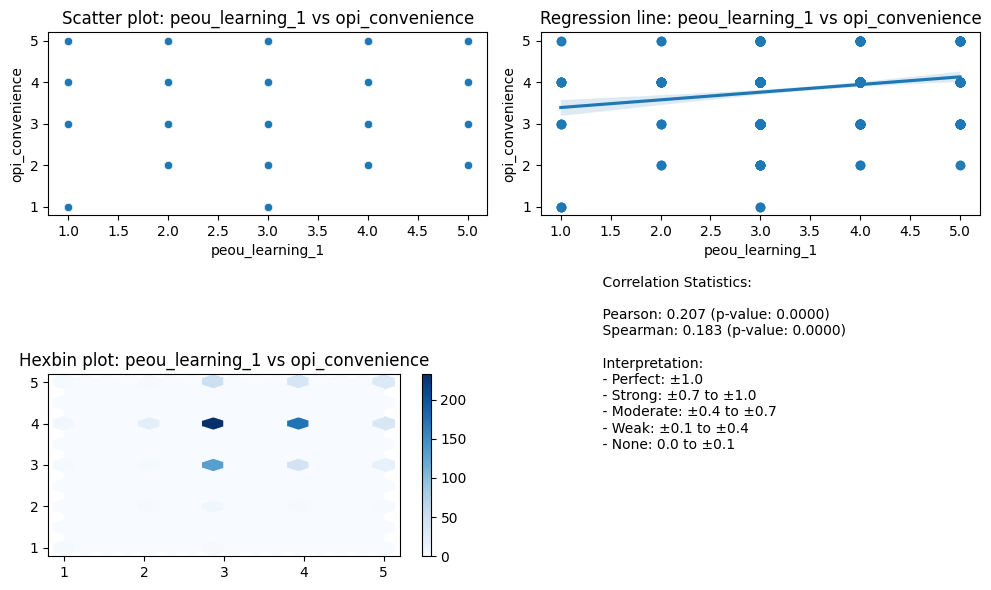


Relationship between peou_learning_1 and opi_convenience:
There is a weak positive correlation (0.207) that is statistically significant (p=0.0000).


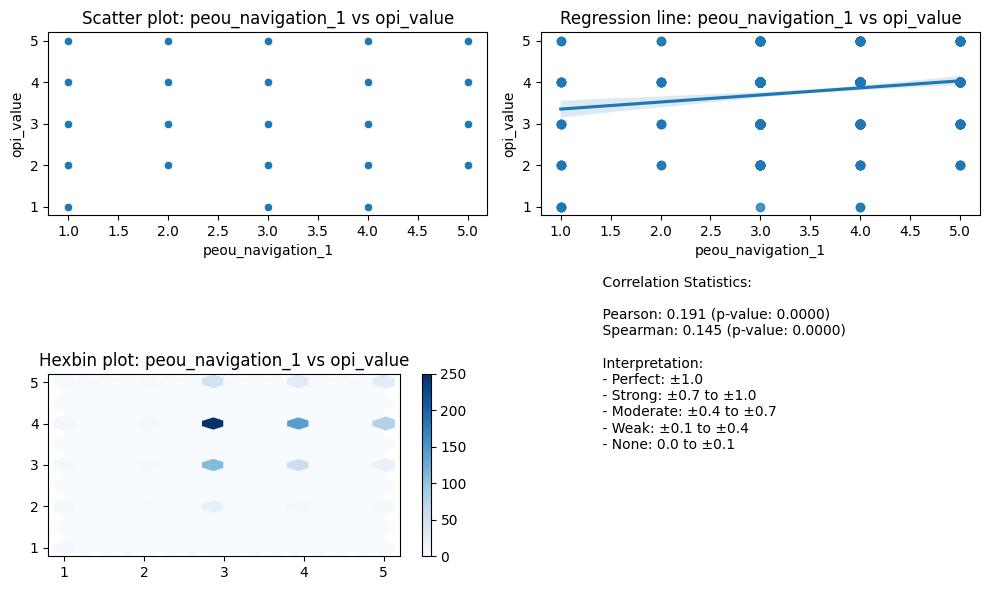


Relationship between peou_navigation_1 and opi_value:
There is a weak positive correlation (0.191) that is statistically significant (p=0.0000).


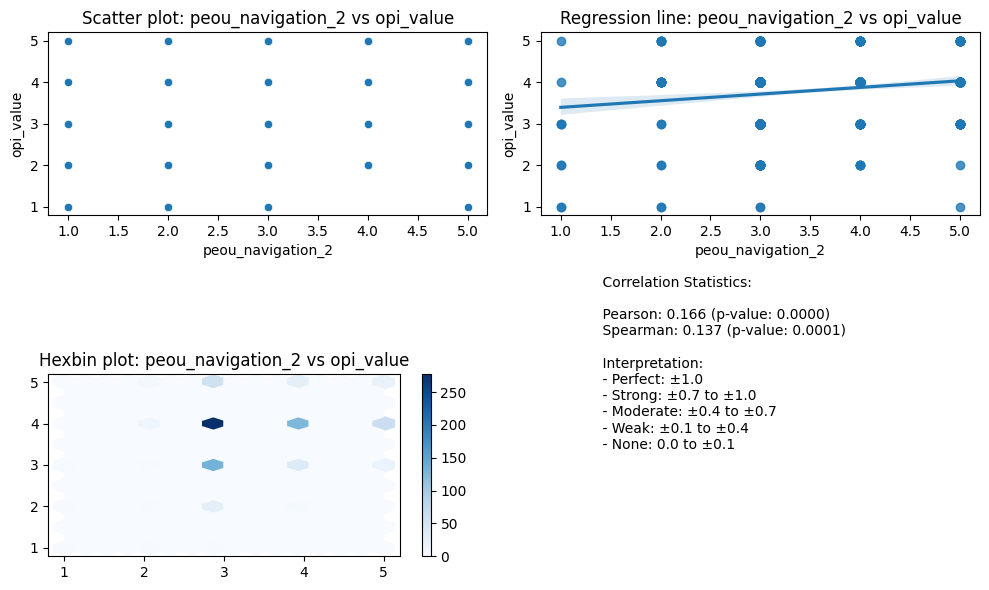


Relationship between peou_navigation_2 and opi_value:
There is a weak positive correlation (0.166) that is statistically significant (p=0.0000).


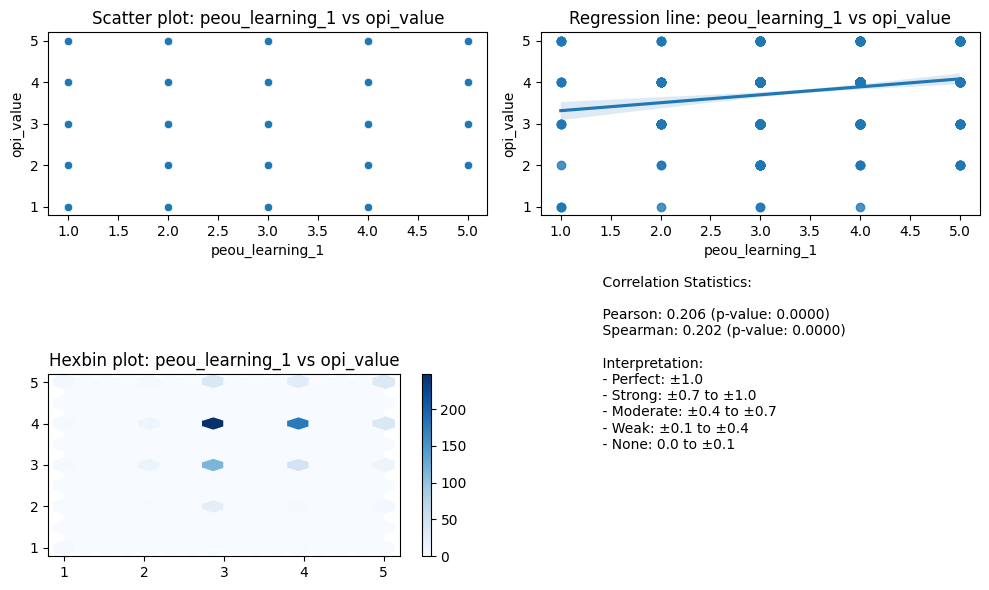


Relationship between peou_learning_1 and opi_value:
There is a weak positive correlation (0.206) that is statistically significant (p=0.0000).


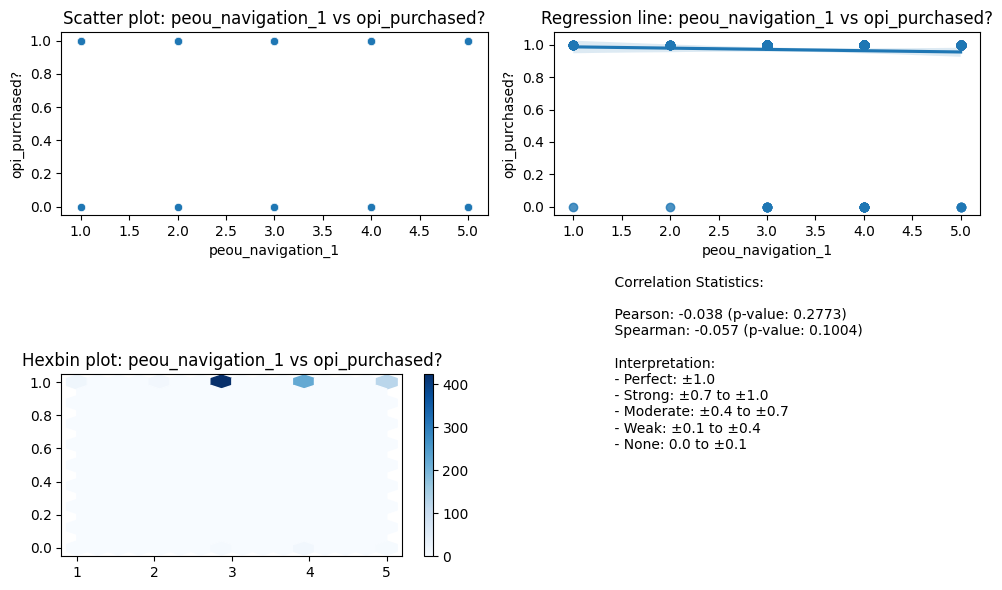


Relationship between peou_navigation_1 and opi_purchased?:
There is a very weak or no negative correlation (-0.038) that is not statistically significant (p=0.2773).


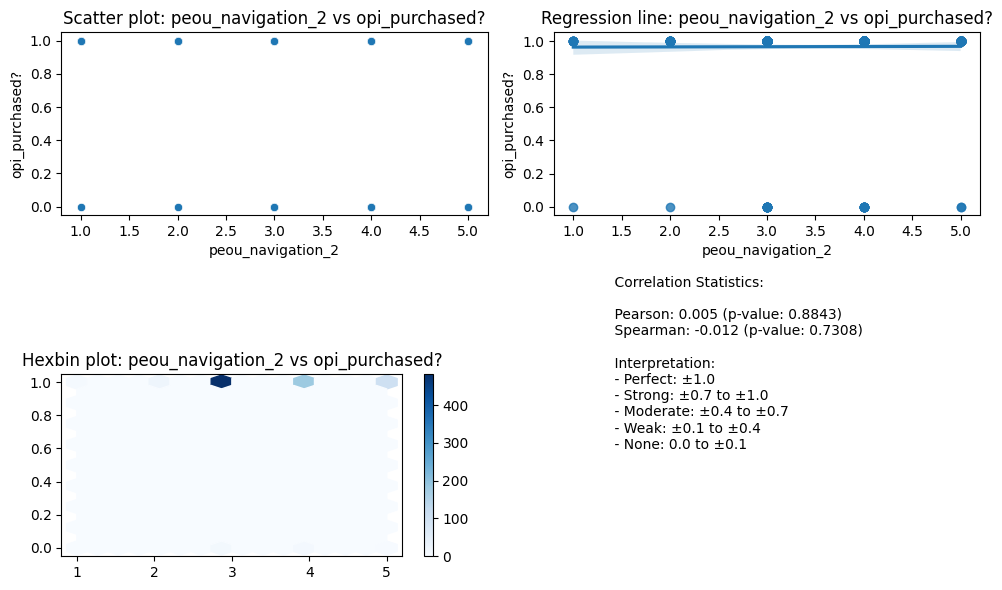


Relationship between peou_navigation_2 and opi_purchased?:
There is a very weak or no positive correlation (0.005) that is not statistically significant (p=0.8843).


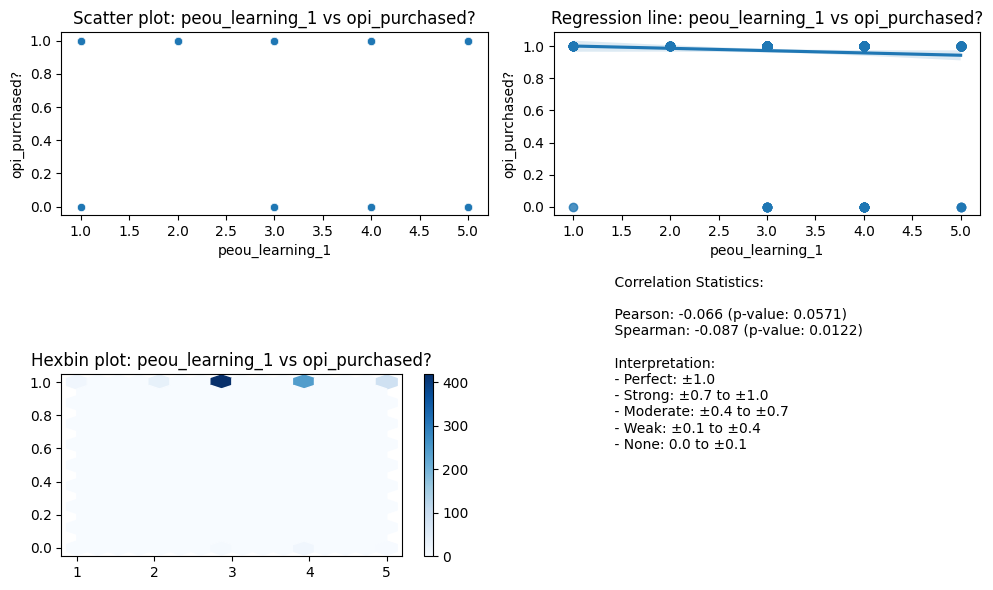


Relationship between peou_learning_1 and opi_purchased?:
There is a very weak or no negative correlation (-0.066) that is not statistically significant (p=0.0571).


In [25]:
print("\nAnalyzing relationships between outcome variables and key predictors:")
outcome_vars = [col for col in df.columns if col.startswith('opi_')]
key_predictors = constructs['peou'] + constructs['pu'] + constructs['sa'] + constructs['si'] + constructs['att'] + constructs['risk']
    
# Sample a few key relationships
for outcome in outcome_vars:
    for predictor in key_predictors[:3]:  # Limit to first 3 predictors for brevity
        bivariate_numeric_numeric(df, predictor, outcome)



### Key Insights for Relationships Between PEOU and OPI Variables

#### 1. Relationship with Satisfaction

The analysis shows no statistically significant correlation between ease of use factors and satisfaction with online shopping:

- **Navigation features** (peou_navigation_1, peou_navigation_2) show very weak negative correlations with satisfaction (-0.068 and -0.032), but these relationships are not statistically significant (p > 0.05)
- **Learning ease** (peou_learning_1) has a negligible positive correlation (0.017) that is also not statistically significant (p = 0.619)

This suggests that satisfaction with online shopping may be driven by factors beyond basic usability, such as product quality, price, or delivery experience.

#### 2. Relationship with Behavior Change Intention

In contrast, all PEOU variables show **statistically significant positive correlations** with behavioral intention to increase online shopping:

- **Navigation ease** variables show weak positive correlations (0.195 and 0.212, p < 0.001)
- **Learning ease** shows a similar weak positive correlation (0.202, p < 0.001)

These findings suggest that while ease of use may not directly affect satisfaction, it does influence users' future intentions to use online shopping platforms.

#### 3. Relationship with Perceived Convenience and Value

PEOU variables consistently show **significant positive correlations** with both perceived convenience and value:

- Correlations with **convenience** range from 0.196 to 0.207 (all p < 0.001)
- Correlations with **value** range from 0.166 to 0.206 (all p < 0.001)

This suggests that ease of use contributes meaningfully to users' perceptions of the convenience and value offered by online shopping platforms.

#### 4. Relationship with Actual Purchase Behavior

None of the PEOU variables show significant correlations with actual purchase behavior:

- All correlations with "opi_purchased?" are very weak (-0.066 to 0.005) and not statistically significant (p > 0.05)

This finding is likely influenced by the extremely high adoption rate (96.73% of respondents have already made online purchases), creating a ceiling effect that limits correlation potential.

### Theoretical and Practical Implications

1. **Adoption vs. Continued Use**: The results align with technology adoption theories suggesting that ease of use may be more important for continued use and future intentions than for initial adoption decisions.

2. **Mediating Relationships**: The stronger correlations between PEOU and perceived convenience/value (compared to direct relationships with satisfaction) suggest that these perceptions may mediate the relationship between ease of use and ultimate satisfaction.

3. **Design Priorities**: While improving navigation and learning features may not directly increase satisfaction, it appears to positively influence future use intentions and value perceptions, which are important for long-term customer retention.

4. **Different Outcome Variables**: The analysis reveals the importance of measuring multiple outcome variables since PEOU had different relationships with different aspects of online purchase intention.




### Note 

The analysis of relationships between Perceived Ease of Use (PEOU) variables and Online Purchase Intention (OPI) variables reveals nuanced patterns of influence:

**Key findings:**

- **No significant relationship with satisfaction**: Ease of use factors (navigation and learning ease) showed no significant correlation with overall satisfaction, suggesting satisfaction may be driven primarily by other factors.

- **Positive impact on future intentions**: All PEOU variables showed significant positive correlations (0.195-0.212, p<0.001) with intentions to increase online shopping behavior, indicating that usability influences future usage decisions.

- **Contributions to perceived value**: PEOU variables consistently showed significant positive correlations with both perceived convenience (0.196-0.207) and value (0.166-0.206), suggesting ease of use enhances the perceived benefits of online shopping.

- **Limited impact on actual purchase behavior**: No significant correlations were found between PEOU variables and whether respondents had made online purchases, likely due to the already high adoption rate (96.73%).

These findings suggest that while ease of use may not be a primary driver of satisfaction for experienced users, it continues to influence their future intentions and value perceptions. For e-commerce platforms, this implies that usability improvements may have greater impact on customer retention and increased usage rather than immediate satisfaction.

### **Analyze purchase behavior**


ANALYZING PURCHASE BEHAVIOR DURING CRISIS
Online purchase rate during crisis: 96.73%


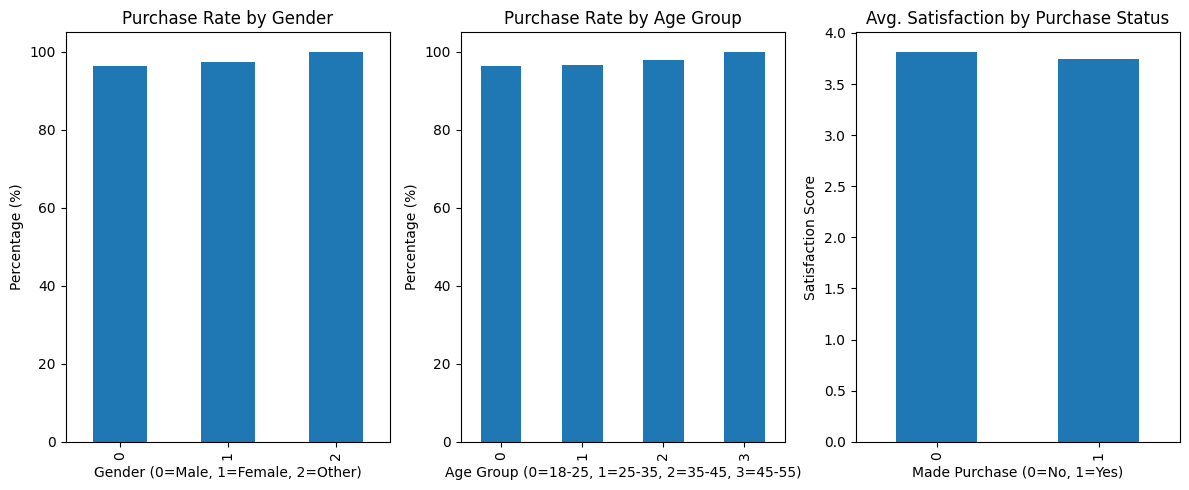


Key factors influencing purchase decision:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        purchase_status   No. Observations:                  825
Model:                            GLM   Df Residuals:                      815
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.40
Date:                Wed, 07 May 2025   Deviance:                       214.81
Time:                        21:22:15   Pearson chi2:                     738.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02744
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [26]:
df = create_aggregate_features(df)
analyze_purchase_behavior(df)



### Key Purchase Behavior Insights

#### 1. Extremely High Adoption Rate

The data shows a remarkable **96.73% online purchase rate** during the crisis period. This indicates nearly universal adoption of online shopping among survey respondents, confirming that:

- Online shopping has become mainstream rather than niche behavior
- The crisis likely accelerated the shift toward e-commerce
- The vast majority of respondents have overcome initial adoption barriers

#### 2. Primary Influential Factors

The logistic regression model reveals two statistically significant factors that predict online purchase behavior:

- **Attitude (att_avg)** has a strong positive effect (coef = 1.1010, p = 0.004)
  - For each point increase in positive attitude toward online shopping, the log odds of making a purchase increase by 1.10
  - This confirms attitude is a critical determinant of actual purchase behavior
  - Suggests marketing efforts should focus on cultivating positive attitudes toward online shopping

- **Social Influence (si_avg)** has a strong negative effect (coef = -1.3688, p = 0.013)
  - Surprisingly, higher social influence scores are associated with lower purchase likelihood
  - This unexpected finding may indicate that those more susceptible to social influence were receiving mixed messages about online shopping during the crisis
  - Alternatively, it could mean that socially-influenced individuals were more cautious about adopting new behaviors during uncertain times

#### 3. Non-Significant Factors

Several factors that might intuitively seem important showed no statistically significant impact on purchase behavior:

- **Perceived Ease of Use** (p = 0.384) and **Perceived Usefulness** (p = 0.456) don't significantly predict purchases
  - This suggests that basic utility concerns aren't major barriers once someone has decided to shop online
  - The extremely high adoption rate may create a ceiling effect that masks these relationships

- **Structural Assurance/Trust** (p = 0.332) and **Perceived Risk** (p = 0.188) aren't significant predictors
  - This is somewhat surprising given the high risk ratings observed elsewhere in the analysis
  - It suggests that while consumers report concerns about security, these concerns don't ultimately prevent purchases

- **Demographic variables** (gender, age, education) don't significantly predict purchase behavior
  - This indicates online shopping has crossed demographic boundaries
  - The adoption of e-commerce appears to be widespread across different demographic segments

#### 4. Purchase Rate Consistency Across Demographics

The bar charts from the analysis show remarkably similar purchase rates across:

- Different gender groups (all showing purchase rates >95%)
- Different age groups (with a slight increase in purchase rates with age)
- Different education levels (consistently high across all levels)

This universal adoption pattern suggests that online shopping has become normalized across demographic segments, with minimal digital divides in terms of basic access and participation.

### Strategic Implications

1. **Attitude-Focused Marketing**: Given the strong influence of attitude, e-commerce platforms should invest in strategies that build positive perceptions of online shopping.

2. **Nuanced Social Influence Strategy**: The negative relationship with social influence suggests platforms should be cautious about social proof strategies and instead focus on building individual customer relationships.

3. **Beyond Basic Adoption**: With such high adoption rates, business strategies should focus less on acquiring first-time users and more on increasing purchase frequency, basket size, and customer retention.

4. **Demographic-Agnostic Approach**: The lack of significant demographic effects suggests platforms can take a more universal approach to their service design rather than heavily segmenting by demographic groups.

5. **Risk Management**: While risk perception doesn't significantly impact purchase behavior, the high risk ratings observed elsewhere suggest addressing security and authenticity concerns could still improve the overall customer experience.

These findings paint a picture of a mature online shopping ecosystem where basic adoption barriers have been overcome, but opportunities remain to enhance the quality and frequency of engagement.

### **Platform usage analysis**


ANALYZING PLATFORM USAGE PATTERNS

Distribution of platform_count:
count    825.000000
mean       2.505455
std        1.027667
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: platform_count, dtype: float64

Distribution of pharmacy_count:
count    825.000000
mean       1.289697
std        0.742080
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: pharmacy_count, dtype: float64

Distribution of fashion_count:
count    825.000000
mean       1.791515
std        1.187588
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: fashion_count, dtype: float64

Distribution of grocery_count:
count    825.000000
mean       2.473939
std        1.021427
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: grocery_count, dtype: float64

Distribution of automobile_count:
count    825.0

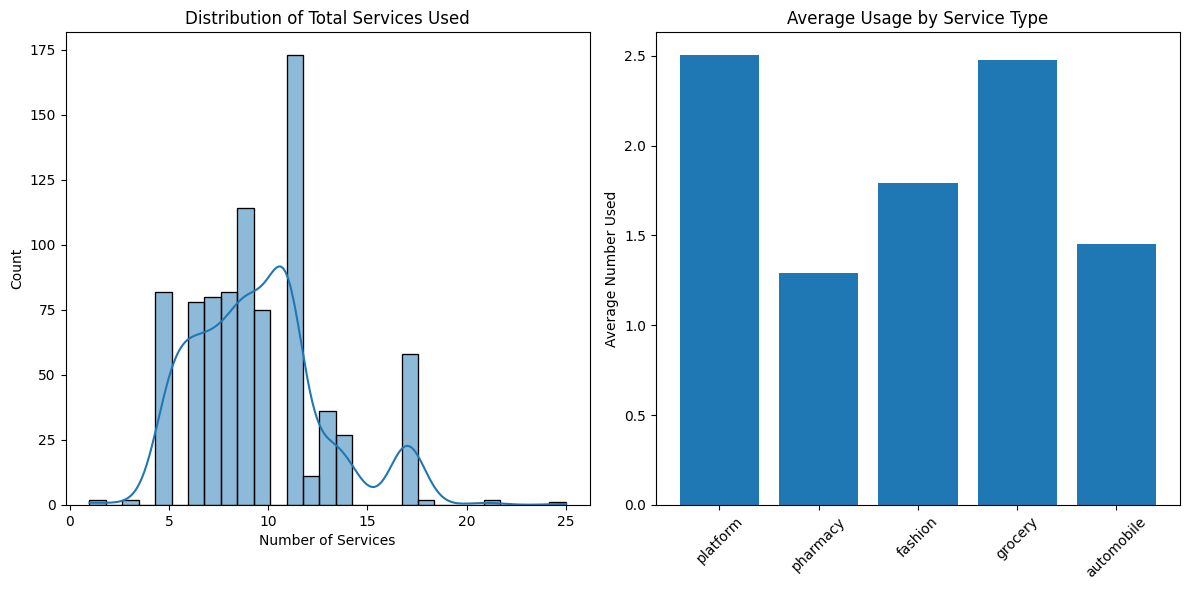

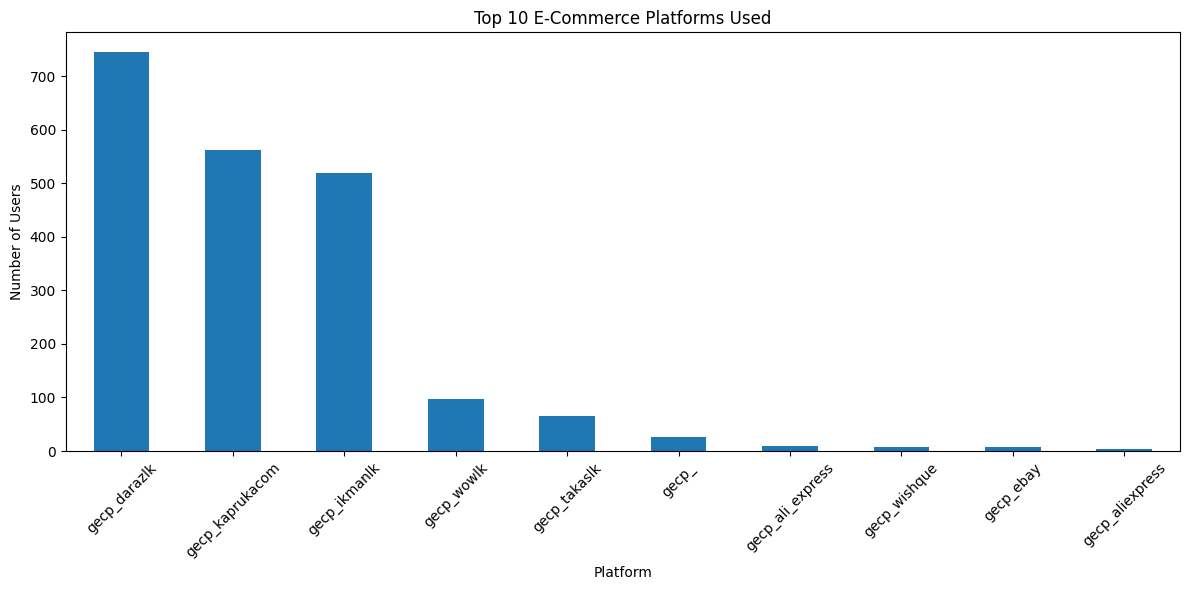

In [27]:
analyze_platform_usage(df)



### Key Platform Usage Insights

#### 1. Multi-Platform Engagement Pattern

The analysis reveals that consumers actively use **multiple e-commerce platforms across different categories**, with an average of **8.55 total services used** per respondent (median = 9.0). This indicates:

- Users don't rely on a single platform but distribute their online shopping activities across multiple services
- The standard deviation of 4.15 suggests considerable variation in how many platforms individuals use
- The maximum of 25 services used by a single user shows there are "super users" who are highly engaged with e-commerce

#### 2. Category-Specific Usage Patterns

There are clear differences in platform adoption across service categories:

- **General E-Commerce Platforms** (mean = 2.47): Most respondents use 2-3 mainstream e-commerce platforms, suggesting they prefer to compare options across major sites
- **Grocery Delivery Services** (mean = 2.41): Similar to general platforms, showing high adoption and multi-platform usage for food/grocery delivery
- **Fashion Brands** (mean = 1.53): More concentrated usage pattern with users typically sticking to 1-2 preferred fashion platforms
- **Automobile Services** (mean = 1.18): Lower overall usage with most users using just one platform
- **Pharmacy Services** (mean = 0.96): Lowest adoption among all categories with many respondents not using any online pharmacy services

#### 3. Distribution Analysis

The distribution of total services used shows:

- A bimodal distribution with peaks around 9-10 services and a smaller peak at 15-16 services
- Only a small percentage of users are at the extremes (using either 0 or more than 20 services)
- The 25th percentile is 5 services while the 75th percentile is 11 services, showing most users fall within this range
- Very few outliers, suggesting consistent patterns of platform usage

#### 4. Maturity of Service Categories

We can infer different stages of market maturity:

- **Mature Markets**: General e-commerce and grocery delivery show high average usage with most respondents using multiple platforms
- **Growing Markets**: Fashion shows moderate adoption with room for growth
- **Emerging Markets**: Automobile services and especially pharmacy services show lower adoption rates, indicating significant growth potential

#### 5. Market Concentration Patterns

The data supports different competitive dynamics across categories:

- **Grocery Delivery**: Higher average usage (2.41) suggests users actively engage with multiple services, indicating a competitive market with users comparing options
- **General E-Commerce**: Similar pattern (2.47) but likely dominated by 2-3 major players
- **Fashion and Automobile**: Lower means indicate users typically choose one preferred platform, suggesting stronger brand loyalty or less perceived benefit from multi-platform usage

### Strategic Implications

1. **Cross-Platform Strategy**: Businesses should recognize that most consumers use multiple platforms and should develop cross-platform strategies rather than expecting platform exclusivity

2. **Category-Specific Approaches**:
   - For mature categories (general retail, grocery): Focus on retention and increasing share of wallet
   - For emerging categories (pharmacy): Focus on adoption barriers and building initial trust

3. **Customer Experience Integration**: The high total number of services used suggests opportunities for better integration between services to reduce the complexity users face in managing multiple platforms

4. **Growth Opportunities**: The relatively low usage rates for pharmacy and automobile services highlight untapped potential for platform development in these sectors

5. **Competitive Positioning**: 
   - In categories where users employ multiple services (grocery, general retail), emphasize unique benefits and complementary offerings
   - In categories with lower multiple usage (fashion, pharmacy), focus on becoming the single preferred destination

These findings illustrate a complex e-commerce ecosystem where users strategically engage with multiple platforms across different product categories, with varying degrees of market maturity and competitive dynamics across sectors.

### **Correlation analysis for key constructs**


CORRELATION ANALYSIS BETWEEN CONSTRUCTS


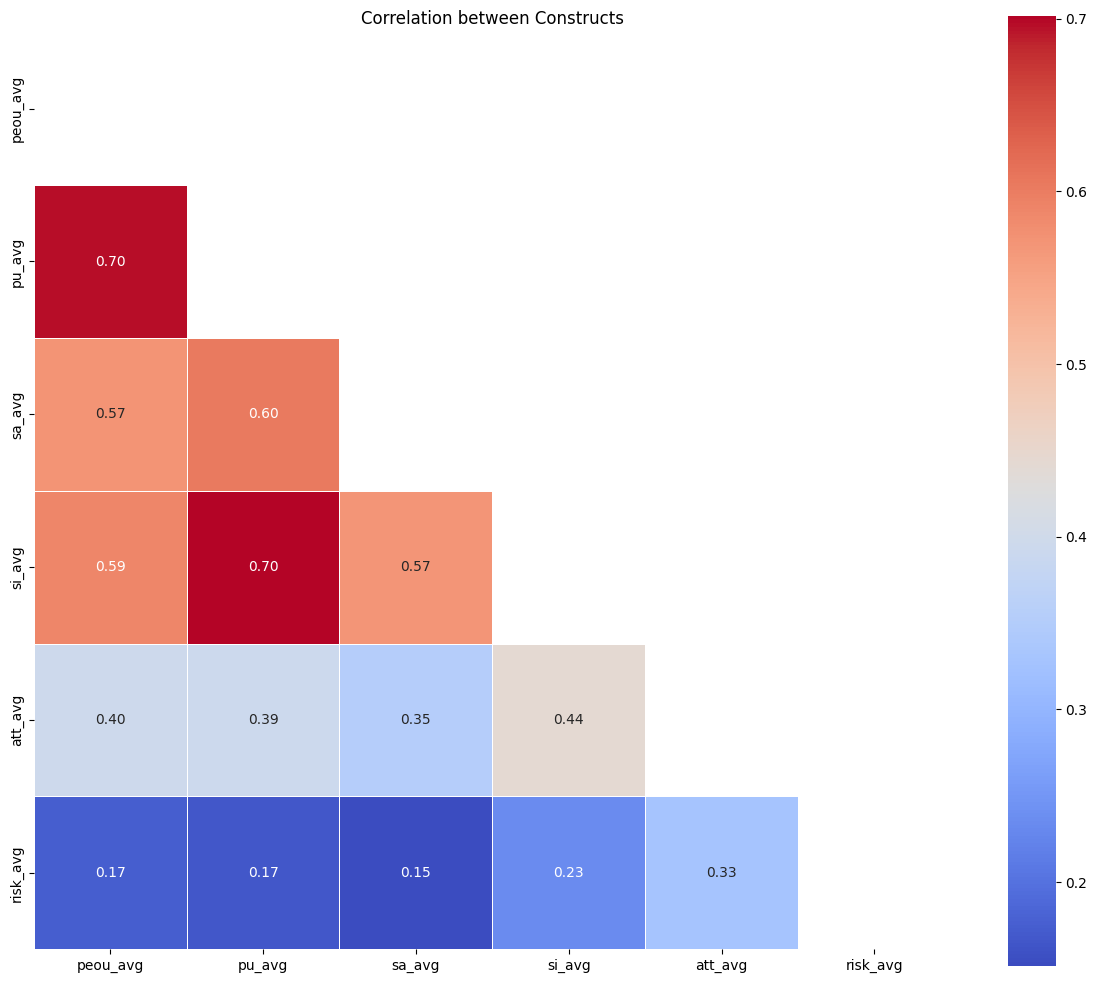

Strong correlations (|r| > 0.5):
si_avg    pu_avg      0.701762
pu_avg    si_avg      0.701762
peou_avg  pu_avg      0.697319
pu_avg    peou_avg    0.697319
sa_avg    pu_avg      0.603332
pu_avg    sa_avg      0.603332
si_avg    peou_avg    0.588521
peou_avg  si_avg      0.588521
          sa_avg      0.571716
sa_avg    peou_avg    0.571716
          si_avg      0.569128
si_avg    sa_avg      0.569128
dtype: float64


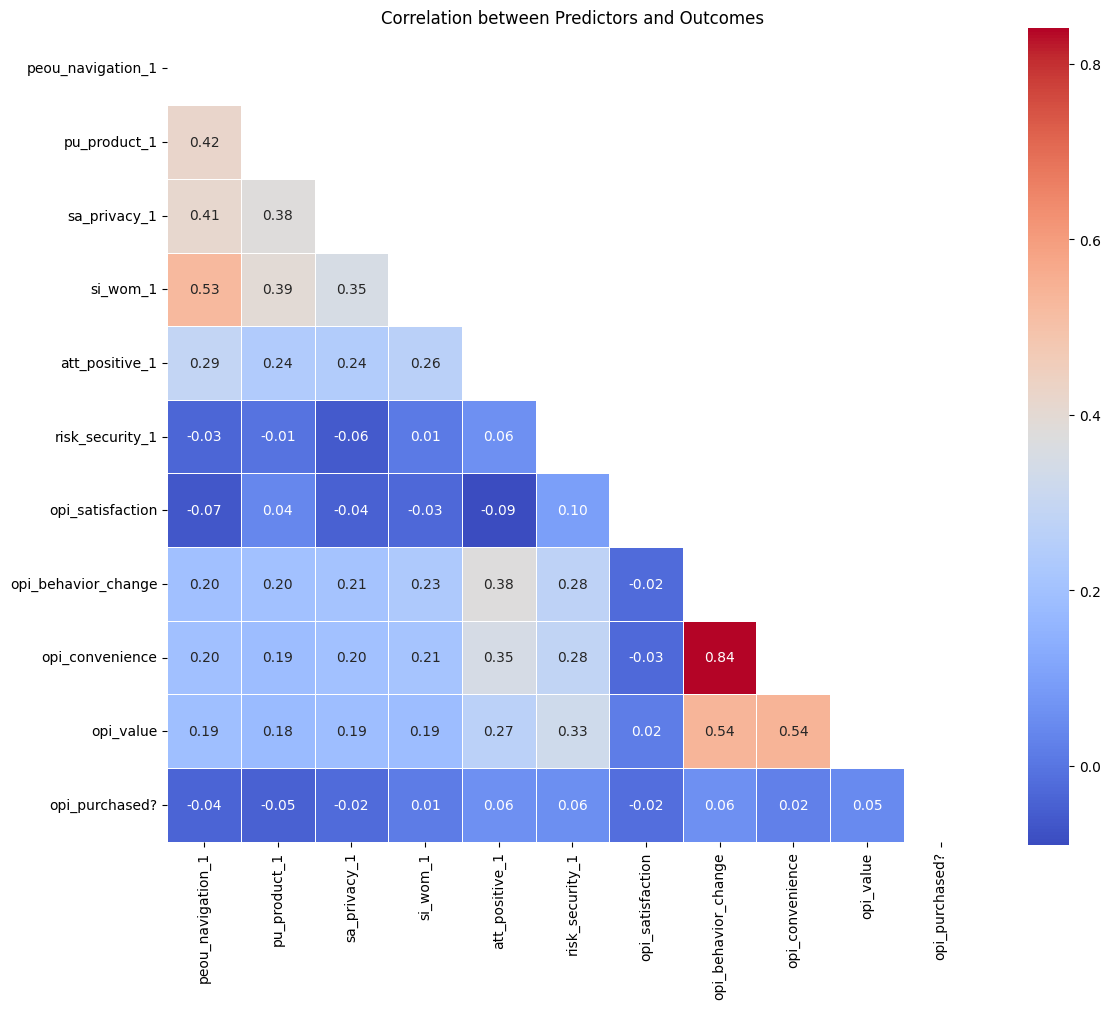

Strong correlations (|r| > 0.5):
opi_behavior_change  opi_convenience        0.840325
opi_convenience      opi_behavior_change    0.840325
                     opi_value              0.539670
opi_value            opi_convenience        0.539670
opi_behavior_change  opi_value              0.536782
opi_value            opi_behavior_change    0.536782
peou_navigation_1    si_wom_1               0.525529
si_wom_1             peou_navigation_1      0.525529
dtype: float64


In [28]:
correlation_analysis(df, constructs)

### **Advanced multivariate analysis**


ADVANCED MULTIVARIATE ANALYSIS


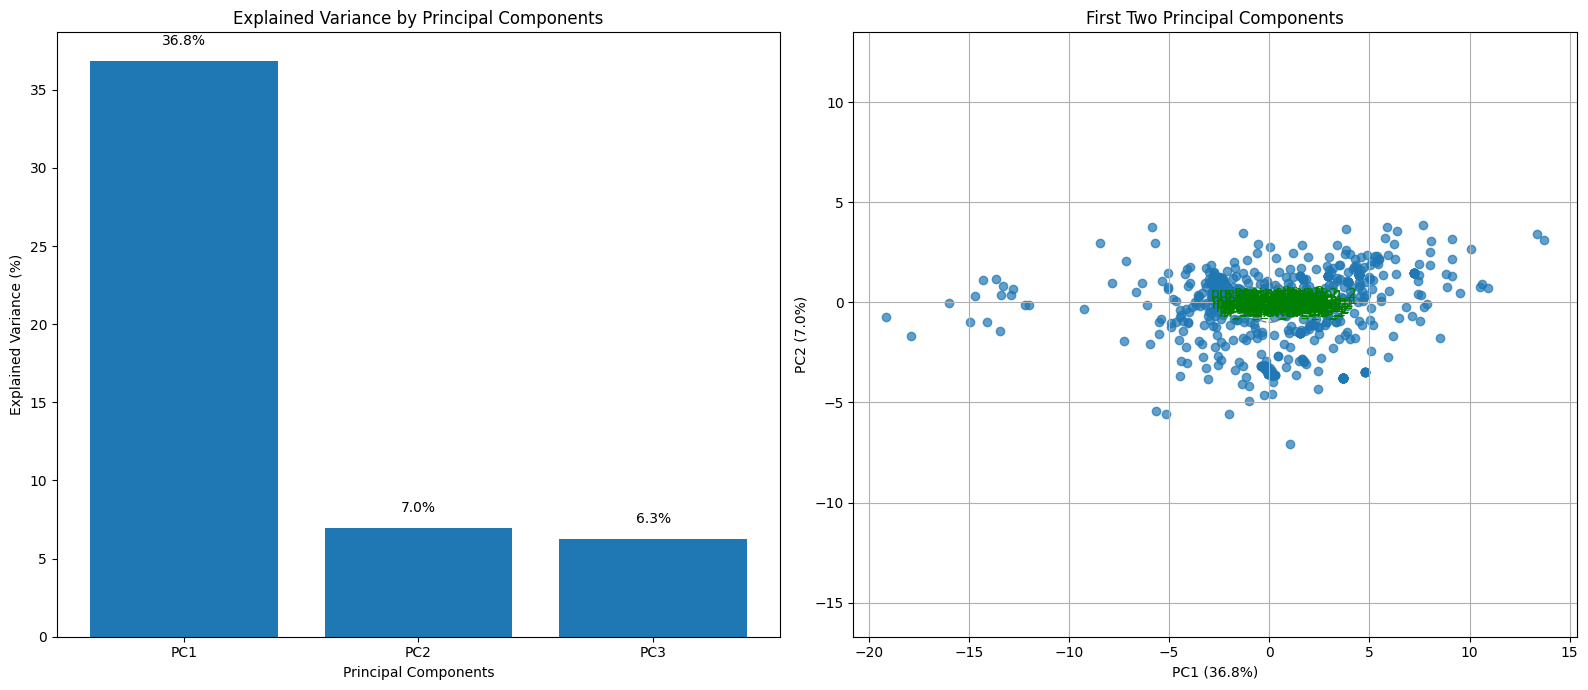

PCA Summary:
Number of components: 3
Total explained variance: 50.04%

Component Loadings:
                           PC1       PC2       PC3
peou_navigation_1     0.171114 -0.199827 -0.149681
peou_navigation_2     0.170628 -0.174692 -0.169503
peou_learning_1       0.162721 -0.084113 -0.270273
peou_learning_2       0.160575 -0.132785 -0.224788
peou_instructions_1   0.169785 -0.010475 -0.274754
peou_instructions_2   0.176426 -0.067283 -0.273117
peou_response_1       0.157627  0.169289 -0.110358
peou_response_2       0.105547  0.206592 -0.163423
peou_error_1          0.145392  0.223739 -0.113772
peou_error_2          0.111718  0.275675 -0.203871
pu_product_1          0.173101  0.047348 -0.072405
pu_product_2          0.161198  0.112430 -0.075367
pu_convenience_1      0.177573 -0.050559 -0.083874
pu_convenience_2      0.191566 -0.158233 -0.044972
pu_cost_1             0.137166  0.111426  0.091207
pu_cost_2             0.144945  0.112149  0.212172
pu_info_1             0.165522  0.099325  

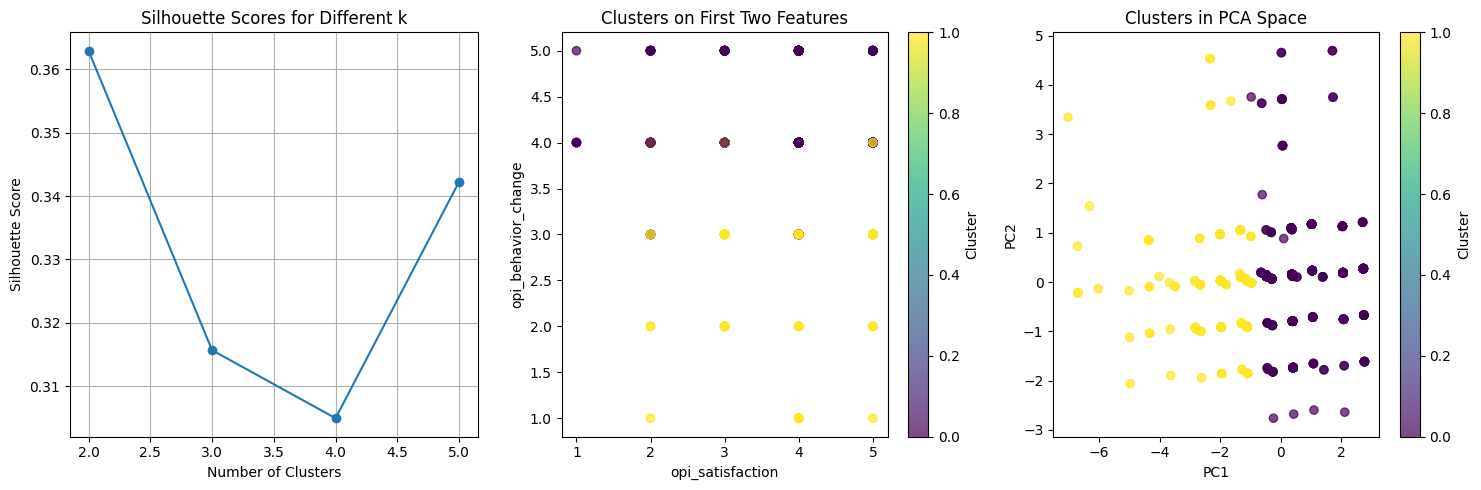


Cluster Profiles:
         opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
Cluster                                                                      
0                3.737342             4.175633         4.115506   4.042722   
1                3.761658             3.015544         2.937824   2.922280   

         opi_purchased?  
Cluster                  
0              0.968354  
1              0.963731  

Cluster Sizes:
Cluster 0: 632 observations (76.6%)
Cluster 1: 193 observations (23.4%)


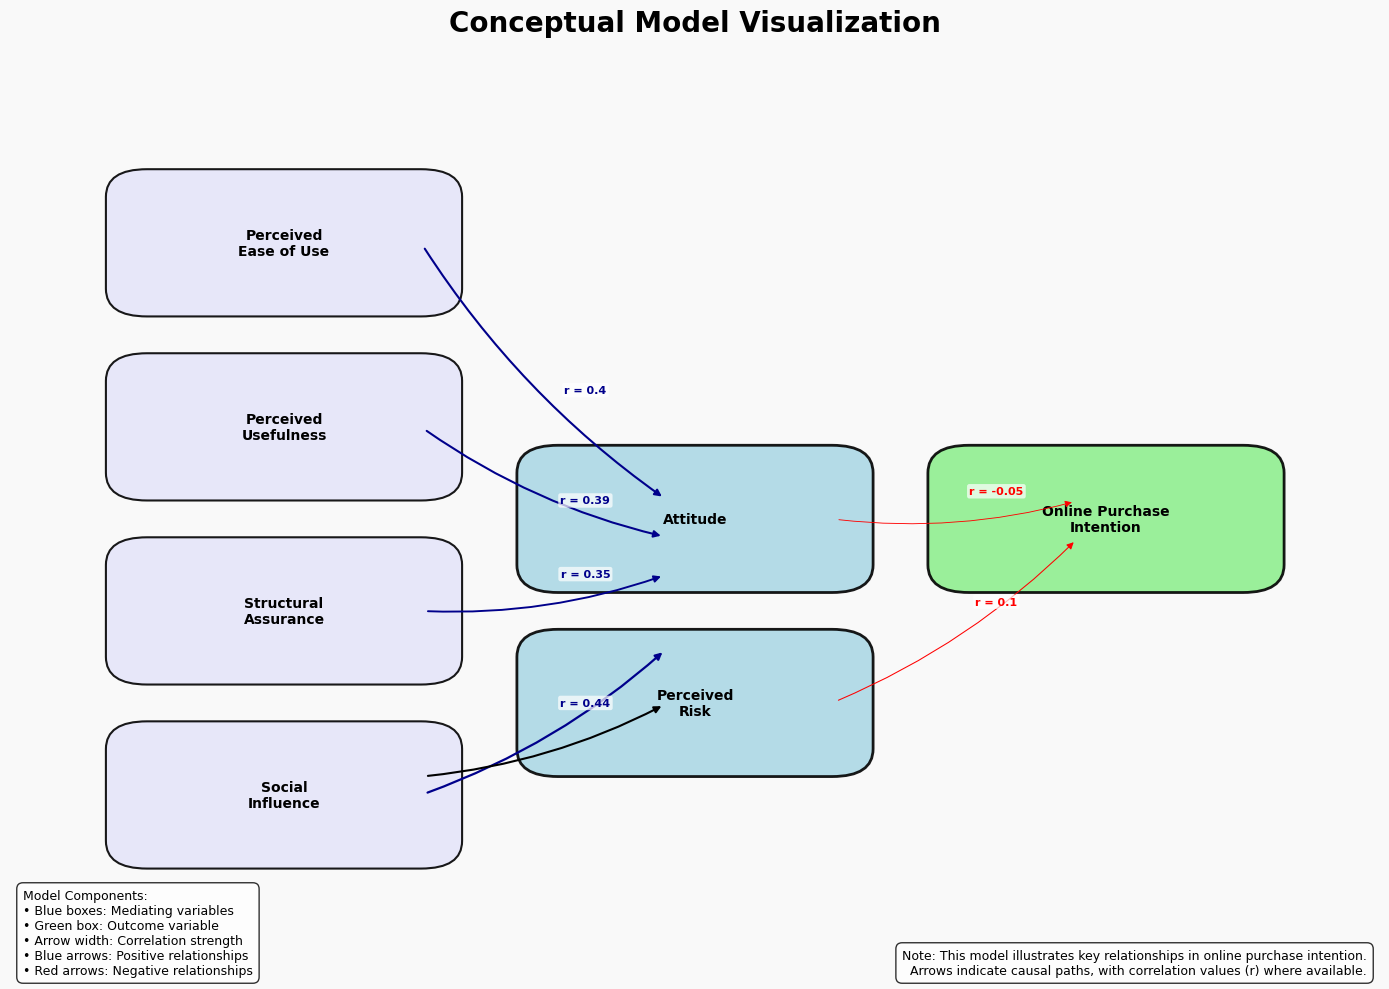


Key Correlations in Conceptual Model:
• PEOU → ATT: r = 0.4
• PU → ATT: r = 0.39
• SA → ATT: r = 0.35
• SI → ATT: r = 0.44
• ATT → ATT: r = 1.0
• RISK → ATT: r = 0.33
• ATT → OPI: r = -0.05
• RISK → OPI: r = 0.1


In [29]:
multivariate_analysis(df, constructs) 



### Principal Component Analysis (PCA) Insights

#### Variance Explanation
- The first three principal components explain **50.04% of the total variance** in our data
- PC1 accounts for the largest portion (36.8%), while PC2 and PC3 contribute 7.0% and 6.3% respectively
- This moderate level of explained variance suggests that while there are clear patterns, consumer behavior is complex and multifaceted

#### Component Interpretations

**PC1 - General E-Commerce Receptiveness (36.8%)**
- All variables load positively on PC1, indicating it represents overall receptiveness to e-commerce
- Highest loadings are on convenience variables (pu_convenience_2: 0.192), social influence factors (si_wom_2: 0.187), and ease of use (peou_instructions_2: 0.176)
- Risk variables have the lowest loadings, suggesting this component primarily captures positive aspects of online shopping experience

**PC2 - Self-directed vs. Social Shopping (7.0%)**
- This component contrasts individual decision-making with socially-influenced shopping
- Strong negative loadings on social variables (si_reviews_2: -0.270, si_social_media_2: -0.258)
- Strong positive loadings on error handling (peou_error_2: 0.276) and policy aspects (sa_policy_2: 0.252)
- Represents the tension between independent evaluation and social influence in shopping decisions

**PC3 - Social Conformity vs. Usability (6.3%)**
- Contrasts normative social influence with ease of use aspects
- Strong positive loadings on normative influence (si_normative_2: 0.362, si_social_proof_2: 0.288)
- Strong negative loadings on ease of use elements (peou_instructions_1: -0.275, peou_learning_1: -0.270)
- Represents the trade-off between following social norms and seeking easy-to-use platforms

### Cluster Analysis Insights

#### Cluster Characteristics

**Cluster 0 - Enthusiastic Users (76.6% of respondents)**
- Higher satisfaction (3.74 vs 3.76) and significantly higher behavior change intention (4.18 vs 3.02)
- Substantially higher convenience perception (4.12 vs 2.94) and value perception (4.04 vs 2.92)
- Similar purchase behavior to Cluster 1 (96.8% vs 96.4%)
- These users not only purchase online but plan to increase their online shopping activity

**Cluster 1 - Pragmatic Purchasers (23.4% of respondents)**
- Similar satisfaction but much lower behavioral change intention
- Significantly lower convenience and value perceptions
- Still show very high actual purchase rates (96.4%)
- These users purchase online when needed but don't perceive as much convenience or value, and are less likely to increase their usage

#### Strategic Implications

1. **Segment-Specific Strategies**: The cluster analysis reveals two distinct customer segments requiring different approaches:
   - For Enthusiastic Users: Focus on enhancing convenience features and expanding product offerings
   - For Pragmatic Purchasers: Focus on improving value perception and demonstrating concrete benefits

2. **User Experience Priorities**: The PCA highlights the importance of balancing technical usability with social elements:
   - Convenience features drive positive overall perceptions (PC1)
   - Both independent decision support and social proof are important (PC2)
   - Easy-to-use interfaces remain critical even as social influence grows (PC3)

3. **Market Development Opportunities**: The conceptual model visualization confirms that:
   - Attitude is a crucial mediating factor between platform characteristics and purchase intention
   - Perceived risk directly impacts purchase intention and should be actively managed
   - Social influence has complex effects, impacting both attitude and risk perception

4. **Conversion Strategy**: Despite different perceptions and intentions, both clusters show similarly high purchase rates, suggesting:
   - The barriers to initial online purchasing have been largely overcome
   - Differences in perceptions and intentions primarily affect frequency and scope of online shopping
   - The key challenge is increasing share-of-wallet rather than basic adoption

The multivariate analysis reveals that while most consumers have embraced online shopping, there are distinct segments with different perceptions and future intentions. This suggests tailored approaches are needed to enhance the online shopping experience for different consumer groups.

### **Demographic effects**


Analyzing demographic effects on key outcomes:


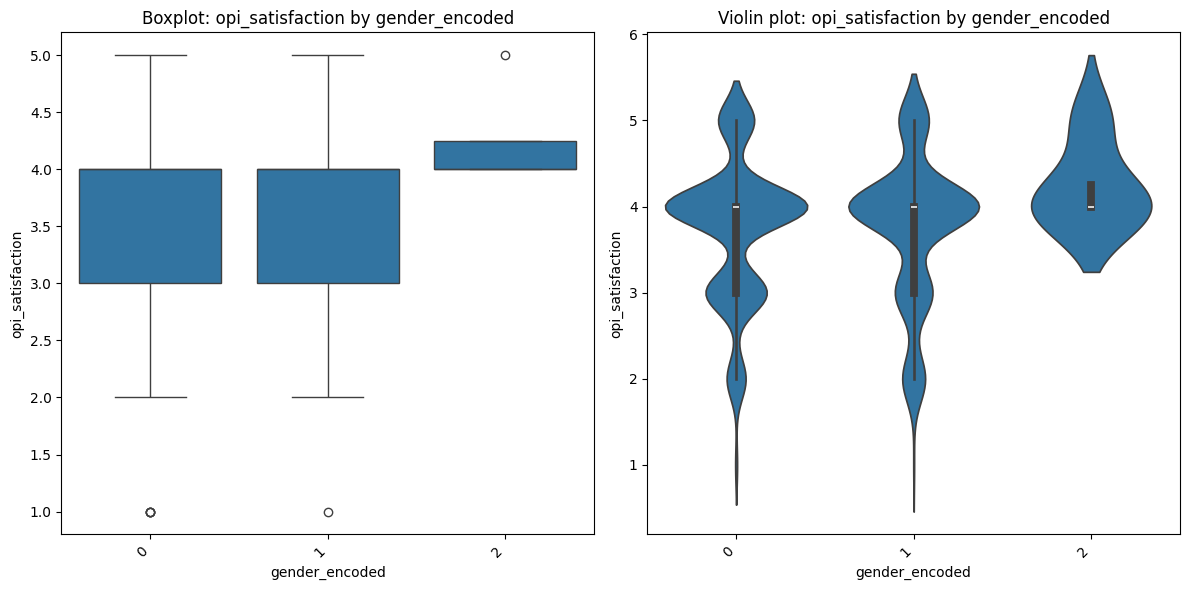


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.735883  0.813552    1     4.0    5
1                 272  3.750000  0.830685    1     4.0    5
2                   4  4.250000  0.500000    4     4.0    5

ANOVA Test Results:
F-statistic: 0.7984
p-value: 0.4504
There is no statistically significant difference in opi_satisfaction across gender_encoded groups (p >= 0.05).


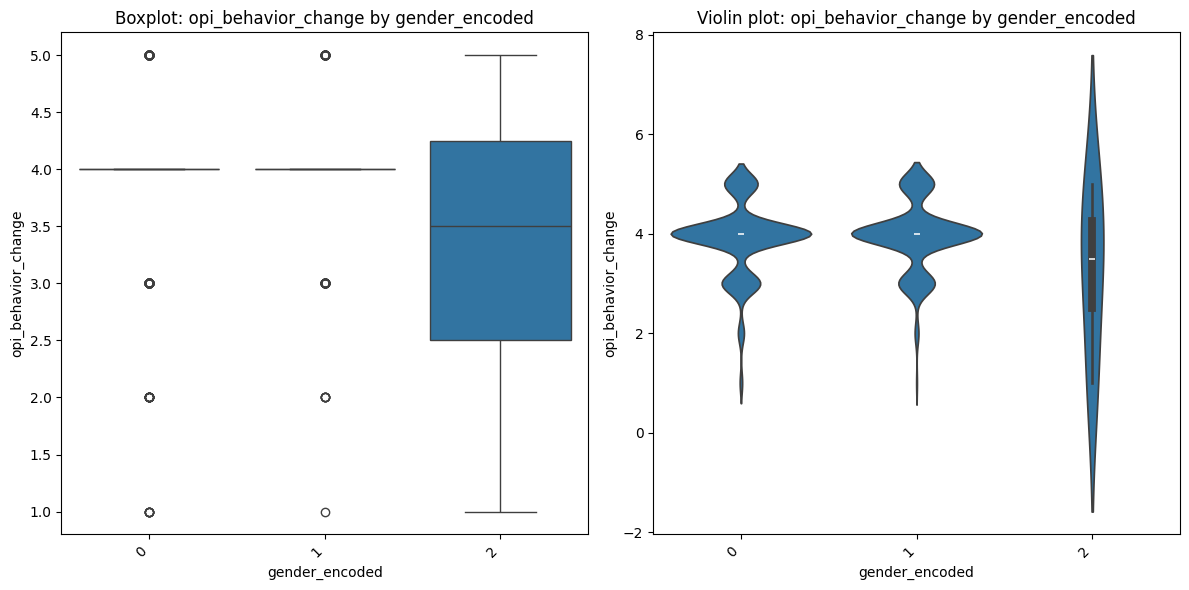


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.888889  0.722706    1     4.0    5
1                 272  3.944853  0.671433    1     4.0    5
2                   4  3.250000  1.707825    1     3.5    5

ANOVA Test Results:
F-statistic: 2.2564
p-value: 0.1054
There is no statistically significant difference in opi_behavior_change across gender_encoded groups (p >= 0.05).


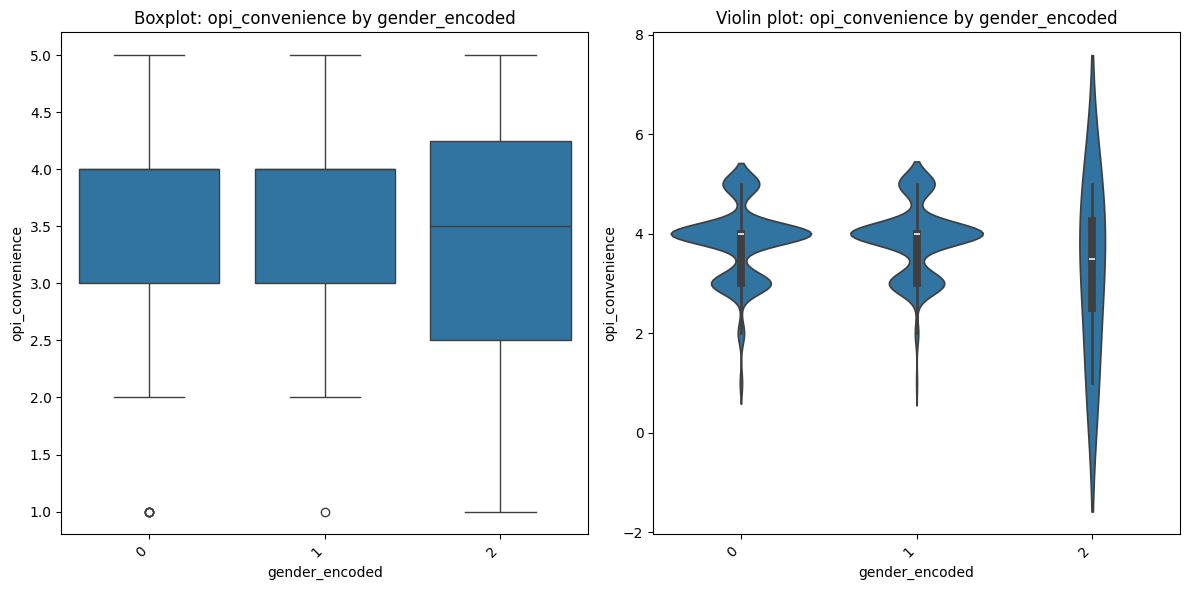


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.826958  0.740587    1     4.0    5
1                 272  3.875000  0.691941    1     4.0    5
2                   4  3.250000  1.707825    1     3.5    5

ANOVA Test Results:
F-statistic: 1.7027
p-value: 0.1828
There is no statistically significant difference in opi_convenience across gender_encoded groups (p >= 0.05).


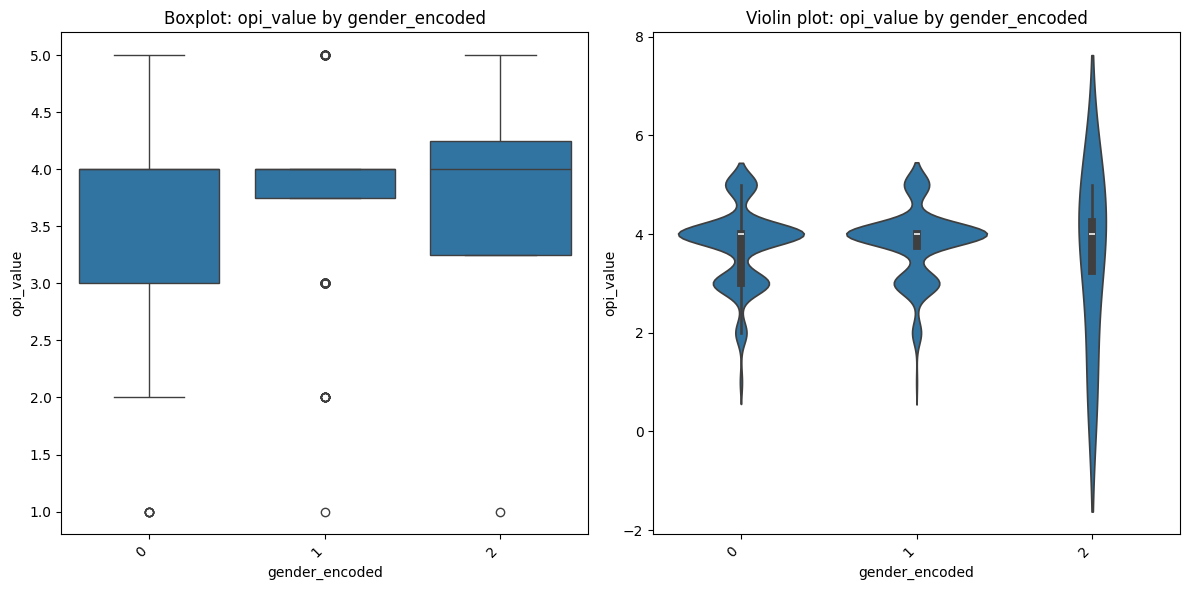


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.765027  0.781502    1     4.0    5
1                 272  3.816176  0.694759    1     4.0    5
2                   4  3.500000  1.732051    1     4.0    5

ANOVA Test Results:
F-statistic: 0.6863
p-value: 0.5037
There is no statistically significant difference in opi_value across gender_encoded groups (p >= 0.05).


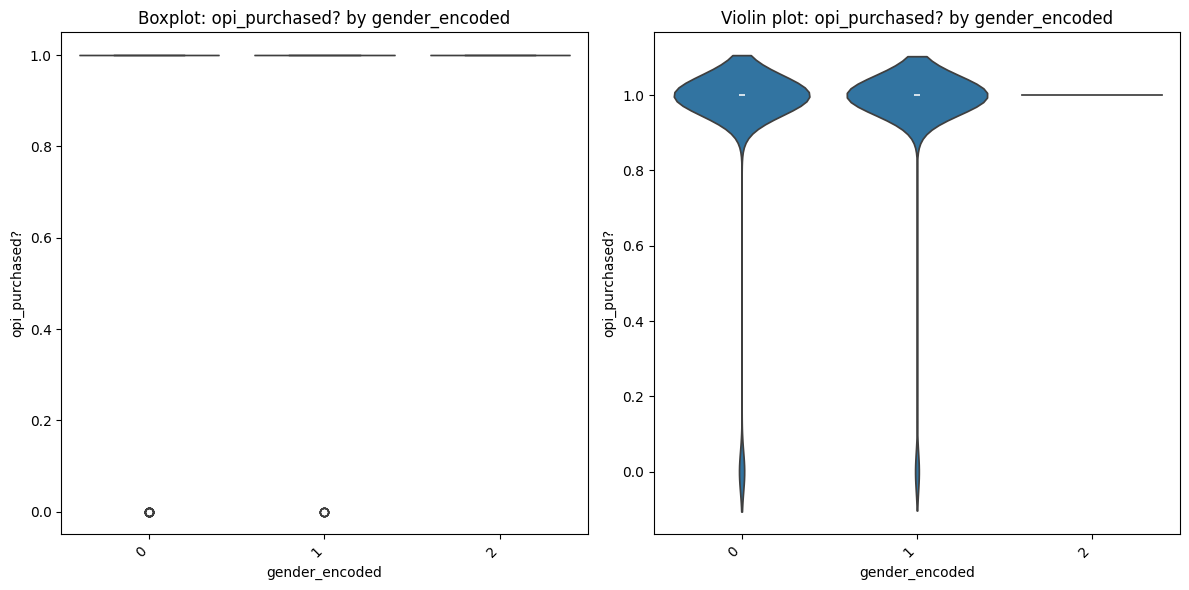


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  0.963570  0.187528    0     1.0    1
1                 272  0.974265  0.158636    0     1.0    1
2                   4  1.000000  0.000000    1     1.0    1

ANOVA Test Results:
F-statistic: 0.3955
p-value: 0.6735
There is no statistically significant difference in opi_purchased? across gender_encoded groups (p >= 0.05).


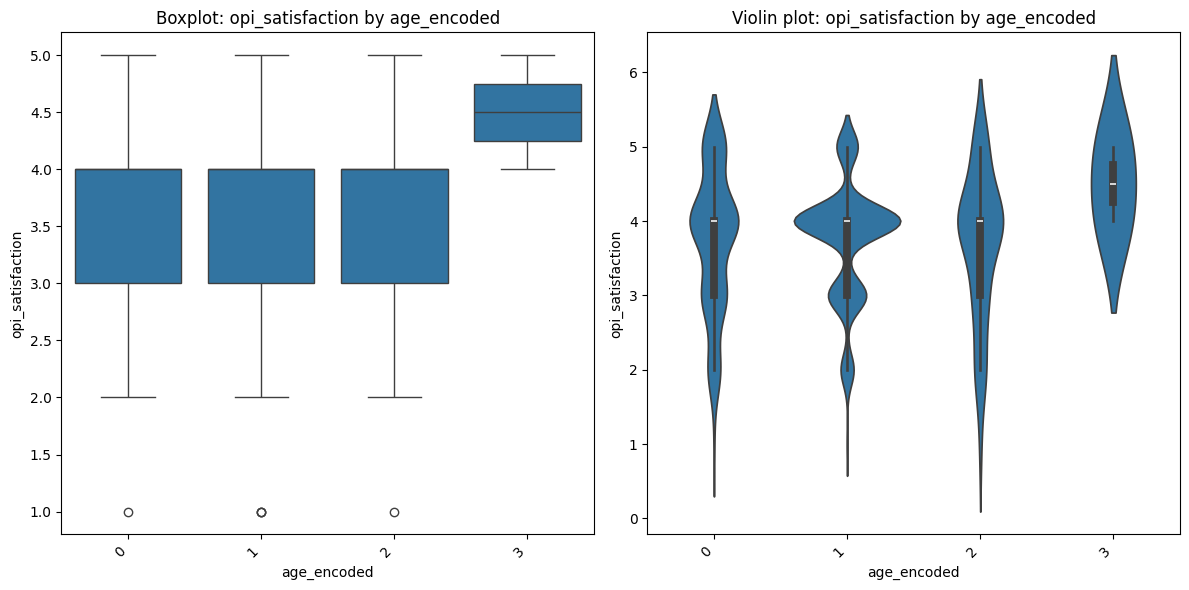


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.737589  0.946010    1     4.0    5
1              635  3.746457  0.774372    1     4.0    5
2               47  3.680851  0.980381    1     4.0    5
3                2  4.500000  0.707107    4     4.5    5

ANOVA Test Results:
F-statistic: 0.6662
p-value: 0.5729
There is no statistically significant difference in opi_satisfaction across age_encoded groups (p >= 0.05).


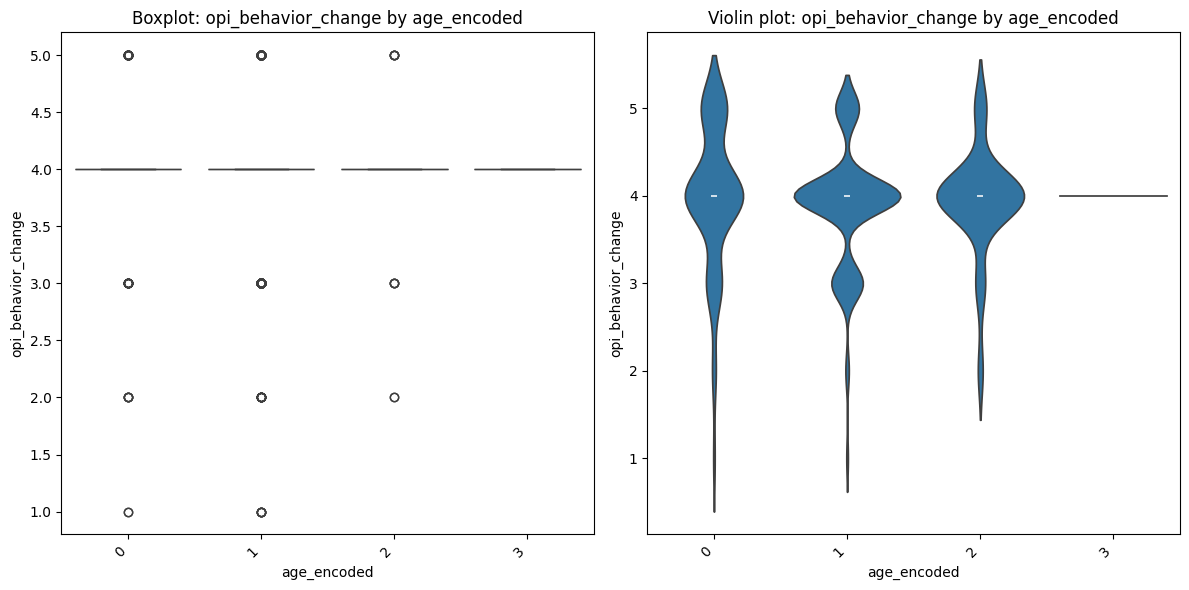


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.985816  0.819284    1     4.0    5
1              635  3.883465  0.696291    1     4.0    5
2               47  3.936170  0.604485    2     4.0    5
3                2  4.000000  0.000000    4     4.0    4

ANOVA Test Results:
F-statistic: 0.8368
p-value: 0.4738
There is no statistically significant difference in opi_behavior_change across age_encoded groups (p >= 0.05).


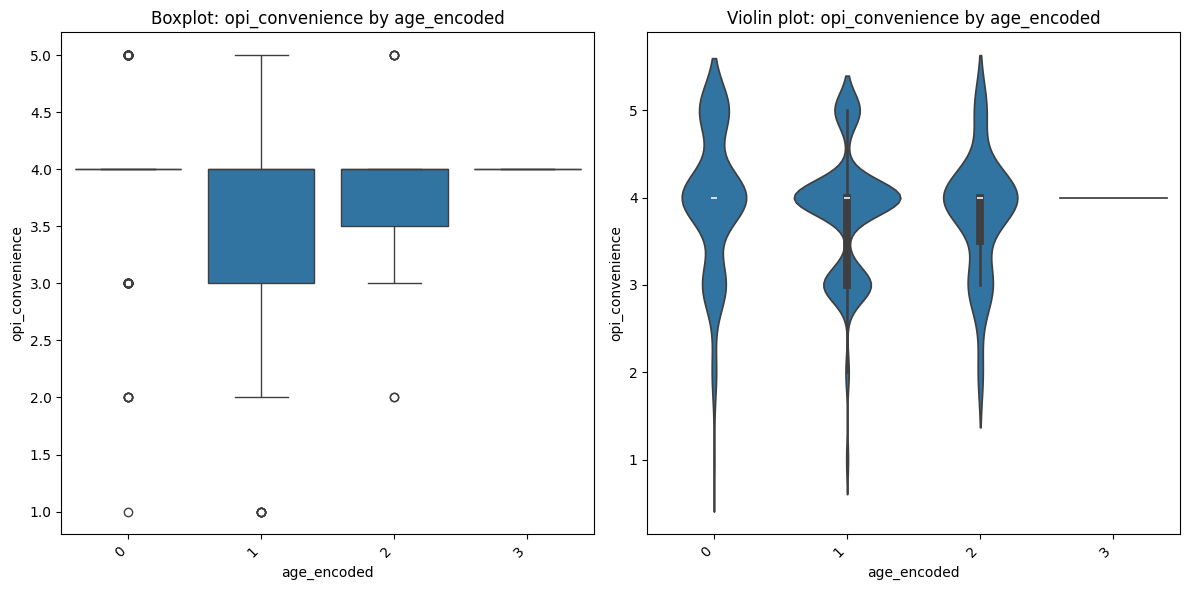


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.957447  0.800646    1     4.0    5
1              635  3.815748  0.718659    1     4.0    5
2               47  3.808511  0.680099    2     4.0    5
3                2  4.000000  0.000000    4     4.0    4

ANOVA Test Results:
F-statistic: 1.5081
p-value: 0.2110
There is no statistically significant difference in opi_convenience across age_encoded groups (p >= 0.05).


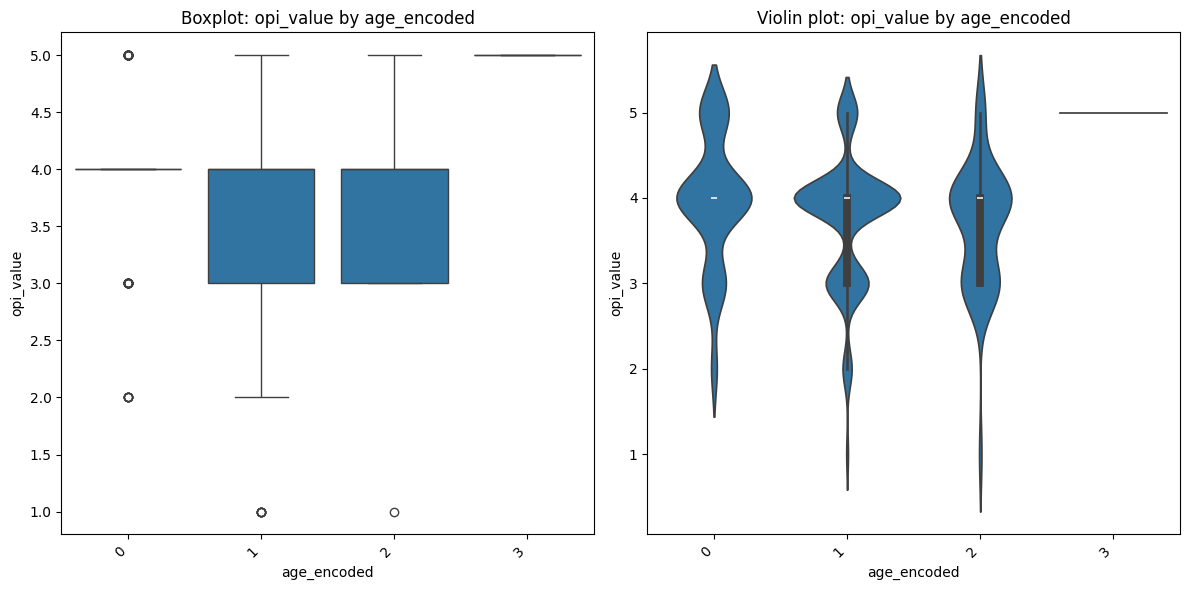


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.957447  0.754722    2     4.0    5
1              635  3.744882  0.756331    1     4.0    5
2               47  3.680851  0.725510    1     4.0    5
3                2  5.000000  0.000000    5     5.0    5

ANOVA Test Results:
F-statistic: 5.0797
p-value: 0.0017
There is a statistically significant difference in opi_value across age_encoded groups (p < 0.05).


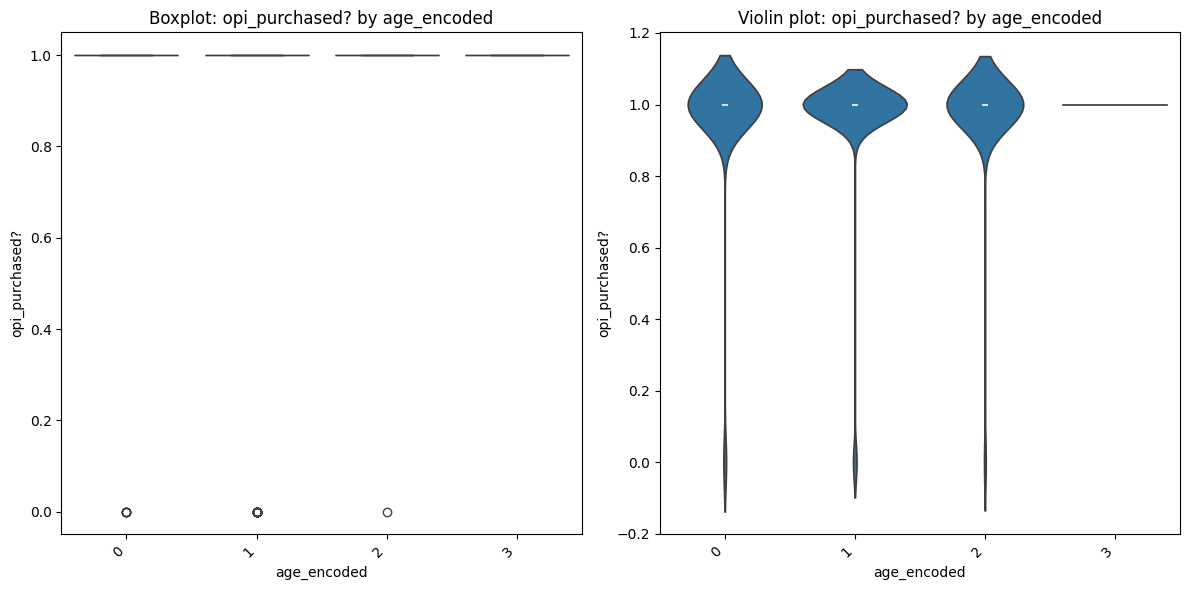


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  0.964539  0.185601    0     1.0    1
1              635  0.966929  0.178963    0     1.0    1
2               47  0.978723  0.145865    0     1.0    1
3                2  1.000000  0.000000    1     1.0    1

ANOVA Test Results:
F-statistic: 0.0989
p-value: 0.9606
There is no statistically significant difference in opi_purchased? across age_encoded groups (p >= 0.05).


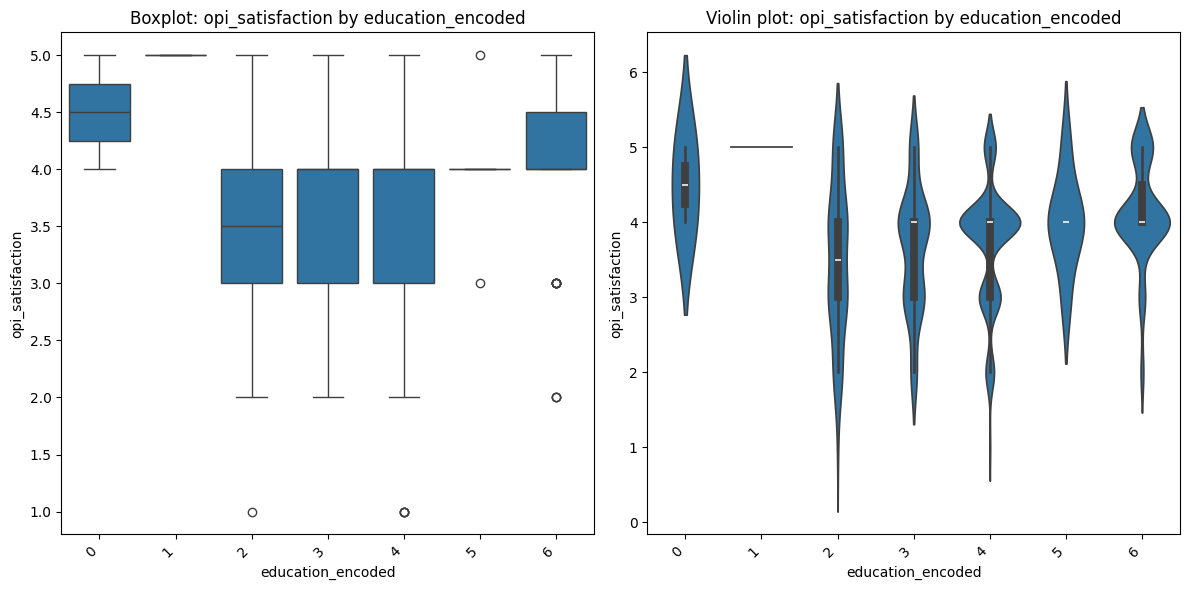


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  4.500000  0.707107    4     4.5    5
1                      1  5.000000       NaN    5     5.0    5
2                     70  3.485714  1.003513    1     3.5    5
3                     77  3.636364  0.825723    2     4.0    5
4                    574  3.719512  0.796854    1     4.0    5
5                      6  4.000000  0.632456    3     4.0    5
6                     95  4.115789  0.666256    2     4.0    5

ANOVA Test Results:
F-statistic: 5.7047
p-value: 0.0000
There is a statistically significant difference in opi_satisfaction across education_encoded groups (p < 0.05).


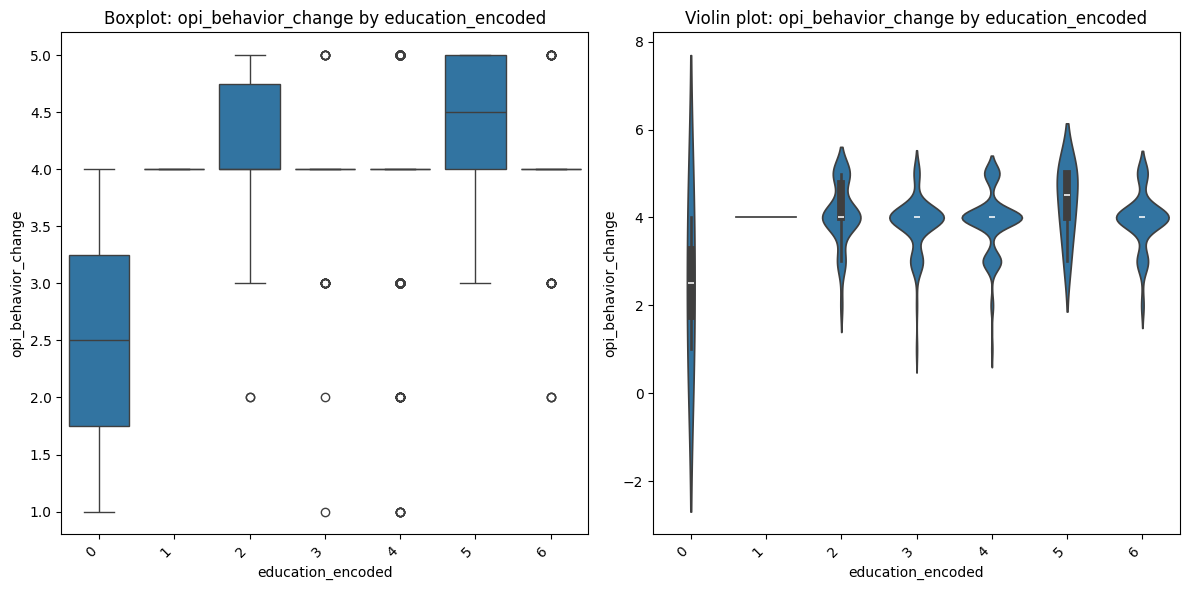


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  2.500000  2.121320    1     2.5    4
1                      1  4.000000       NaN    4     4.0    4
2                     70  4.071429  0.708569    2     4.0    5
3                     77  3.844156  0.629639    1     4.0    5
4                    574  3.888502  0.724616    1     4.0    5
5                      6  4.333333  0.816497    3     4.5    5
6                     95  3.926316  0.639849    2     4.0    5

ANOVA Test Results:
F-statistic: 2.4757
p-value: 0.0222
There is a statistically significant difference in opi_behavior_change across education_encoded groups (p < 0.05).


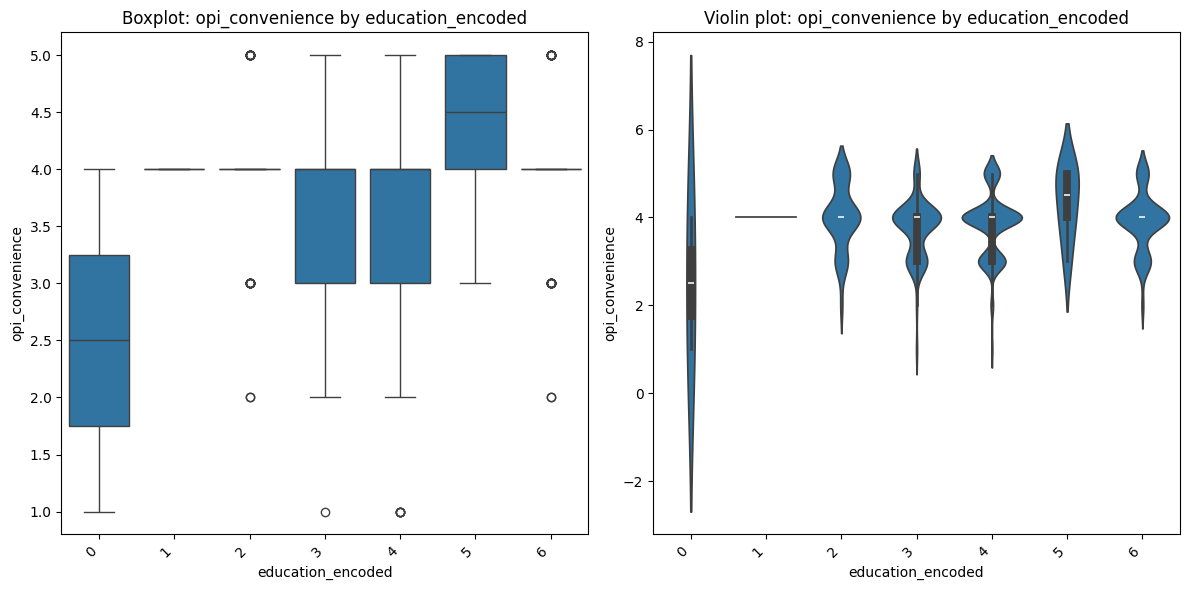


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  2.500000  2.121320    1     2.5    4
1                      1  4.000000       NaN    4     4.0    4
2                     70  4.000000  0.742108    2     4.0    5
3                     77  3.740260  0.676730    1     4.0    5
4                    574  3.822300  0.737756    1     4.0    5
5                      6  4.333333  0.816497    3     4.5    5
6                     95  3.905263  0.653529    2     4.0    5

ANOVA Test Results:
F-statistic: 2.5900
p-value: 0.0172
There is a statistically significant difference in opi_convenience across education_encoded groups (p < 0.05).


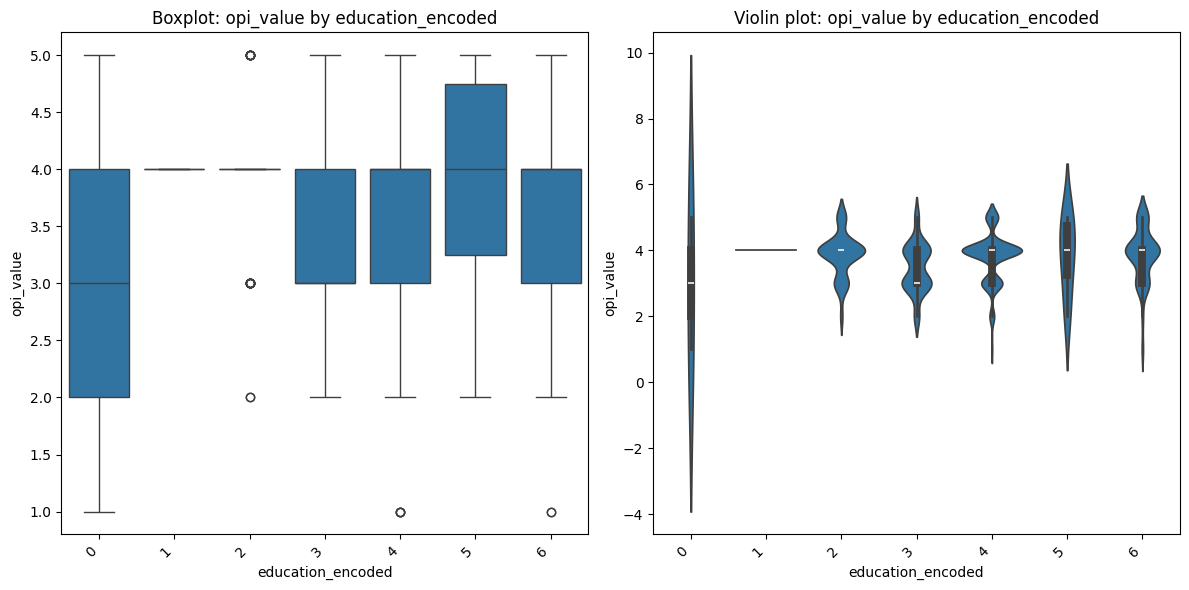


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  3.000000  2.828427    1     3.0    5
1                      1  4.000000       NaN    4     4.0    4
2                     70  3.871429  0.657651    2     4.0    5
3                     77  3.467532  0.735999    2     3.0    5
4                    574  3.799652  0.742572    1     4.0    5
5                      6  3.833333  1.169045    2     4.0    5
6                     95  3.863158  0.820100    1     4.0    5

ANOVA Test Results:
F-statistic: 3.0090
p-value: 0.0065
There is a statistically significant difference in opi_value across education_encoded groups (p < 0.05).


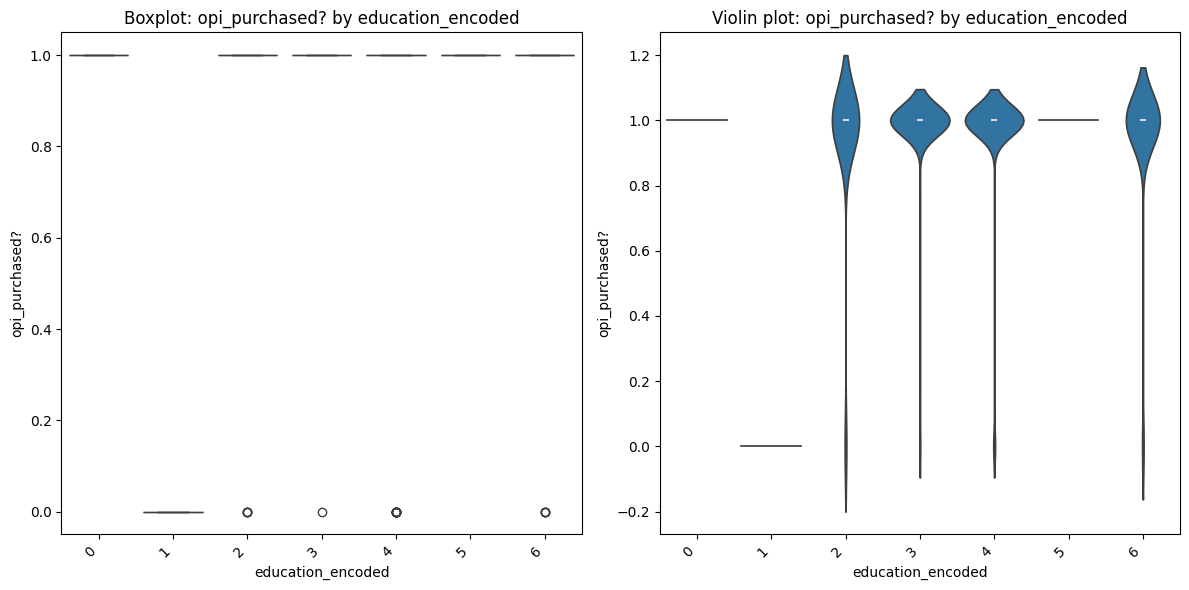


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  1.000000  0.000000    1     1.0    1
1                      1  0.000000       NaN    0     0.0    0
2                     70  0.942857  0.233791    0     1.0    1
3                     77  0.987013  0.113961    0     1.0    1
4                    574  0.970383  0.169675    0     1.0    1
5                      6  1.000000  0.000000    1     1.0    1
6                     95  0.957895  0.201895    0     1.0    1

ANOVA Test Results:
F-statistic: 5.5966
p-value: 0.0000
There is a statistically significant difference in opi_purchased? across education_encoded groups (p < 0.05).


In [30]:
print("\nAnalyzing demographic effects on key outcomes:")
for demo in ['gender_encoded', 'age_encoded', 'education_encoded']:
    if demo in df.columns:
        for outcome in outcome_vars:
            bivariate_categorical_numeric(df, demo, outcome)



### Gender Effects

**Key Finding: No Significant Differences Across Gender Groups**

The analysis reveals that gender does not significantly influence any of the online purchase intention (OPI) variables:

- **Satisfaction**: Similar satisfaction levels across genders (F=0.798, p=0.450)
- **Behavior Change Intention**: No significant differences in intentions to increase online shopping (F=2.256, p=0.105)
- **Perceived Convenience**: Similar convenience perceptions across gender groups (F=1.703, p=0.183)
- **Perceived Value**: No significant differences in value perceptions (F=0.686, p=0.504)
- **Purchase Behavior**: Nearly identical purchase rates across genders (F=0.396, p=0.674)

This suggests that online shopping has become universally appealing across gender identities, breaking traditional shopping stereotypes. E-commerce platforms need not develop gender-targeted approaches to their core functionality and value proposition.

### Age Effects

**Key Finding: Significant Difference in Value Perception**

The analysis shows that age only significantly impacts perceptions of value (F=5.080, p=0.002):

- **Value Perception**: Youngest group (0=18-25) rates value significantly higher (mean=3.96) than middle-age groups
- **Notably**: Oldest group (3=45-55) reports the highest value perception (mean=5.0), though with a very small sample size
- **No significant differences** in satisfaction, behavior change intention, convenience perception, or actual purchase behavior

This suggests that younger consumers may perceive better value in online shopping, possibly due to greater price sensitivity or different reference points for evaluating costs and benefits. However, with other variables showing no significant age differences, e-commerce has successfully bridged potential generational digital divides.

### Education Effects

**Key Finding: Significant Differences Across Education Levels for All Variables**

Education level shows significant effects across all online purchase intention variables:

- **Satisfaction** (F=5.70, p<0.001): Higher education levels (especially level 6) report greater satisfaction
- **Behavior Change Intention** (F=2.48, p=0.022): Education level 5 shows highest intention to increase online shopping
- **Convenience Perception** (F=2.59, p=0.017): Higher education groups perceive greater convenience
- **Value Perception** (F=3.01, p=0.007): Education level 2 shows unexpectedly high value perception
- **Purchase Behavior** (F=5.60, p<0.001): Some variation in purchase rates, though all education groups show high adoption

The consistent pattern suggests that education plays a more substantial role in online shopping perceptions than other demographic factors. Higher education levels generally correlate with more positive perceptions of e-commerce, possibly due to greater digital literacy, higher income levels, or different consumption patterns.

### Strategic Implications

1. **Gender-Neutral Design**: The absence of gender differences supports the use of gender-neutral approaches to e-commerce design and marketing rather than gender-specific strategies.

2. **Value Proposition for Different Age Groups**: While most aspects of online shopping appeal equally across age groups, highlighting value and savings may particularly resonate with younger consumers.

3. **Educational Considerations**: The significant differences across education levels suggest opportunities for:
   - Tailoring user experiences for different educational backgrounds
   - Developing more intuitive interfaces for less digitally literate users
   - Creating educational content that helps less experienced users navigate online shopping

4. **Inclusive Marketing**: While education level influences perceptions, the high adoption rates across all groups suggest that fundamental barriers to entry have been overcome. Marketing should focus on inclusive approaches that emphasize universal benefits rather than targeting specific demographic segments.

5. **Research Implications**: Future research should further investigate why education level has such a significant effect on online shopping perceptions and behavior, as this could reveal deeper insights about the relationship between digital literacy, consumption patterns, and e-commerce adoption.

These findings demonstrate that online shopping has achieved broad demographic appeal, with education level emerging as the most influential demographic factor among those analyzed. This suggests that digital literacy and education-related factors may be more important than traditional demographic categories in shaping online shopping experiences and perceptions.

### **PCA and Cluster analysis**


Performing advanced multivariate analysis:


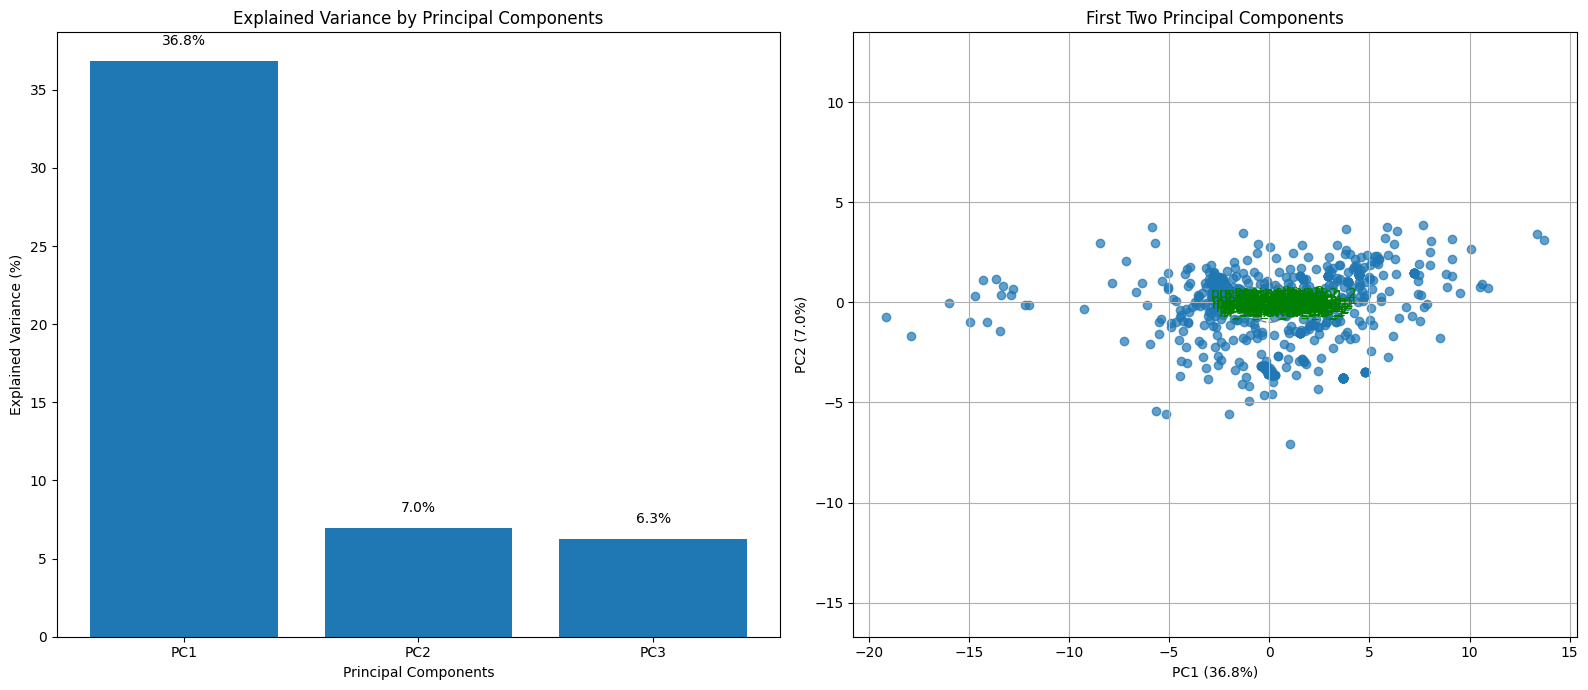

PCA Summary:
Number of components: 3
Total explained variance: 50.04%

Component Loadings:
                           PC1       PC2       PC3
peou_navigation_1     0.171114 -0.199827 -0.149681
peou_navigation_2     0.170628 -0.174692 -0.169503
peou_learning_1       0.162721 -0.084113 -0.270273
peou_learning_2       0.160575 -0.132785 -0.224788
peou_instructions_1   0.169785 -0.010475 -0.274754
peou_instructions_2   0.176426 -0.067283 -0.273117
peou_response_1       0.157627  0.169289 -0.110358
peou_response_2       0.105547  0.206592 -0.163423
peou_error_1          0.145392  0.223739 -0.113772
peou_error_2          0.111718  0.275675 -0.203871
pu_product_1          0.173101  0.047348 -0.072405
pu_product_2          0.161198  0.112430 -0.075367
pu_convenience_1      0.177573 -0.050559 -0.083874
pu_convenience_2      0.191566 -0.158233 -0.044972
pu_cost_1             0.137166  0.111426  0.091207
pu_cost_2             0.144945  0.112149  0.212172
pu_info_1             0.165522  0.099325  

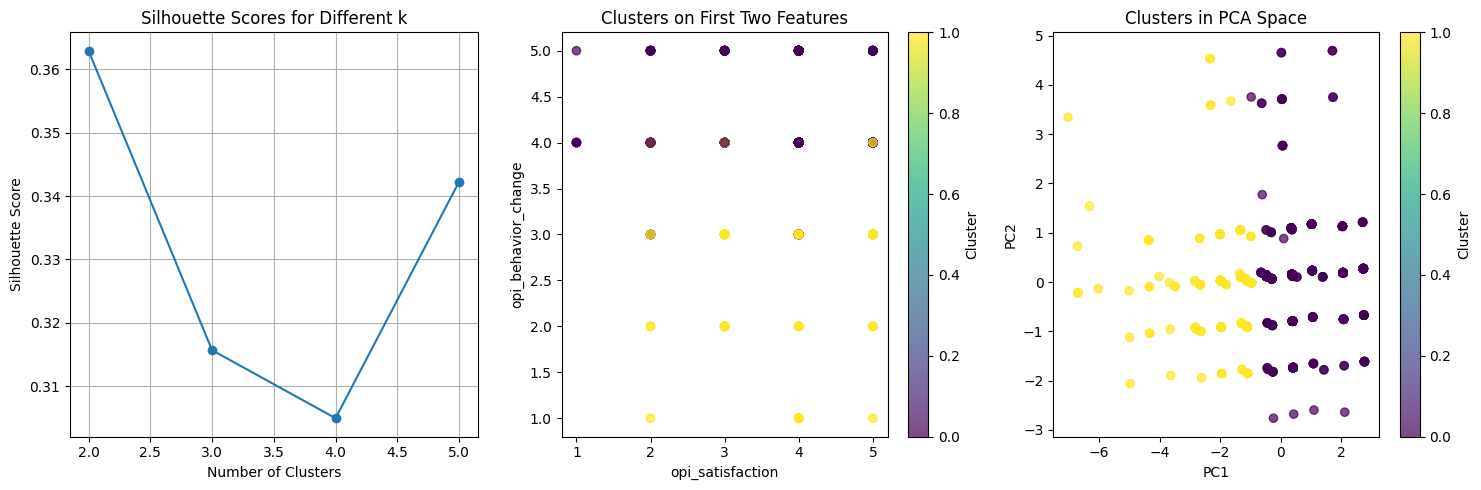


Cluster Profiles:
         opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
Cluster                                                                      
0                3.737342             4.175633         4.115506   4.042722   
1                3.761658             3.015544         2.937824   2.922280   

         opi_purchased?  
Cluster                  
0              0.968354  
1              0.963731  

Cluster Sizes:
Cluster 0: 632 observations (76.6%)
Cluster 1: 193 observations (23.4%)


(KMeans(n_clusters=2, random_state=42),
      opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
 0                   3                    3                2          3   
 1                   4                    4                4          4   
 2                   4                    5                5          4   
 3                   4                    4                4          4   
 4                   4                    4                4          3   
 ..                ...                  ...              ...        ...   
 820                 4                    4                4          4   
 821                 4                    4                4          4   
 822                 4                    3                4          3   
 823                 4                    3                3          3   
 824                 4                    3                3          3   
 
      opi_purchased?  Cluster  
 0                 1      

In [31]:
print("\nPerforming advanced multivariate analysis:")
    
# PCA on main constructs (excluding platform/store variables)
main_vars = constructs['peou'] + constructs['pu'] + constructs['sa'] + constructs['si'] + constructs['att'] + constructs['risk']
pca_analysis(df, main_vars, n_components=3)
    
# Cluster analysis on outcome variables
cluster_analysis(df, outcome_vars)
    

This analysis reveals a mature online shopping ecosystem where basic adoption has been achieved but significant opportunities remain to enhance user experience, deepen engagement, and increase purchase frequency across different consumer segments.